# Finemap GWAS that colocalize with one single eGene

In [1]:
library(coloc)

In [2]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_gwas_coloc")

source("script/functions.R"  )


In [3]:
dir.create("pipeline/eqtl.4.finemap_single"      , showWarnings = FALSE)
dir.create("pipeline/eqtl.4.finemap_single/fm"   , showWarnings = FALSE)
dir.create("pipeline/eqtl.4.finemap_single/fm595", showWarnings = FALSE)


In [4]:
exp_data = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/input/expdata_qtl.rds")
qtl_data = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/input/qtl/qtls.RDS"   )


In [5]:
loci     = add_rownames(fread  ("pipeline/1.2.genomewide_significant_loci/loci.txt"       , sep = "\t", header = TRUE, data.table = FALSE))


In [6]:
coordinates = exp_data[["coordinates"]]
gene_info   = coordinates[ coordinates$phenotype == "rna",]


In [7]:
coloc    =              fread("pipeline/eqtl.2.gwas_coloc/coloc.txt", sep = "\t", header = TRUE, data.table = FALSE)
manifest = add_rownames(fread("pipeline/1.1.sumstats/manifest.txt"  , sep = "\t", header = TRUE, data.table = FALSE))
pph4     = coloc[ coloc$PP.H4.abf >= 0.8,]


In [8]:
message(paste(paste("Traits", length(unique(coloc$gwas)), sep = " = "),
              paste(sort(manifest$name), collapse = "; "),
              "",
              paste("Genome-wide significant loci that overlap eGenes or eIsoforms", length(unique(coloc$locus)), sep = " = "),
              paste("eGenes that overlap GWAS loci"   , length(unique(coloc[ coloc$phenotype == "rna"    , "transcript_id"])), sep = " = "),
              paste("eIsoforms that overlap GWAS loci", length(unique(coloc[ coloc$phenotype == "isoform", "transcript_id"])), sep = " = "),
              sep = "\n"))


Traits = 27
Albumin; amlodipine; atenolol; atorvastatin; Birth weight; Body mass index (BMI); Calcium; Cholesterol; Coronary atherosclerosis; Diastolic blood pressure; HDL cholesterol; Hypertension; I20 Angina pectoris; I25 Chronic ischaemic heart disease; I26 Pulmonary embolism; I48 Atrial fibrillation and flutter; LDL adjusted by medication; LDL direct; Mean arterial pressure; Myocardial infarction; Pulse pressure; Pulse rate; QRS duration; simvastatin; Systolic blood pressure; Triglycerides; Ventricular rate

Genome-wide significant loci that overlap eGenes or eIsoforms = 1530
eGenes that overlap GWAS loci = 7223
eIsoforms that overlap GWAS loci = 4604



In [9]:
message(paste(paste("Genome-wide significant loci that colocalize with eGenes or eIsoforms", length(unique(pph4[                            , "locus"        ])), sep = " = "),
              paste("eGenes that colocalize with GWAS loci"                                , length(unique(pph4[ pph4$phenotype == "rna"    , "transcript_id"])), sep = " = "),
              paste("eIsoforms that colocalize with GWAS loci"                             , length(unique(pph4[ pph4$phenotype == "isoform", "transcript_id"])), sep = " = "),
              paste("Genes with at least one eQTL that colocalize with GWAS loci"          , length(unique(pph4[                            , "gene_id"      ])), sep = " = "),
              sep = "\n"))


Genome-wide significant loci that colocalize with eGenes or eIsoforms = 595
eGenes that colocalize with GWAS loci = 1079
eIsoforms that colocalize with GWAS loci = 732
Genes with at least one eQTL that colocalize with GWAS loci = 1380



In [10]:
gwas2locus1 = unique(pph4[, c("gwas", "locus")])
gwas2locus1 = table(gwas2locus1$gwas)
gwas2locus1 = data.frame(trait = names(gwas2locus1), n_loci = as.numeric(gwas2locus1))

gwas2locus2 = unique(pph4[, c("gwas", "gene_id")])
gwas2locus2 = table(gwas2locus2$gwas)
gwas2locus2 = data.frame(trait = names(gwas2locus2), n_genes = as.numeric(gwas2locus2))

gwas2locus  = merge(gwas2locus1, gwas2locus2)

message(paste(paste0("Loci associated with each trait = " , round(mean(gwas2locus$n_loci ), digits = 1), " +/-", round(sd(gwas2locus$n_loci ), digits = 1)), 
              paste0("Genes associated with each trait = ", round(mean(gwas2locus$n_genes), digits = 1), " +/-", round(sd(gwas2locus$n_genes), digits = 1)), 
              sep = "\n"))


Loci associated with each trait = 57.7 +/-53.8
Genes associated with each trait = 88.5 +/-80.6



In [11]:
gwas2qtl1 = unique(pph4[, c("gene_id", "gene_name", "locus")])
gwas2qtl1 = sort(table(gwas2qtl1$locus), decreasing = TRUE)
gwas2qtl1 = data.frame(locus = names(gwas2qtl1), n_genes = as.numeric(gwas2qtl1))

gwas2qtl2 = unique(pph4[, c("gwas", "locus")])
gwas2qtl2 = sort(table(gwas2qtl2$locus), decreasing = TRUE)
gwas2qtl2 = data.frame(locus = names(gwas2qtl2), n_traits = as.numeric(gwas2qtl2))

gwas2qtl3 = unique(coloc[, c("gene_id", "gene_name", "locus")])
gwas2qtl3 = sort(table(gwas2qtl3$locus), decreasing = TRUE)
gwas2qtl3 = data.frame(locus = names(gwas2qtl3), n_genes_total = as.numeric(gwas2qtl3))

gwas2qtl4 = unique(pph4[, c("transcript_id", "gene_id", "gene_name", "locus")])
gwas2qtl4 = sort(table(gwas2qtl4$locus), decreasing = TRUE)
gwas2qtl4 = data.frame(locus = names(gwas2qtl4), n_transcripts = as.numeric(gwas2qtl4))

gwas2qtl       = merge(gwas2qtl1, gwas2qtl2)
gwas2qtl       = merge(gwas2qtl , gwas2qtl3)
gwas2qtl       = merge(gwas2qtl , gwas2qtl4)

gwas2qtl$chrom = as.numeric(unlist(lapply(gwas2qtl$locus, function(x){unlist(strsplit(x, "_"))[[1]]})))
gwas2qtl$from  = as.numeric(unlist(lapply(gwas2qtl$locus, function(x){unlist(strsplit(x, "_"))[[2]]})))
gwas2qtl$to    = as.numeric(unlist(lapply(gwas2qtl$locus, function(x){unlist(strsplit(x, "_"))[[3]]})))
gwas2qtl$size  = gwas2qtl$to - gwas2qtl$from

message(paste(paste ("Loci that colocalize with eQTLs"         , nrow(gwas2qtl), sep = " = "), 
              paste ("Loci that colocalize with multiple genes", nrow(gwas2qtl[ gwas2qtl$n_genes >  1,]), sep = " = "), 
              paste ("Loci that colocalize with one gene"      , nrow(gwas2qtl[ gwas2qtl$n_genes == 1,]), sep = " = "), 
              paste0("(", round(nrow(gwas2qtl[ gwas2qtl$n_genes == 1,])/ nrow(gwas2qtl) * 100, digits = 1), "%)"),
              "",
              paste ("Loci that colocalize with multiple transcripts", nrow(gwas2qtl[ gwas2qtl$n_transcripts >  1,]), sep = " = "), 
              paste ("Loci that colocalize with one transcript"      , nrow(gwas2qtl[ gwas2qtl$n_transcripts == 1,]), sep = " = "), 
              paste0("(", round(nrow(gwas2qtl[ gwas2qtl$n_transcripts == 1,])/ nrow(gwas2qtl) * 100, digits = 1), "%)"),
              "",
              paste ("Loci that colocalize with one gene (one trait)"      , nrow(gwas2qtl[ gwas2qtl$n_genes == 1 & gwas2qtl$n_traits == 1,]), sep = " = "), 
              paste ("Loci that colocalize with one gene (multiple traits)", nrow(gwas2qtl[ gwas2qtl$n_genes == 1 & gwas2qtl$n_traits >  1,]), sep = " = "), 
              "",
              paste ("Loci that colocalize with multiple traits", nrow(gwas2qtl[ gwas2qtl$n_traits >  1,]), sep = " = "), 
              paste ("Loci that colocalize with one trait"      , nrow(gwas2qtl[ gwas2qtl$n_traits == 1,]), sep = " = "), 
              paste0("(", round(nrow(gwas2qtl[ gwas2qtl$n_traits == 1,])/ nrow(gwas2qtl) * 100, digits = 1), "%)"),
              sep = "\n"))



Loci that colocalize with eQTLs = 595
Loci that colocalize with multiple genes = 246
Loci that colocalize with one gene = 349
(58.7%)

Loci that colocalize with multiple transcripts = 307
Loci that colocalize with one transcript = 288
(48.4%)

Loci that colocalize with one gene (one trait) = 233
Loci that colocalize with one gene (multiple traits) = 116

Loci that colocalize with multiple traits = 313
Loci that colocalize with one trait = 282
(47.4%)



In [12]:
tofm_loci = gwas2qtl[ gwas2qtl$n_genes >= 1, "locus"]
tofm      = pph4[ pph4$locus %in% tofm_loci,]


In [13]:
length(unique(tofm$trid))
length(unique(tofm$locus))
nrow(unique(tofm[,c("locus", "gwas")]))
nrow(unique(tofm[,c("trid", "locus", "gwas")]))


[1] 1960

[1] 595

[1] 1559

[1] 3164

In [14]:
str(tofm)

'data.frame':	3164 obs. of  33 variables:
 $ transcript_id                               : chr  "ENSG00000000971.16_4" "ENSG00000000971.16_4" "ENSG00000002919.14_3" "ENSG00000002919.14_3" ...
 $ gene_id                                     : chr  "ENSG00000000971.16_4" "ENSG00000000971.16_4" "ENSG00000002919.14_3" "ENSG00000002919.14_3" ...
 $ gene_name                                   : chr  "CFH" "CFH" "SNX11" "SNX11" ...
 $ phenotype                                   : chr  "rna" "rna" "rna" "rna" ...
 $ nsnps                                       : int  994 994 1697 1697 2310 2310 2310 2310 592 592 ...
 $ PP.H0.abf                                   : num  3.14e-24 1.11e-07 7.87e-18 5.05e-18 1.03e-62 ...
 $ PP.H1.abf                                   : num  3.10e-06 3.75e-06 6.18e-08 4.98e-08 1.93e-02 ...
 $ PP.H2.abf                                   : num  8.26e-20 2.93e-03 1.16e-11 7.44e-12 1.85e-62 ...
 $ PP.H3.abf                                   : num  0.0807 0.0976 0.09 0.07

In [15]:
tofm[ tofm$gene_id == "ENSG00000106392.11_5",]

transcript_id        gene_id              gene_name phenotype nsnps
12942  ENSG00000106392.11_5 ENSG00000106392.11_5 C1GALT1   rna       1176 
12945  ENSG00000106392.11_5 ENSG00000106392.11_5 C1GALT1   rna       1176 
12947  ENSG00000106392.11_5 ENSG00000106392.11_5 C1GALT1   rna       1176 
12948  ENSG00000106392.11_5 ENSG00000106392.11_5 C1GALT1   rna       1176 
83741  ENST00000223122.4_2  ENSG00000106392.11_5 C1GALT1   isoform   1176 
100219 ENST00000436587.7_2  ENSG00000106392.11_5 C1GALT1   isoform   1176 
100225 ENST00000436587.7_2  ENSG00000106392.11_5 C1GALT1   isoform   1176 
       PP.H0.abf    PP.H1.abf    PP.H2.abf    PP.H3.abf   PP.H4.abf ⋯
12942  6.955252e-27 9.938772e-17 4.335229e-12 0.061009661 0.9389903 ⋯
12945  1.100198e-21 1.620294e-16 6.857566e-07 0.100093468 0.8999058 ⋯
12947  5.494821e-26 1.102027e-16 3.424938e-11 0.067757449 0.9322426 ⋯
12948  3.369489e-22 1.051569e-17 2.100212e-07 0.005560019 0.9944398 ⋯
83741  5.838026e-05 1.144745e-03 3.891784e-03 0.075392201 0.9195129 ⋯
100219 3.821104e-12 5.460202e-02 8.899781e-12 0.126355188 0.8190428 ⋯
100225 3.413571e-07 1.065326e-02 7.950590e-07 0.023847146 0.9654985 ⋯
       interaction.cibersort.regular.endocardial
12942  0                                        
12945  0                                        
12947  0                                        
12948  0                                        
83741  0                                        
100219 0                                        
100225 0                                        
       interaction.cibersort.regular.endothelial
12942  0                                        
12945  0                                        
12947  0                                        
12948  0                                        
83741  0                                        
100219 0                                        
100225 0                                        
       interaction.cibersort.regular.fibroblast
12942  0                                       
12945  0                                       
12947  0                                       
12948  0                                       
83741  0                                       
100219 0                                       
100225 0                                       
       interaction.cibersort.regular.immune
12942  0                                   
12945  0                                   
12947  0                                   
12948  0                                   
83741  0                                   
100219 0                                   
100225 0                                   
       interaction.cibersort.regular.myofibroblast
12942  0                                          
12945  0                                          
12947  0                                          
12948  0                                          
83741  0                                          
100219 0                                          
100225 0                                          
       interaction.cibersort.regular.smooth_muscle interaction.heart
12942  0                                           0                
12945  0                                           0                
12947  0                                           0                
12948  0                                           0                
83741  0                                           0                
100219 0                                           0                
100225 0                                           0                
       interaction.heart_atrium interaction.heart_ventricle
12942  0                        0                          
12945  0                        0                          
12947  0                        0                          
12948  0                        0                          
83741  0                        0                          
100219 

# Fine map

In [16]:
get_gwas_data = function(coord, gwas_file)
{
    my_head              = colnames(fread(cmd = paste("zcat", gwas_file, "|", "head -n 2"), sep = "\t", header = TRUE, data.table = FALSE))
    gwas_data            = suppressWarnings(tabix.read.table(gwas_file, coord, col.names = TRUE, stringsAsFactors = FALSE))
    colnames(gwas_data)  = my_head
    gwas_data$variant_id = paste(gwas_data$chr, gwas_data$pos, gwas_data$ref, gwas_data$alt, sep = "_")
    rownames(gwas_data)  = gwas_data$variant_id
    
    return(gwas_data)
}

quiet = function(x) 
{ 
    sink(tempfile()) 
    on.exit(sink()) 
    invisible(force(x)) 
} 

create_dataset = function(study, trait_type, totest, variants, pop, populations, manifest)
{
    if(trait_type %in% c("categorical", "icd10", "phecode"))
    {
        if(pop == "meta"){n = sum(manifest[study, paste("n_cases", populations, sep = "_")]) + sum(manifest[study, paste("n_controls", populations, sep = "_")])}
        if(pop != "meta"){n =     manifest[study, paste("n_cases", pop        , sep = "_")]  +     manifest[study, paste("n_controls", pop        , sep = "_")] }
        
        if(pop == "meta"){s = sum(manifest[study, paste("n_cases", populations, sep = "_")]) / n}
        if(pop != "meta"){s =     manifest[study, paste("n_cases", pop        , sep = "_")]  / n}
        
        totest  = totest[is.na(totest[,paste("pval", pop, sep = "_")]) == FALSE & is.na(totest[,paste("af_controls", pop, sep = "_")]) == FALSE, ]
        dataset = list(snp = variants, pvalues = totest[variants, paste("pval", pop, sep = "_")], N = n, s = s, MAF = totest[variants, paste("af_controls", pop, sep = "_")], type = "cc")
    }
    if(trait_type %in% c("biomarkers", "continuous"))
    {
        if(pop == "meta"){n = sum(manifest[study, paste("n_cases", populations, sep = "_")])}
        if(pop != "meta"){n =     manifest[study, paste("n_cases", pop        , sep = "_")] }
        
        totest  = totest[is.na(totest[,paste("pval", pop, sep = "_")]) == FALSE & is.na(totest[,paste("af", pop, sep = "_")]) == FALSE, ]
        dataset = list(snp = variants, pvalues = totest[variants, paste("pval", pop, sep = "_")], N = n, MAF = totest[variants, paste("af", pop, sep = "_")], type = "quant")
    }
    if(trait_type == "qtl")
    {
        rownames(totest) = totest$id
        phenotype2n      = data.frame(phenotype = c("atac", "chip", "rna", "isoform"), n = c(259,131,966,966))
        dataset = list(snp     = variants, 
                       pvalues = totest     [variants, "pval"], 
                       N       = phenotype2n[phenotype2n$phenotype == pop, "n"], 
                       MAF     = totest     [variants, "af"], 
                       type    = "quant")
    }
    return(dataset)
}


finemap_coloc = function(ii, tofm)
{
    message(ii, appendLF = FALSE)
    #if(ii %in% trunc((0:100 / 100) * nrow(tofm))){print("." )}
    #if(ii %in% trunc((1: 10 /  10) * nrow(tofm))){print("\n")}
    
    transcript_id    = tofm[ii, "transcript_id"]
    phenotype        = tofm[ii, "phenotype"    ]
    type             = tofm[ii, "type"         ]
    locus            = tofm[ii, "locus"        ]
    trait            = tofm[ii, "gwas"         ]
    coord            = sub("_", "-", sub("_", ":", locus))
    gwas             = get_gwas_data(coord, manifest[trait, "sumstat_file"])
    
    if(phenotype == "rna"    ){toread = "gene"   }
    if(phenotype == "isoform"){toread = "isoform"}
    
    qtl              = fread(paste0("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtls_by_gene/cardiac_eqtls.", toread, "/qtl.", transcript_id, ".txt"), sep = "\t", header = TRUE, data.table = FALSE)
    qtl              = qtl[ qtl$type == type,]
    gwas$variant_id  = paste("VAR", gwas$variant_id, sep = "_")
    rownames(gwas)   = gwas$variant_id
    rownames(qtl )   = qtl $id
    variants         = intersect(gwas$variant_id, qtl$id)
    
    trait_type1      = manifest[trait, "trait_type"]
    trait_type2      = "qtl"
    
    totest1          = gwas
    totest2          = qtl
    pop              = "meta"
    populations      = unlist(strsplit(manifest[trait, "pops"], ","))
    
    if( trait_type1 %in% c("categorical", "icd10", "phecode")){variants1 = totest1[is.na(totest1[,paste("pval", pop, sep = "_")]) == FALSE & is.na(totest1[,paste("af_controls", pop, sep = "_")]) == FALSE, "id"]}
    if( trait_type1 %in% c("biomarkers", "continuous"       )){variants1 = totest1[is.na(totest1[,paste("pval", pop, sep = "_")]) == FALSE & is.na(totest1[,paste("af"         , pop, sep = "_")]) == FALSE, "id"]}

    dataset1        = create_dataset(trait        , trait_type1, totest1, variants, "meta"   , populations, manifest)
    dataset2        = create_dataset(transcript_id, trait_type2, totest2, variants, phenotype, c()        , manifest)
    coloc_mapped    = quiet(coloc.abf(dataset1 = dataset1, dataset2 = dataset2))
    out             = data.frame(id = coloc_mapped$results$snp,
                                 pp = coloc_mapped$results$SNP.PP.H4
                                )
    
    gwas_out           = gwas[,c("pos", "variant_id", "beta_meta", "se_meta", "pval_meta")]
    colnames(gwas_out) = c("pos", "id", "beta", "se", "pval")
    qtl$type           = NULL
    qtl$gene_id        = NULL
    out$pos            = as.numeric(unlist(lapply(out$id, function(x){unlist(strsplit(x, "_"))[[3]]})))
    out                = out[order(out$pp, decreasing = TRUE),]
    out                = out[order(out$pp, decreasing = TRUE), ]
    out$cum            = cumsum(out$pp)
    out$cs             = FALSE
    to_cs              = out[out$cum >= 0.99, ][1, "id"]
    
    out[out$cum < 0.99 | out$id == to_cs, "cs"] = TRUE

    credible_set = out[ out$cs == TRUE, "id"]
    
    
    out_list = list(transcript_id    = transcript_id,
                    phenotype        = phenotype    ,
                    type             = type         ,
                    locus            = locus        ,
                    trait            = trait        ,
                    coord            = coord        ,
                    gwas             = gwas_out     ,
                    qtl              = qtl          ,
                    finemap          = out          ,
                    credible_set     = credible_set ,
                    credible_set_n   = length(credible_set)
                   )
    return(out_list)
}

#finemap_coloc(6, tofm)

#pph4_short = pph4[1:3,]
#fm_list        = lapply(1:nrow(pph4_short), function(ii){finemap_coloc(ii, tofm)})
#names(fm_list) = paste(pph4_short$transcript_id, pph4_short$type, pph4_short$trait, pph4_short$locus, sep = ":")

fm_list        = lapply(1:nrow(tofm), function(ii){finemap_coloc(ii, tofm)})
names(fm_list) = paste(tofm$transcript_id, tofm$type, tofm$gwas, tofm$locus, sep = ":")
saveRDS(fm_list, "pipeline/eqtl.4.finemap_single/fm_list.rds")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Data to credible sets

In [17]:
fm_report = readRDS("pipeline/eqtl.4.finemap_single/fm_report_top.rds")

In [18]:
as.data.frame.matrix(table(fmdata[,c("csbin", "ppbin")]))

1-10 10-50 50-80 80-90 90-95 95-99 99-100
1        0    0     0    0     0      0   341   
101+    37   17     2    0     0      0     0   
11-20    9  482    93   18     7      6     0   
2-5      0  129   245   64    62    101     0   
21-50  138  565    60   13     4      1     0   
51-100 123  178    12    2     0      0     0   
6-10     0  271   121   29    17     17     0

In [19]:
cs2bin
pp2bin


name   bin from to    n   per       
1 1      1     0      1 341 0.10777497
4 2-5    2     1      5 601 0.18994943
7 6-10   3     5     10 455 0.14380531
3 11-20  4    10     20 615 0.19437421
5 21-50  5    20     50 781 0.24683944
6 51-100 6    50    100 315 0.09955752
2 101+   7   100  10000  56 0.01769912

name   bin from to  n    per       
7 99-100 1   99   100  341 0.10777497
6 95-99  2   95    99  125 0.03950695
5 90-95  3   90    95   90 0.02844501
4 80-90  4   80    90  126 0.03982301
3 50-80  5   50    80  533 0.16845765
2 10-50  6   10    50 1642 0.51896334
1 1-10   7    1    10  307 0.09702908

# For each GWAS signal, get only the association with the best FM (top PPA, fewest SNPs)

In [20]:
fmdata2n           = aggregate(cs ~ gwas + locus, data = fmdata, FUN = length)
colnames(fmdata2n) = c("gwas", "locus", "n")
fmdata2n           = fmdata2n[ order(fmdata2n$n,decreasing = TRUE),]

In [22]:
fmdata2test = fmdata[ order(fmdata$cs, -fmdata$pp_snp, fmdata$type),]

fmdata2test = cbind(fmdata2test, as.data.frame(rbindlist(lapply(1:nrow(fmdata2test), function(ii)
{
    gene_id = fmdata2test[ii, "gene_id"]
    snp_id  = fmdata2test[ii, "id"     ]
    indata  = fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype/tpm_gene/gt_info", gene_id, "txt", sep = "."), sep = "\t", header = TRUE, data.table = FALSE)
    out     = indata[indata$id == snp_id,c("chrom", "pos", "ref", "alt", "rsid", "af")]
    
    return(out)
})), stringsAsFactors = FALSE))



In [23]:
catalog_start           = fread("/frazer01/reference/public/gwas_catalog/alternative.1", sep = "\t", header = TRUE, data.table = FALSE, quote = "")
catalog_start           = catalog_start[, c("SNPS", "PUBMEDID", "STUDY", "MAPPED_TRAIT", "P-VALUE", "PVALUE_MLOG", "OR or BETA", "95% CI (TEXT)")]
colnames(catalog_start) = c("rsid", "pmid", "study", "trait", "pval", "logp", "beta", "confint")
catalog_start$pval      = as.numeric(catalog_start$pval)
catalog                 = catalog_start[ catalog_start$rsid %in% fmdata2test$rsid, ]


In [24]:
length(unique(catalog_start$rsid))

[1] 152082

In [25]:
fmdata2top = as.data.frame(rbindlist(lapply(1:nrow(fmdata2n), FUN = function(ii)
{
    n           = fmdata2n[ii, "n"    ]
    gwas        = fmdata2n[ii, "gwas" ]
    locus       = fmdata2n[ii, "locus"]
    out         = fmdata2test[ fmdata2test$locus == locus & fmdata2test$gwas == gwas,][1,]
    out$n_eqtls = n
    
    return(out)
})), stringsAsFactors = FALSE)

cs2bin_table     = table(fmdata2top$csbin)
pp2bin_table     = table(fmdata2top$ppbin)
cs2bin_table     = data.frame(name = names(cs2bin_table), n = as.numeric(cs2bin_table))
pp2bin_table     = data.frame(name = names(pp2bin_table), n = as.numeric(pp2bin_table))

cs2bin_top = cs2bin[,c("name", "bin", "from", "to")]
pp2bin_top = pp2bin[,c("name", "bin", "from", "to")]

cs2bin_top     = merge(cs2bin_top, cs2bin_table)
pp2bin_top     = merge(pp2bin_top, pp2bin_table)
cs2bin_top     = cs2bin_top[order(cs2bin_top$bin),]
pp2bin_top     = pp2bin_top[order(pp2bin_top$bin),]
cs2bin_top$per = cs2bin_top$n / sum(cs2bin_top$n)
pp2bin_top$per = pp2bin_top$n / sum(pp2bin_top$n)
fm2gwas        = merge(fmdata2top, aggregate(pmid  ~ rsid, data = catalog, FUN = function(x){paste(sort(unique(x)), collapse = "; ")}), all.x = TRUE)
fm2gwas        = merge(fm2gwas   , aggregate(trait ~ rsid, data = catalog, FUN = function(x){paste(sort(unique(x)), collapse = "; ")}), all.x = TRUE)
fm2gwas        = merge(data.frame(gwas = manifest$id, trait_name_ukbb = manifest$name), fm2gwas)
fm2gwas        = fm2gwas[ order(fm2gwas$cs, -fm2gwas$pp_snp, fm2gwas$type),]
fm_report_top  = list(data = fmdata2test, data_by_signal = fmdata2top, gwas_catalog = catalog, data_gwas = fm2gwas, cs2bin = cs2bin_top, pp2bin = pp2bin_top)

saveRDS(fm_report_top, "pipeline/eqtl.4.finemap_single/fm_report_top.rds")



In [26]:
trait2trait           = unique(fm2gwas[ is.na(fm2gwas$trait) == FALSE, c("trait_name_ukbb", "trait")])
colnames(trait2trait) = c("ukbb", "catalog")
trait2trait           = unique(as.data.frame(rbindlist(lapply(1:nrow(trait2trait), function(ii)
{
    x1  = trait2trait[ii, "ukbb"]
    x2  = unlist(strsplit(trait2trait[ii, "catalog"], "; "))
    out = data.frame(ukbb = x1, catalog = x2, tmp1 = tolower(x1), same = FALSE)
    
    return(out)
})), stringsAsFactors = FALSE))

trait2trait[ tolower(trait2trait$tmp1) == trait2trait$catalog, "same"] = TRUE


trait2trait[ trait2trait$ukbb %in% c("Ablumin"                            ) & grepl(" albumin "              , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("amlodipine"                         ) & grepl("alcium channel blocker" , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("atenolol"                           ) & grepl("eta block"              , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Coronary atherosclerosis"           ) & grepl("coronary artery disease", trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Coronary atherosclerosis"           ) & grepl("artery stroke"          , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("HDL cholesterol"                    ) & grepl("HDL"                    , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("HDL cholesterol"                    ) & grepl("high density lipo"      , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Pulse pressure"                     ) & grepl("pulse pressure"         , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Pulse pressure"                     ) & grepl("blood pressure"         , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Pulse rate"                         ) & grepl("heart rate"             , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("QRS duration"                       ) & grepl("QRS"                    , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Triglycerides"                      ) & grepl("riglyceride"            , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Ventricular rate"                   ) & grepl("heart rate"             , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Body mass index (BMI)"              ) & trait2trait$catalog == "body mass index"              , "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Cholesterol"                        ) & trait2trait$catalog == "total cholesterol measurement", "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("I25 Chronic ischaemic heart disease") & trait2trait$catalog == "myocardial infarction"        , "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("I25 Chronic ischaemic heart disease") & trait2trait$catalog == "cardiovascular disease"       , "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("I25 Chronic ischaemic heart disease") & trait2trait$catalog == "coronary artery disease"      , "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("I48 Atrial fibrillation and flutter") & trait2trait$catalog == "atrial fibrillation"          , "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Myocardial infarction"              ) & trait2trait$catalog == "cardiovascular disease"       , "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("Myocardial infarction"              ) & trait2trait$catalog == "coronary artery disease"      , "same"] = TRUE
trait2trait[ trait2trait$ukbb %in% c("QRS duration"                       ) & trait2trait$catalog == "electrocardiography"          , "same"] = TRUE
trait2trait[ grepl("LDL"     , trait2trait$ukbb) == TRUE                    & grepl("LDL"                    , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ grepl("LDL"     , trait2trait$ukbb) == TRUE                    & grepl("low density lipo"       , trait2trait$catalog) == TRUE, "same"] = TRUE
trait2trait[ grepl("pressure", trait2trait$ukbb) == TRUE                    & grepl("pressure"               , trait2trait$catalog) == TRUE, "same"] = TRUE

trait2trait = trait2trait[order(trait2trait$ukbb, trait2trait$catalog),]

fwrite(trait2trait, "pipeline/eqtl.4.finemap_single/trait2trait.txt", sep = "\t", col.names = TRUE, row.names = FALSE)


In [27]:
fm2gwas$same = unlist(lapply(1:nrow(fm2gwas), function(ii)
{
    x = fm2gwas[ii, "trait"]
    
    if(is.na(x) == TRUE)
    {
        out = FALSE
    }else
    {
        x = trait2trait[ tolower(trait2trait$catalog) %in% tolower(unlist(strsplit(x, "; "))), ]
        
        if(nrow(x[x$same == TRUE, ]) > 0)
        {
            out = TRUE
        }else
        {
            out = FALSE
        }
    }
    
    return(out)
}))

fwrite(fm2gwas,  "pipeline/eqtl.4.finemap_single/fm_gwas_catalog.txt", sep = "\t", col.names = TRUE, row.names = FALSE)

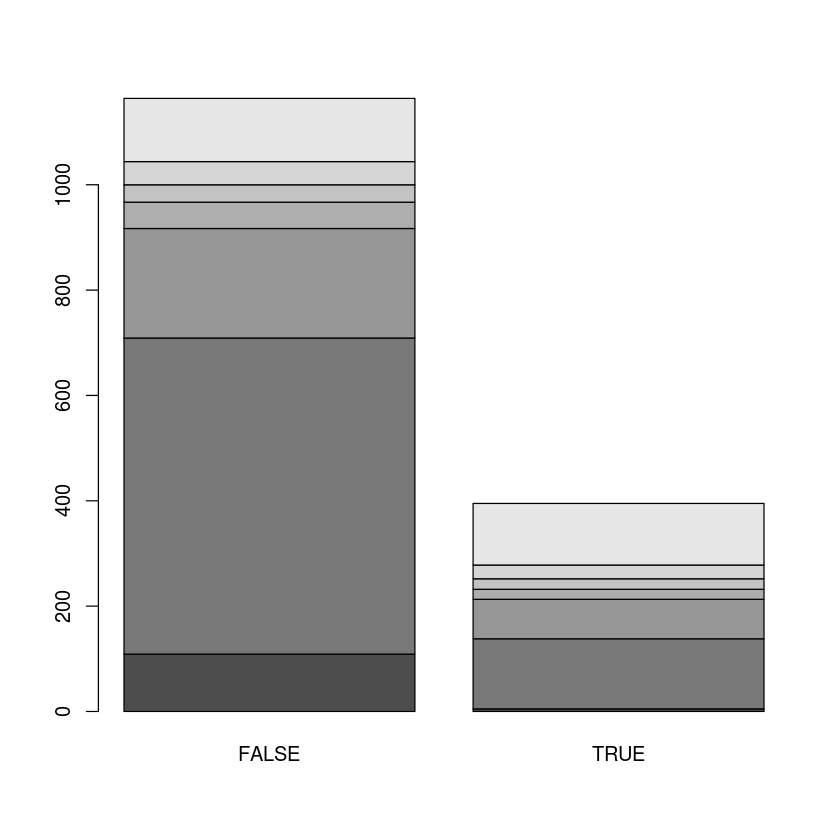

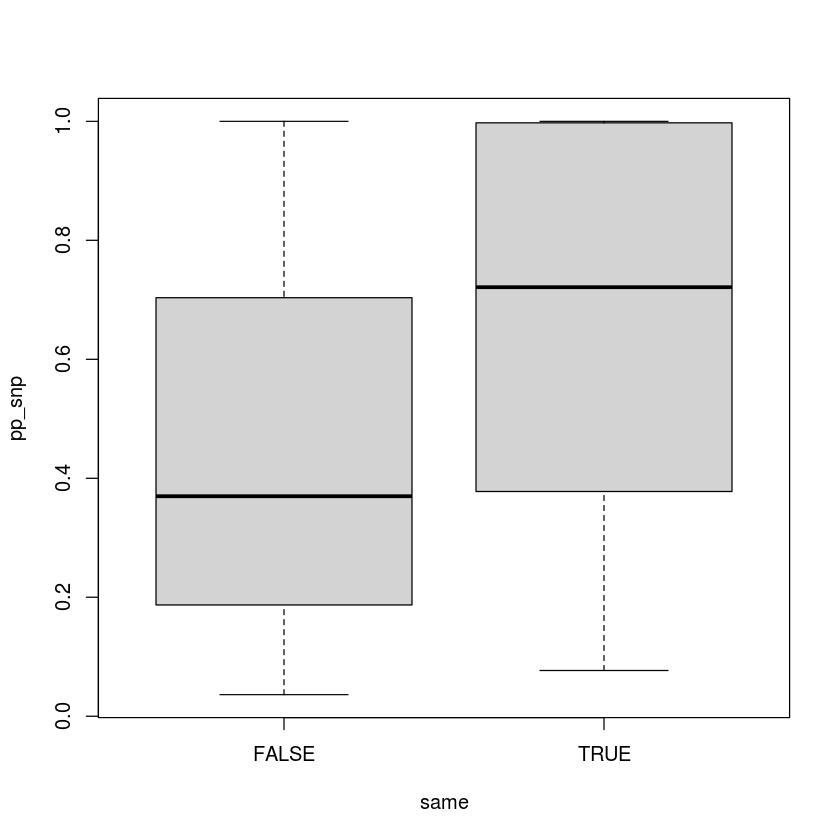

[1] 6.246874e-30

[1] 1.083445e-28

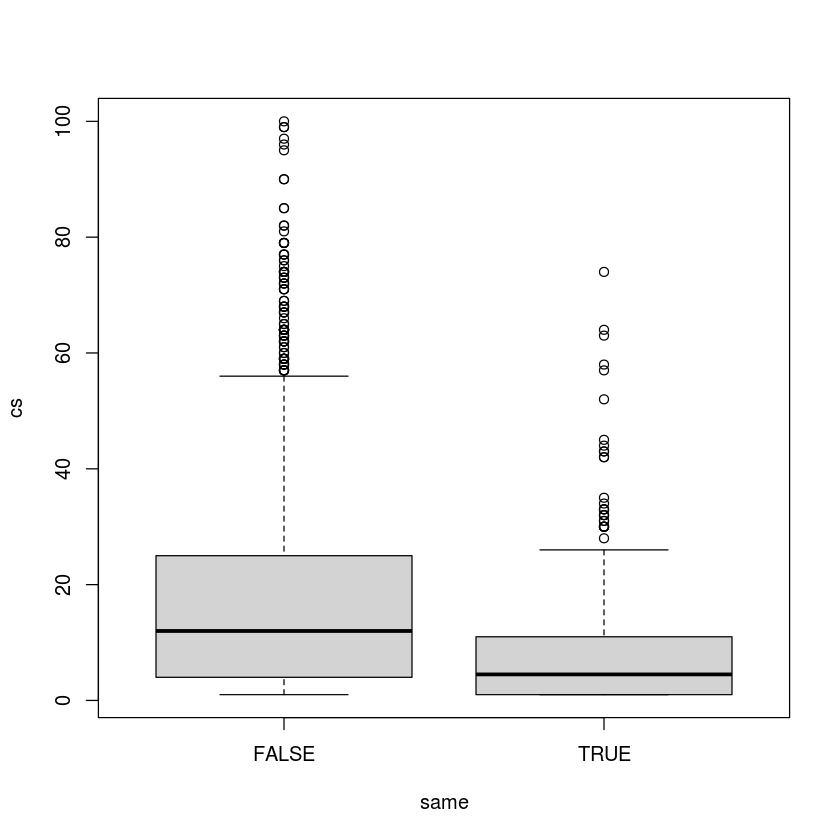

In [28]:
barplot(table(fm2gwas[,c("ppbin", "same")]))


boxplot(pp_snp ~ same, data = fm2gwas[ fm2gwas$cs <= 100,])
boxplot(cs     ~ same, data = fm2gwas[ fm2gwas$cs <= 100,])
wilcox.test(pp_snp ~ same, data = fm2gwas[ fm2gwas$cs <= 100,])$p.value
wilcox.test(cs     ~ same, data = fm2gwas[ fm2gwas$cs <= 100,])$p.value


In [29]:
summary(lm(same ~ pp_snp, data = fm2gwas[ fm2gwas$cs <= 100,]))
summary(lm(same ~ cs    , data = fm2gwas))



Call:
lm(formula = same ~ pp_snp, data = fm2gwas[fm2gwas$cs <= 100, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4397 -0.2783 -0.1512  0.5603  0.9111 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05967    0.01999   2.985  0.00288 ** 
pp_snp       0.38003    0.03276  11.602  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4187 on 1538 degrees of freedom
Multiple R-squared:  0.08047,	Adjusted R-squared:  0.07988 
F-statistic: 134.6 on 1 and 1538 DF,  p-value: < 2.2e-16



Call:
lm(formula = same ~ cs, data = fm2gwas)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3240 -0.3025 -0.2424  0.6760  1.1225 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3283114  0.0135296  24.266   <2e-16 ***
cs          -0.0042933  0.0004713  -9.108   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4241 on 1557 degrees of freedom
Multiple R-squared:  0.05059,	Adjusted R-squared:  0.04998 
F-statistic: 82.96 on 1 and 1557 DF,  p-value: < 2.2e-16


In [30]:
length(unique(trait2trait$ukbb))
length(unique(trait2trait$catalog))
table(fm2gwas$same)


[1] 26

[1] 327


FALSE  TRUE 
 1164   395 

In [31]:
nrow(fm2gwas[fm2gwas$pmid != "",])

[1] 1559

In [32]:
str(fm2gwas)

'data.frame':	1559 obs. of  23 variables:
 $ gwas           : chr  "biomarkers-30600-both_sexes-irnt" "biomarkers-30600-both_sexes-irnt" "biomarkers-30760-both_sexes-irnt" "biomarkers-30760-both_sexes-irnt" ...
 $ trait_name_ukbb: chr  "Albumin" "Albumin" "HDL cholesterol" "HDL cholesterol" ...
 $ rsid           : chr  "rs10419198" "rs11589479" "rs2298632" "rs117760119" ...
 $ transcript_id  : chr  "ENSG00000104960.15_3" "ENST00000271836.10_1" "ENST00000450454.7_3" "ENSG00000267855.6_6" ...
 $ gene_id        : chr  "ENSG00000104960.15_3" "ENSG00000143537.13_4" "ENSG00000204219.11_6" "ENSG00000267855.6_6" ...
 $ gene_name      : chr  "PTOV1" "ADAM15" "TCEA3" "NDUFA7" ...
 $ phenotype      : chr  "rna" "isoform" "isoform" "rna" ...
 $ type           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ locus          : chr  "19_48970964_50533889" "1_153504112_156982996" "1_23193972_24066837" "19_8104620_8890198" ...
 $ id             : chr  "VAR_19_50038017_C_T" "VAR_1_155033308_G_A" "VAR_1_23710475_C_T" "V

In [33]:
fm2gwas[ is.na(fm2gwas$trait) == TRUE,]

gwas                                           trait_name_ukbb           
463  biomarkers-30870-both_sexes-irnt               Triglycerides             
577  continuous-102-both_sexes-irnt                 Pulse rate                
647  continuous-20022-both_sexes-irnt               Birth weight              
947  continuous-LDLC-both_sexes-medadj_irnt         LDL adjusted by medication
991  continuous-LDLC-both_sexes-medadj_irnt         LDL adjusted by medication
1081 continuous-MAP-both_sexes-combined_medadj_irnt Mean arterial pressure    
1187 continuous-PP-both_sexes-combined_medadj_irnt  Pulse pressure            
1365 continuous-SBP-both_sexes-combined_medadj_irnt Systolic blood pressure   
983  continuous-LDLC-both_sexes-medadj_irnt         LDL adjusted by medication
1192 continuous-PP-both_sexes-combined_medadj_irnt  Pulse pressure            
1328 continuous-SBP-both_sexes-combined_medadj_irnt Systolic blood pressure   
930  continuous-LDLC-both_sexes-medadj_irnt         LDL adjusted by medication
454  biomarkers-30870-both_sexes-irnt               Triglycerides             
1523 phecode-401-both_sexes                         Hypertension              
739  continuous-21001-both_sexes-irnt               Body mass index (BMI)     
725  continuous-21001-both_sexes-irnt               Body mass index (BMI)     
958  continuous-LDLC-both_sexes-medadj_irnt         LDL adjusted by medication
1116 continuous-MAP-both_sexes-combined_medadj_irnt Mean arterial pressure    
871  continuous-DBP-both_sexes-combined_medadj_irnt Diastolic blood pressure  
1294 continuous-PP-both_sexes-combined_medadj_irnt  Pulse pressure            
341  biomarkers-30780-both_sexes-irnt               LDL direct                
290  biomarkers-30760-both_sexes-irnt               HDL cholesterol           
682  continuous-21001-both_sexes-irnt               Body mass index (BMI)     
1138 continuous-MAP-both_sexes-combined_medadj_irnt Mean arterial pressure    
204  biomarkers-30690-both_sexes-irnt               Cholesterol               
945  continuous-LDLC-both_sexes-medadj_irnt         LDL adjusted by medication
1234 continuous-PP-both_sexes-combined_medadj_irnt  Pulse pressure            
430  biomarkers-30870-both_sexes-irnt               Triglycerides             
348  biomarkers-30780-both_sexes-irnt               LDL direct                
533  continuous-102-both_sexes-irnt                 Pulse rate                
⋮    ⋮                                              ⋮                         
752  continuous-21001-both_sexes-irnt               Body mass index (BMI)     
602  continuous-102-both_sexes-irnt                 Pulse rate                
435  biomarkers-30870-both_sexes-irnt               Triglycerides             
1396 continuous-SBP-both_sexes-combined_medadj_irnt Systolic blood pressure   
753  continuous-21001-both_sexes-irnt               Body mass index (BMI)     
358  biomarkers-30780-both_sexes-irnt               LDL direct                
150  biomarkers-30680-both_sexes-irnt               Calcium                   
163  biomarkers-30690-both_sexes-irnt               Cholesterol               
663  continuous-21001-both_sexes-irnt               Body mass index (BMI)     
13   biomarkers-30600-both_sexes-irnt               Albumin                   
32   biomarkers-30600-both_sexes-irnt               Albumin                   
812  continuous-DBP-both_sexes-combined_medadj_irnt Diastolic blood pressure  
1133 continuous-MAP-both_sexes-combined_medadj_irnt Mean arterial pressure    
9    biomarkers-30600-both_sexes-irnt               Albumin                   
443  biomarkers-30870-both_sexes-irnt               Triglycerides             
20   biomarkers-30600-both_sexes-irnt               Albumin                   
386  biomarkers-30870-both_sexes-irnt               Triglycerides             
458  biomarkers-30870-both_sexes-irnt               Triglycerides             
798  continuous-DBP-both_sexes-combined_medadj_irnt Dia

In [34]:
str(catalog)

'data.frame':	3353 obs. of  8 variables:
 $ rsid   : chr  "rs60843830" "rs4734500" "rs1046080" "rs1003081" ...
 $ pmid   : int  30643258 30643258 30593698 30239722 30239722 30239722 30531825 30926973 30643258 30643258 ...
 $ study  : chr  "Genome-wide association analyses of risk tolerance and risky behaviors in over 1 million individuals identify h"| __truncated__ "Genome-wide association analyses of risk tolerance and risky behaviors in over 1 million individuals identify h"| __truncated__ "Genomics of body fat percentage may contribute to sex bias in anorexia nervosa." "Meta-analysis of genome-wide association studies for body fat distribution in 694,649 individuals of European ancestry." ...
 $ trait  : chr  "risk-taking behaviour" "risk-taking behaviour" "body fat percentage" "body mass index" ...
 $ pval   : num  7e-10 2e-09 5e-08 8e-15 3e-16 ...
 $ logp   : num  9.15 8.7 7.3 14.1 15.52 ...
 $ beta   : num  0.0127 0.0118 0.1278 0.0127 0.0133 ...
 $ confint: chr  "[0.0086-0.0167] 

In [35]:
cs2bin_top
pp2bin_top

name   bin from to    n   per      
1 1      1     0      1 237 0.1520205
4 2-5    2     1      5 358 0.2296344
7 6-10   3     5     10 245 0.1571520
3 11-20  4    10     20 294 0.1885824
5 21-50  5    20     50 292 0.1872996
6 51-100 6    50    100 114 0.0731238
2 101+   7   100  10000  19 0.0121873

name   bin from to  n   per       
7 99-100 1   99   100 237 0.15202053
6 95-99  2   95    99  70 0.04490058
5 90-95  3   90    95  53 0.03399615
4 80-90  4   80    90  69 0.04425914
3 50-80  5   50    80 283 0.18152662
2 10-50  6   10    50 733 0.47017319
1 1-10   7    1    10 114 0.07312380

In [36]:
head(fmdata2n, n = 20)

gwas                                           locus                  n 
666  continuous-21001-both_sexes-irnt               17_40144007_48070076   23
1055 biomarkers-30870-both_sexes-irnt               22_24141101_24503541   19
1455 biomarkers-30600-both_sexes-irnt               7_98617923_100905508   17
542  continuous-21001-both_sexes-irnt               16_14277712_16384360   16
138  continuous-21001-both_sexes-irnt               1_965800_2544414       13
693  continuous-20022-both_sexes-irnt               17_6367457_8401167     12
35   biomarkers-30680-both_sexes-irnt               1_153504112_156982996  11
550  continuous-102-both_sexes-irnt                 16_233138_809630       11
1152 biomarkers-30760-both_sexes-irnt               3_46327835_53972391    11
463  continuous-DBP-both_sexes-combined_medadj_irnt 15_40741686_45101900   10
464  continuous-MAP-both_sexes-combined_medadj_irnt 15_40741686_45101900   10
538  biomarkers-30600-both_sexes-irnt               16_14277712_16384360   10
800  biomarkers-30780-both_sexes-irnt               19_43889535_47004800   10
1313 phecode-401-both_sexes                         6_25044242_33934568    10
280  continuous-102-both_sexes-irnt                 11_62090700_62768021    9
334  continuous-LDLC-both_sexes-medadj_irnt         12_120616417_125562664  9
552  continuous-21001-both_sexes-irnt               16_27910216_29108079    9
670  continuous-PP-both_sexes-combined_medadj_irnt  17_40144007_48070076    9
685  continuous-MAP-both_sexes-combined_medadj_irnt 17_58801973_59598250    9
686  continuous-PP-both_sexes-combined_medadj_irnt  17_58801973_59598250    9

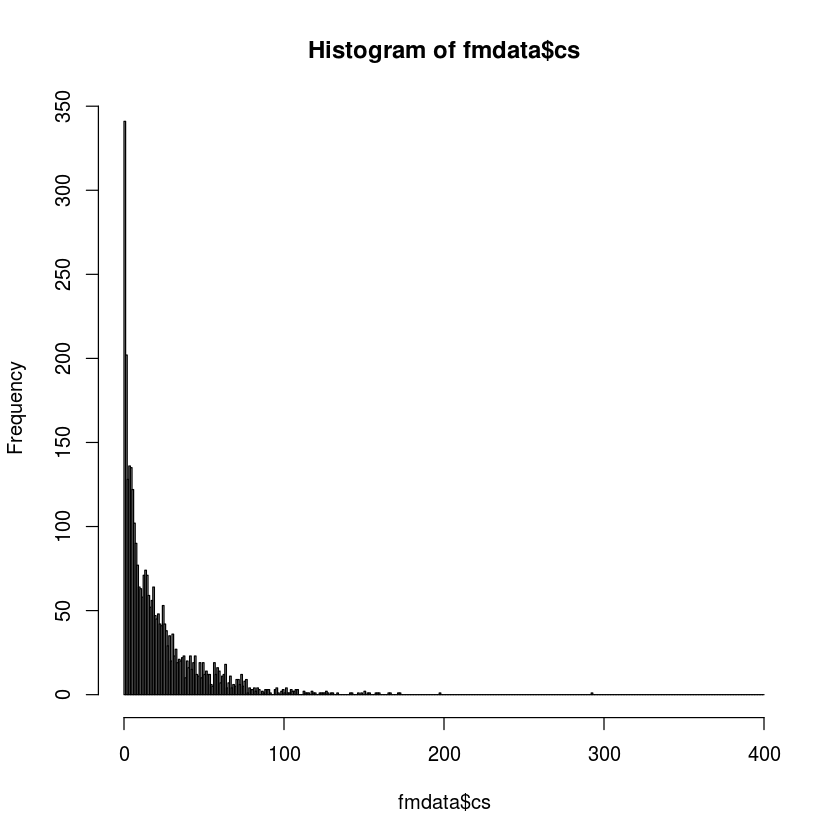

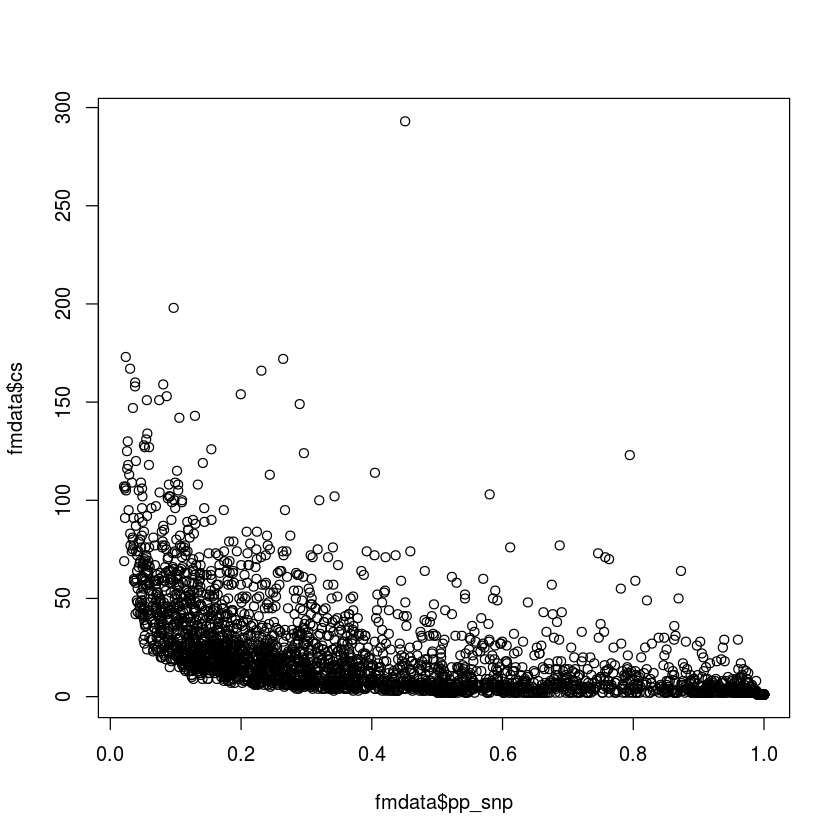

In [37]:
hist(fmdata$cs, breaks = 0:400)

plot(fmdata$pp_snp, fmdata$cs)

In [39]:
str(tofm)

'data.frame':	3164 obs. of  33 variables:
 $ transcript_id                               : chr  "ENSG00000000971.16_4" "ENSG00000000971.16_4" "ENSG00000002919.14_3" "ENSG00000002919.14_3" ...
 $ gene_id                                     : chr  "ENSG00000000971.16_4" "ENSG00000000971.16_4" "ENSG00000002919.14_3" "ENSG00000002919.14_3" ...
 $ gene_name                                   : chr  "CFH" "CFH" "SNX11" "SNX11" ...
 $ phenotype                                   : chr  "rna" "rna" "rna" "rna" ...
 $ nsnps                                       : int  994 994 1697 1697 2310 2310 2310 2310 592 592 ...
 $ PP.H0.abf                                   : num  3.14e-24 1.11e-07 7.87e-18 5.05e-18 1.03e-62 ...
 $ PP.H1.abf                                   : num  3.10e-06 3.75e-06 6.18e-08 4.98e-08 1.93e-02 ...
 $ PP.H2.abf                                   : num  8.26e-20 2.93e-03 1.16e-11 7.44e-12 1.85e-62 ...
 $ PP.H3.abf                                   : num  0.0807 0.0976 0.09 0.07

# Overlap loci with GWAS catalog

In [41]:
catalog_coord           = fread("/frazer01/reference/public/gwas_catalog/alternative.1", sep = "\t", header = TRUE, data.table = FALSE, quote = "")
catalog_coord           = catalog_coord[, c("CHR_ID", "CHR_POS", "SNPS", "PUBMEDID", "STUDY", "MAPPED_TRAIT", "P-VALUE", "PVALUE_MLOG", "OR or BETA", "95% CI (TEXT)")]
colnames(catalog_coord) = c("chrom", "pos", "rsid", "pmid", "study", "trait", "pval", "logp", "beta", "confint")
catalog_coord           = catalog_coord[ catalog_coord$chrom != "",]
catalog_coord$chrom     =                  paste0    ("chr", unlist(lapply(catalog_coord$chrom, function(x){unlist(strsplit(x, ";"))[[1]]})))
catalog_coord$pos       = suppressWarnings(as.numeric(       unlist(lapply(catalog_coord$pos  , function(x){unlist(strsplit(x, ";"))[[1]]}))))
catalog_bed             = paste(getwd(), "pipeline/eqtl.4.finemap_single/gwas_catalog.bed", sep = "/")
catalog_coord           = catalog_coord[ is.na(catalog_coord$pos) == FALSE, ]

fwrite(catalog_coord[order(catalog_coord$chrom, catalog_coord$pos), c("chrom", "pos", "pos", "rsid")], catalog_bed, sep = "\t", col.names = FALSE, row.names = FALSE)


In [43]:
liftover       = "/software/ucsc.linux.x86_64.20151103/liftOver"
liftover_chain = paste(getwd(), "input/hg19ToHg38.over.chain"                 , sep = "/")
loci_bed       = paste(getwd(), "pipeline/eqtl.4.finemap_single/loci.bed"     , sep = "/")
loci_hg38_bed  = paste(getwd(), "pipeline/eqtl.4.finemap_single/loci_hg38.bed", sep = "/")


loci$chrom2 = paste0("chr", loci$chrom)
fwrite(loci[order(loci$chrom, loci$from, loci$to), c("chrom2", "from", "to", "locus")], loci_bed, sep = "\t", col.names = FALSE, row.names = FALSE)

command = paste(liftover, loci_bed, liftover_chain, loci_hg38_bed, "unMapped")

system(command)

loci_hg38           = fread(loci_hg38_bed, sep = "\t", header = FALSE, data.table = FALSE)
colnames(loci_hg38) = c("chrom", "from", "to", "locus")

In [44]:
command               = paste("bedtools", "intersect", "-loj", "-a", loci_hg38_bed, "-b", catalog_bed)
intersected           = fread(cmd = command, sep = "\t", header = FALSE, data.table = FALSE)[,c(4,8)]
colnames(intersected) = c("locus", "rsid")
intersected           = merge(intersected, loci)
intersected           = merge(intersected, catalog_coord[,c("rsid", "pmid", "study", "trait")])
locus2catalog_start   = unique(intersected[ intersected$trait != "",c("locus", "ids", "trait")])


In [45]:
locus2catalog = as.data.frame(rbindlist(lapply(1:nrow(locus2catalog_start), function(ii)
{
    locus     = locus2catalog_start[ii, "locus"]
    ids       = locus2catalog_start[ii, "ids"  ]
    traits    = locus2catalog_start[ii, "trait"]
    ids       = unlist(strsplit(ids   , ","))
    traits    = unlist(strsplit(traits, ","))
    out       = as.data.frame(expand.grid(id = ids, catalog = traits), stringsAsFactors = FALSE)
    out$locus = locus
    
    return(out)
})), stringsAsFactors = FALSE)

locus2catalog = merge(locus2catalog, manifest[,c("id", "name")])

locus2catalog$id      = as.character(locus2catalog$id     )
locus2catalog$catalog = as.character(locus2catalog$catalog)


In [46]:
#locus2catalog = merge(locus2catalog, manifest[,c("id", "name")])

In [47]:
locus2match      = locus2catalog
locus2match$same = FALSE

locus2match[ tolower(locus2match$name) == tolower(locus2match$catalog), "same"] = TRUE


locus2match[ locus2match$name %in% c("Ablumin"                            ) & grepl(" albumin "              , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("amlodipine"                         ) & grepl("alcium channel blocker" , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("atenolol"                           ) & grepl("eta block"              , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("Coronary atherosclerosis"           ) & grepl("coronary artery disease", locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("Coronary atherosclerosis"           ) & grepl("artery stroke"          , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("HDL cholesterol"                    ) & grepl("HDL"                    , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("HDL cholesterol"                    ) & grepl("high density lipo"      , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("Pulse pressure"                     ) & grepl("pulse pressure"         , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("Pulse pressure"                     ) & grepl("blood pressure"         , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("Pulse rate"                         ) & grepl("heart rate"             , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("QRS duration"                       ) & grepl("QRS"                    , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("Triglycerides"                      ) & grepl("riglyceride"            , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("Ventricular rate"                   ) & grepl("heart rate"             , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ locus2match$name %in% c("Body mass index (BMI)"              ) & locus2match$catalog == "body mass index"                     , "same"] = TRUE
locus2match[ locus2match$name %in% c("Cholesterol"                        ) & locus2match$catalog == "total cholesterol measurement"       , "same"] = TRUE
locus2match[ locus2match$name %in% c("I25 Chronic ischaemic heart disease") & locus2match$catalog == "myocardial infarction"               , "same"] = TRUE
locus2match[ locus2match$name %in% c("I25 Chronic ischaemic heart disease") & locus2match$catalog == "cardiovascular disease"              , "same"] = TRUE
locus2match[ locus2match$name %in% c("I25 Chronic ischaemic heart disease") & locus2match$catalog == "coronary artery disease"             , "same"] = TRUE
locus2match[ locus2match$name %in% c("I48 Atrial fibrillation and flutter") & locus2match$catalog == "atrial fibrillation"                 , "same"] = TRUE
locus2match[ locus2match$name %in% c("Myocardial infarction"              ) & locus2match$catalog == "cardiovascular disease"              , "same"] = TRUE
locus2match[ locus2match$name %in% c("Myocardial infarction"              ) & locus2match$catalog == "coronary artery disease"             , "same"] = TRUE
locus2match[ locus2match$name %in% c("QRS duration"                       ) & locus2match$catalog == "electrocardiography"                 , "same"] = TRUE
locus2match[ grepl("LDL"     , locus2match$name) == TRUE                    & grepl("LDL"                    , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ grepl("LDL"     , locus2match$name) == TRUE                    & grepl("low density lipo"       , locus2match$catalog) == TRUE, "same"] = TRUE
locus2match[ grepl("pressure", locus2match$name) == TRUE                    & grepl("pressure"               , locus2match$catalog) == TRUE, "same"] = TRUE

locus2match = locus2match[order(locus2match$name, locus2match$catalog),]

fwrite(locus2match, "pipeline/eqtl.4.finemap_single/locus2match.txt", sep = "\t", col.names = TRUE, row.names = FALSE)


In [48]:
locus2match_by_trait = aggregate(same ~ locus + id + name, data = locus2match         , FUN = function(x){ifelse(test = length(x[x == TRUE]) > 0, yes = TRUE, no = FALSE)})
locus2match_by_locus = aggregate(same ~ locus            , data = locus2match         , FUN = function(x){ifelse(test = length(x[x == TRUE]) > 0, yes = TRUE, no = FALSE)})
locus2n1             = aggregate(same ~ locus            , data = locus2match_by_trait, FUN = function(x){length(x[x == TRUE ])})
locus2n2             = aggregate(same ~ locus            , data = locus2match_by_trait, FUN = function(x){length(x[x == FALSE])})
colnames(locus2n1)   = c("locus", "same"     )
colnames(locus2n2)   = c("locus", "different")
locus2n              = merge(locus2n1, locus2n2)
locus2n$n            = locus2n$same + locus2n$different



In [49]:
table(locus2match_by_locus$same)
table(locus2match_by_trait$same)




FALSE  TRUE 
  584  1410 


FALSE  TRUE 
 2089  4325 

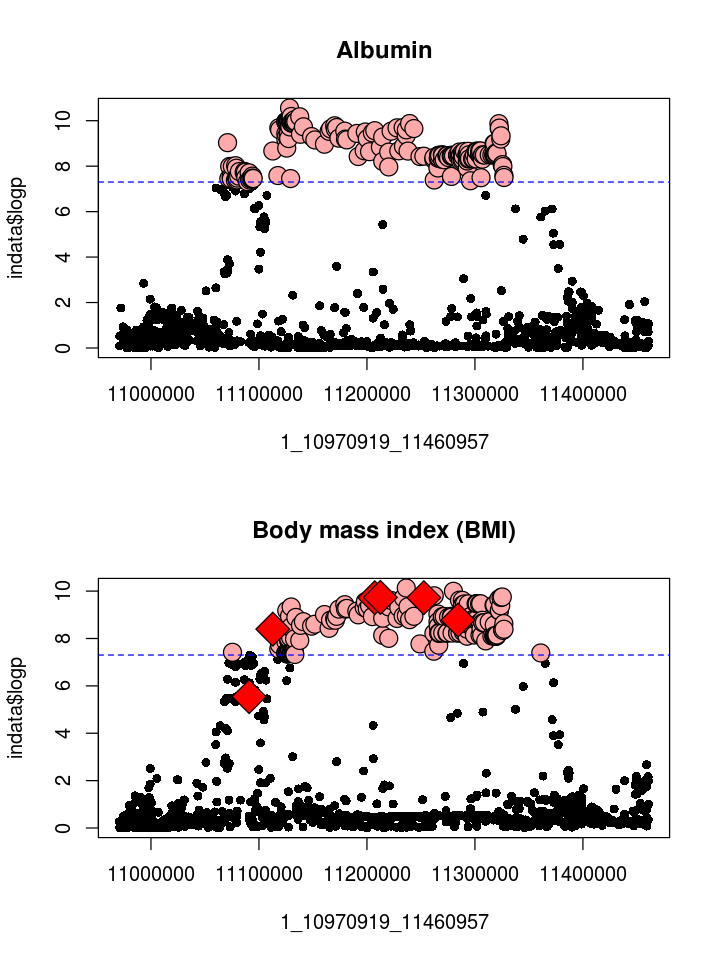

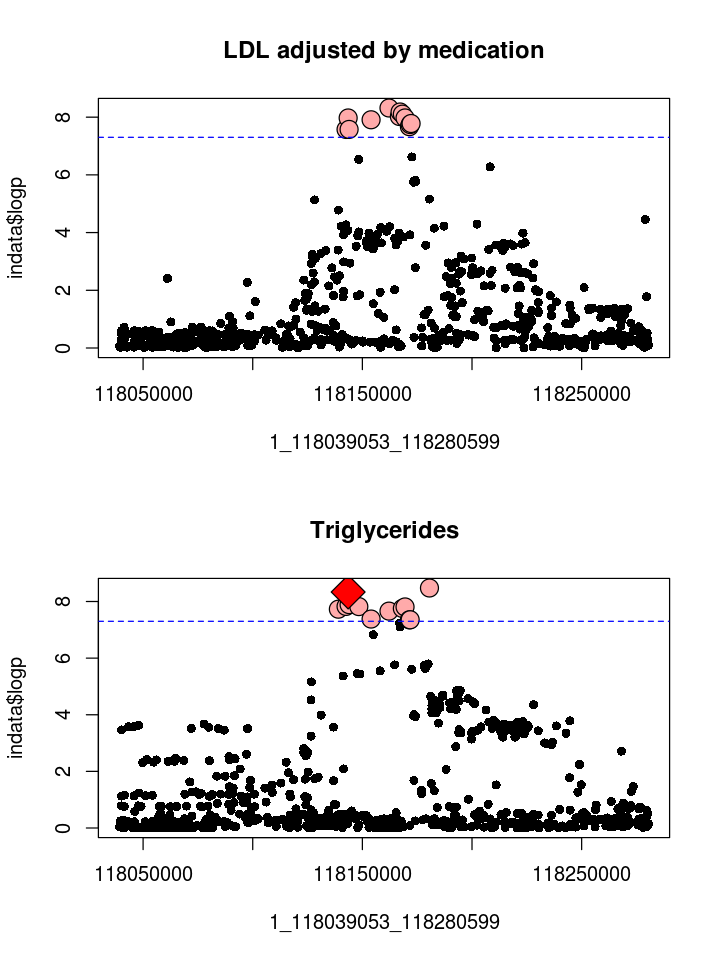

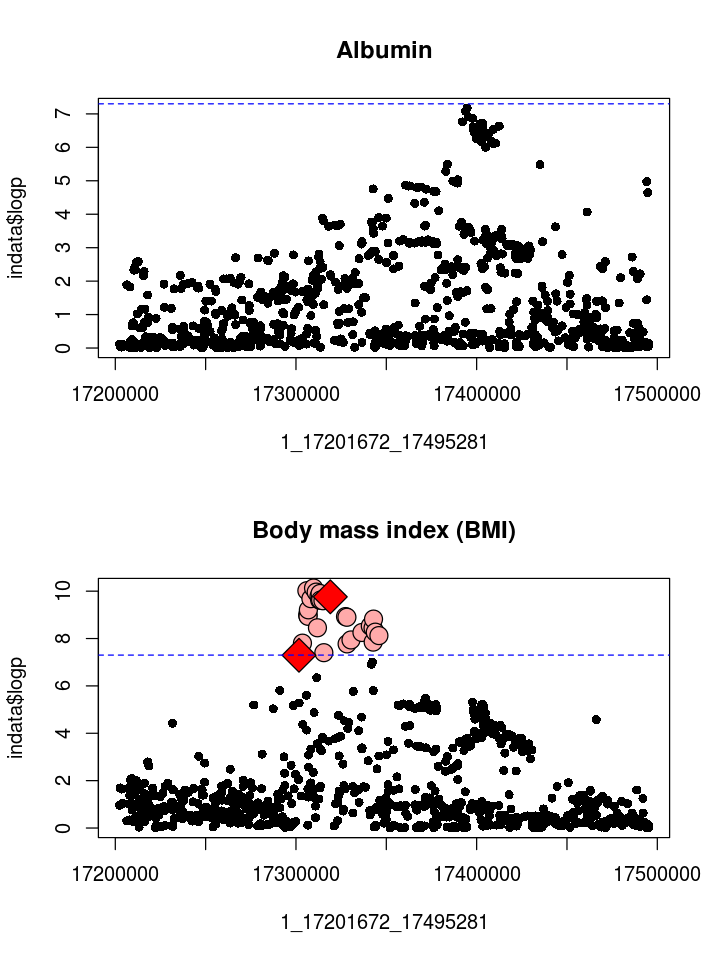

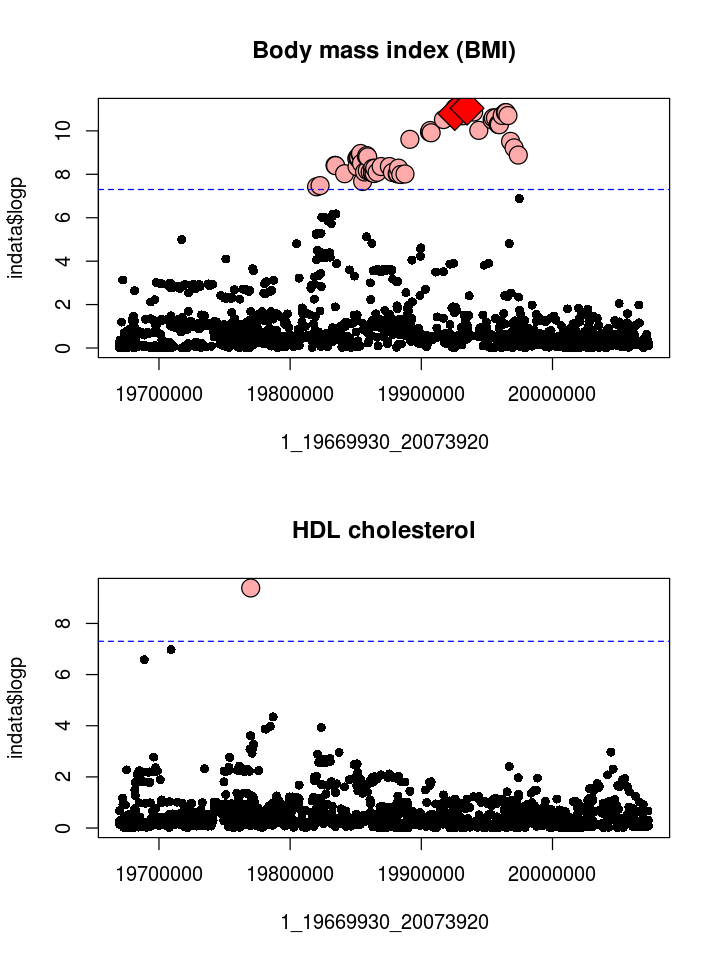

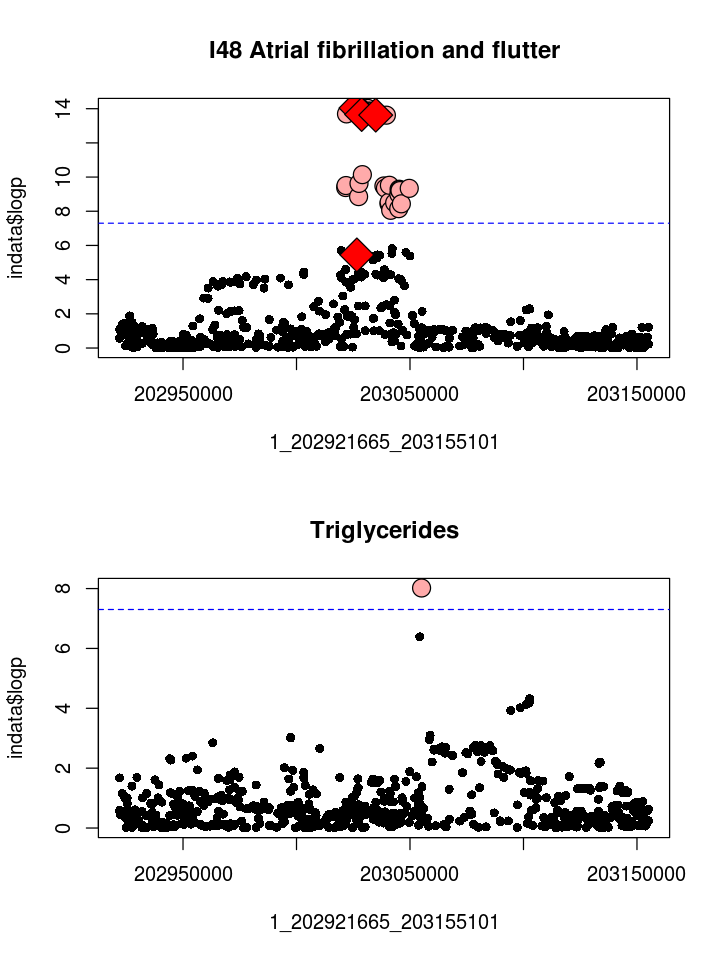

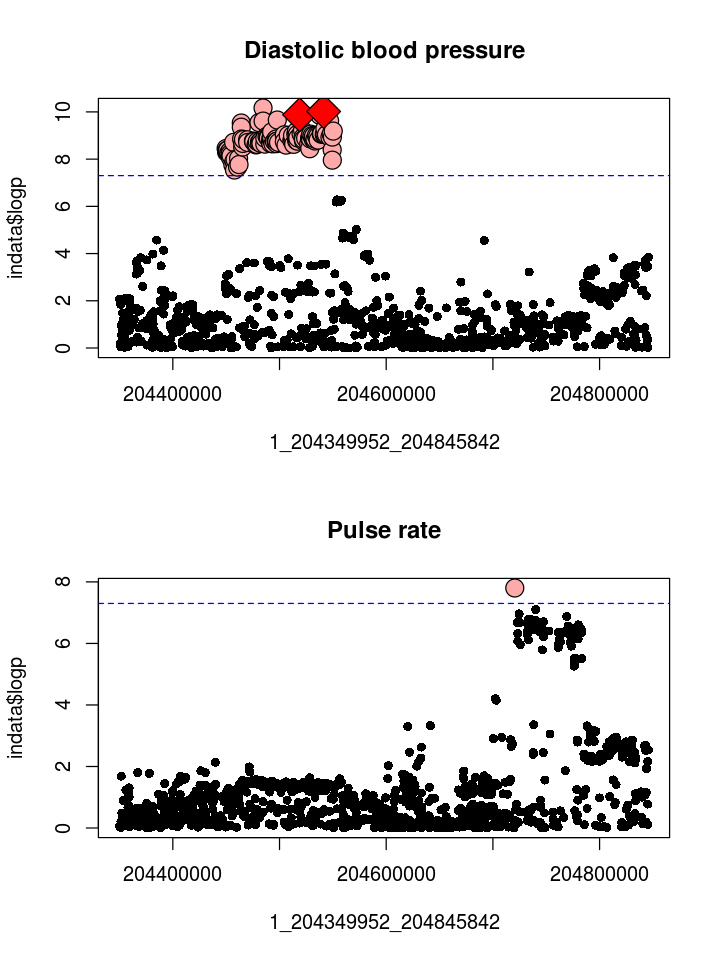

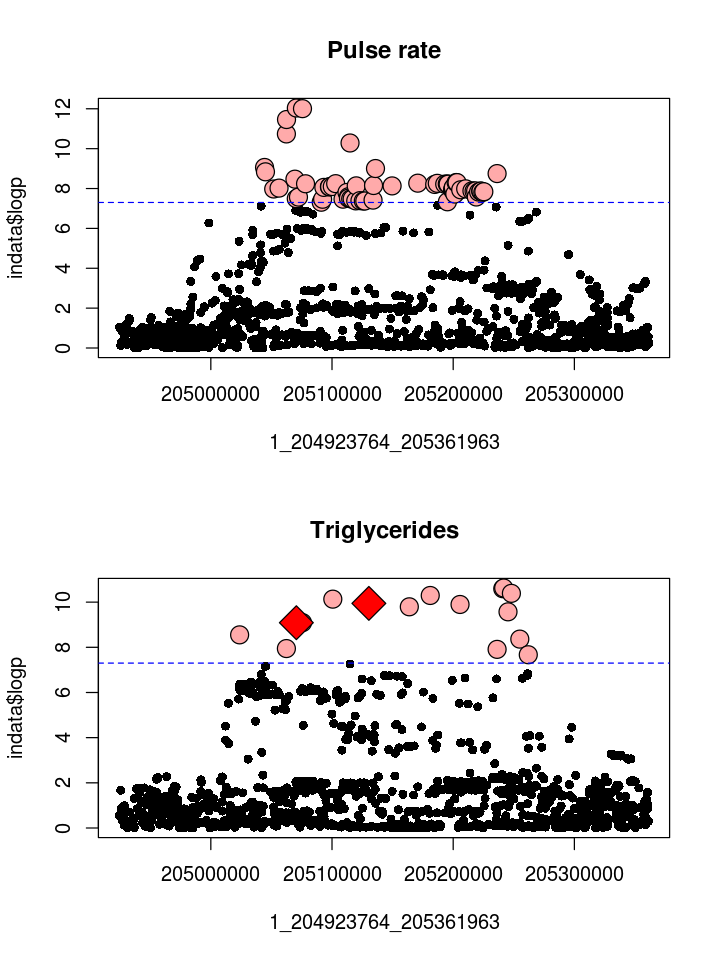

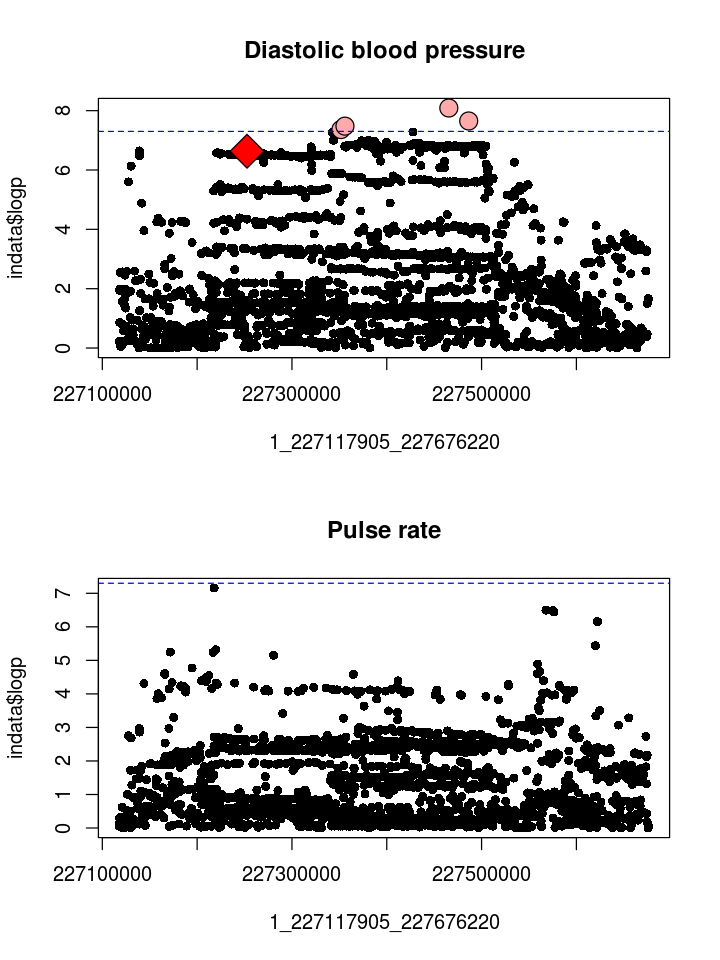

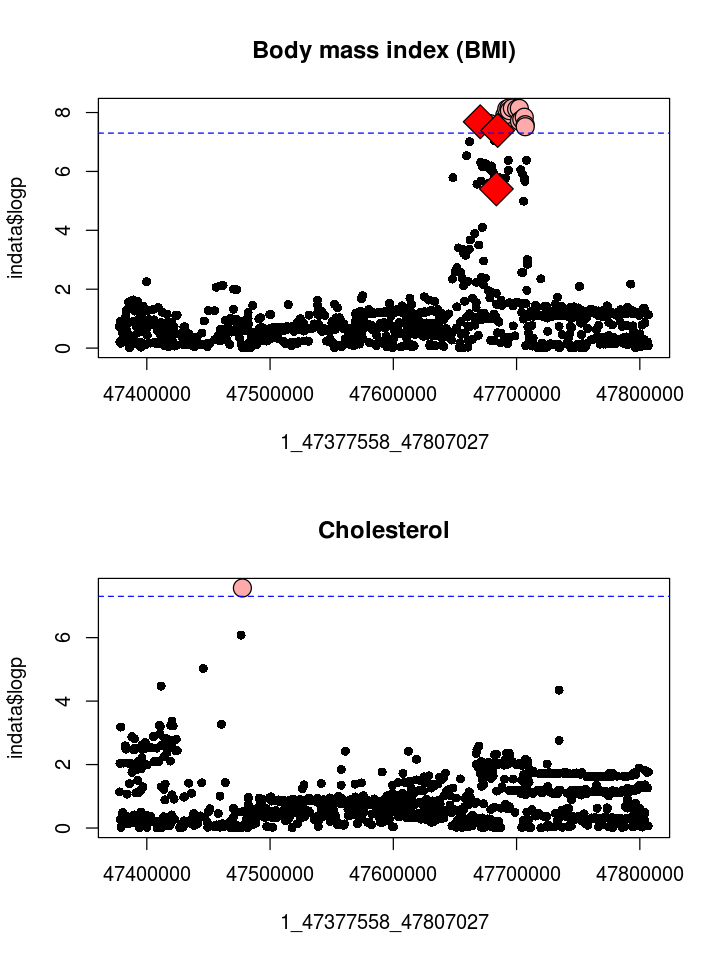

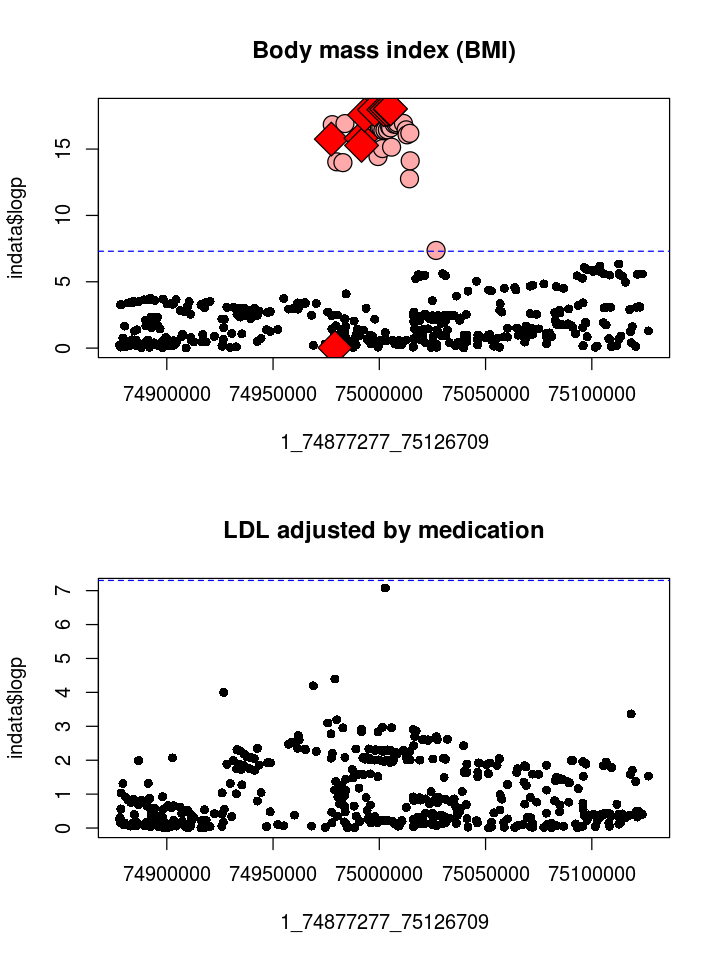

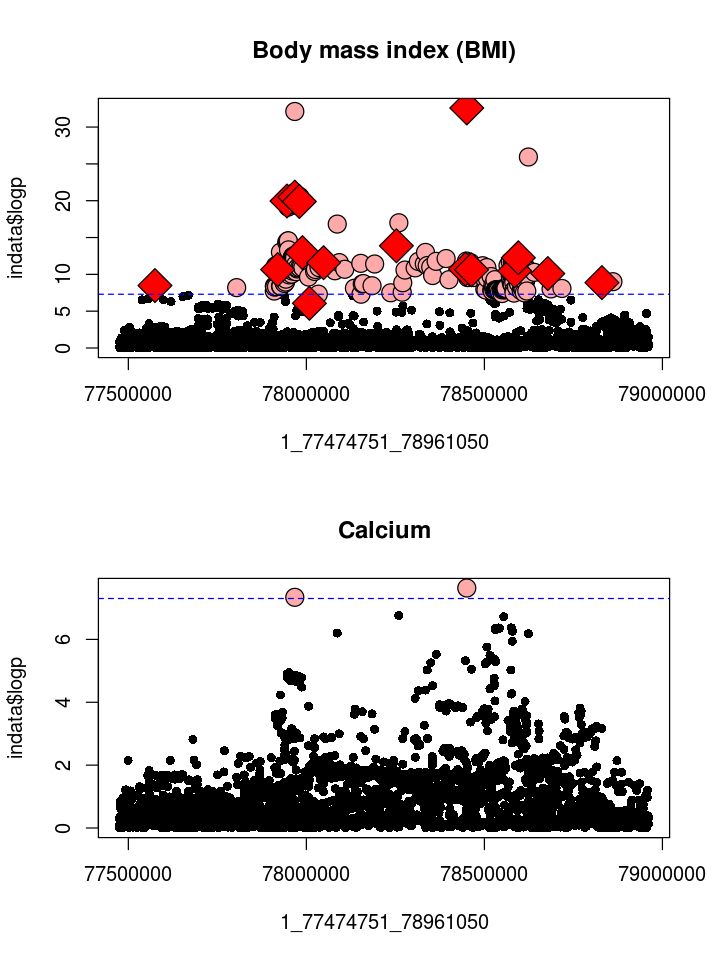

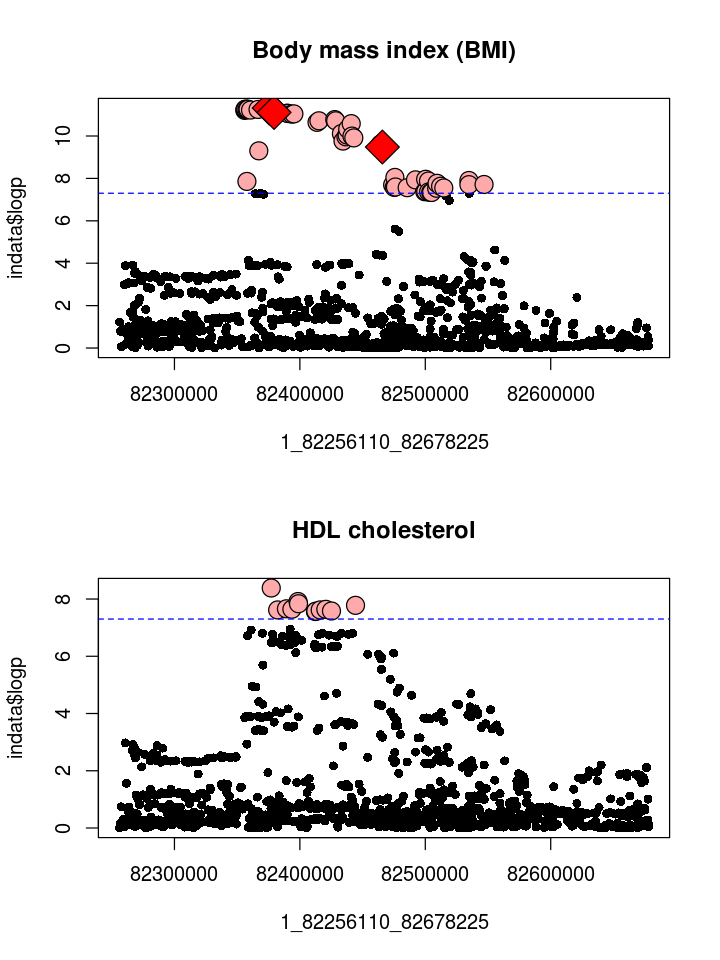

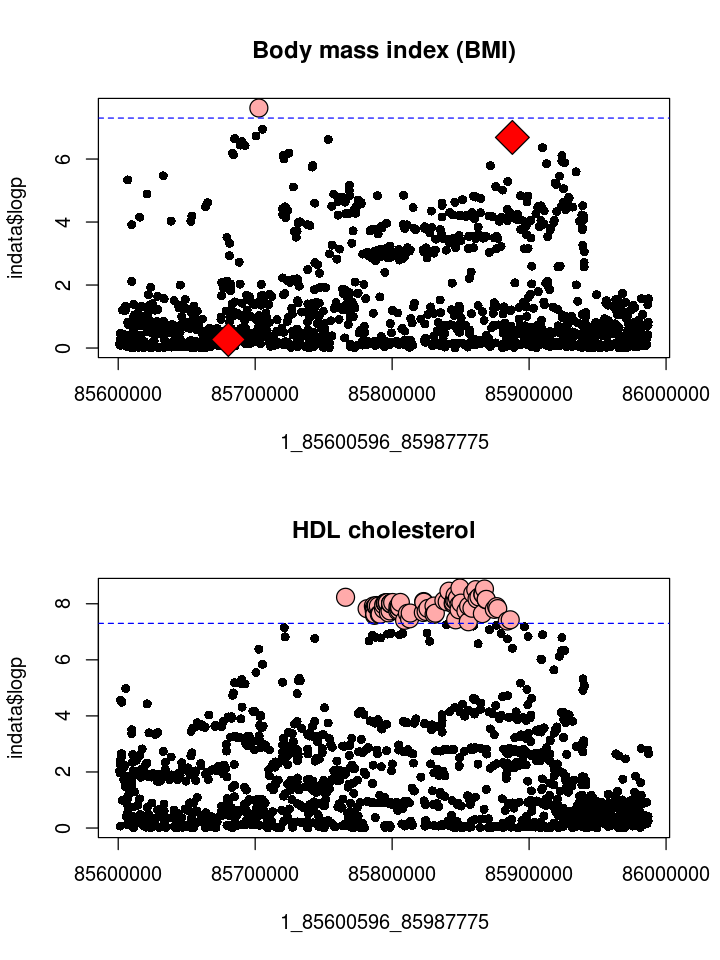

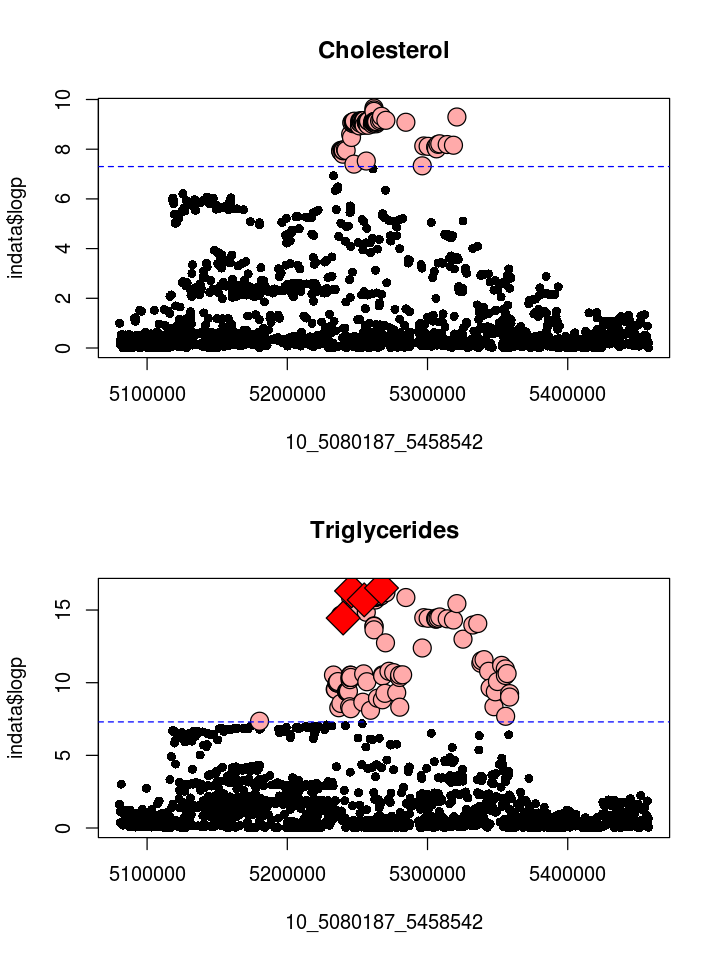

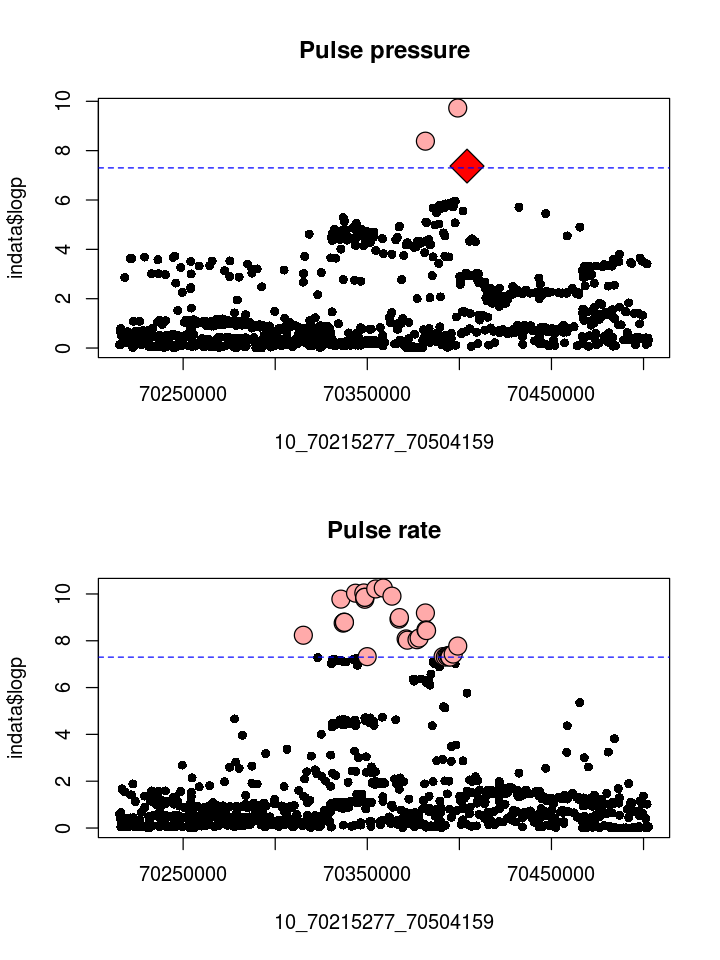

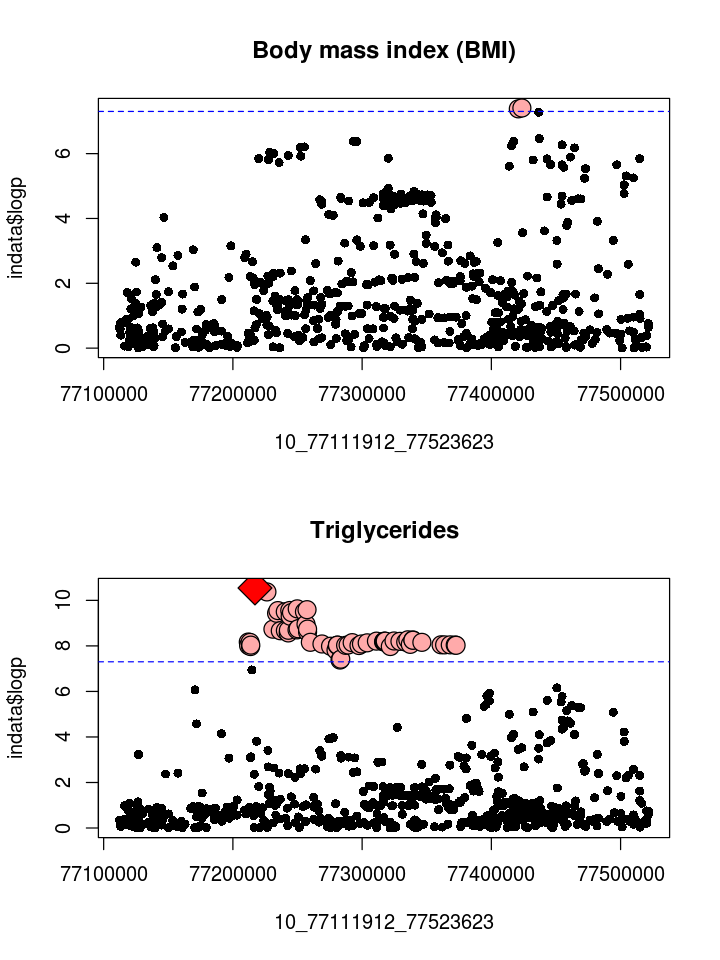

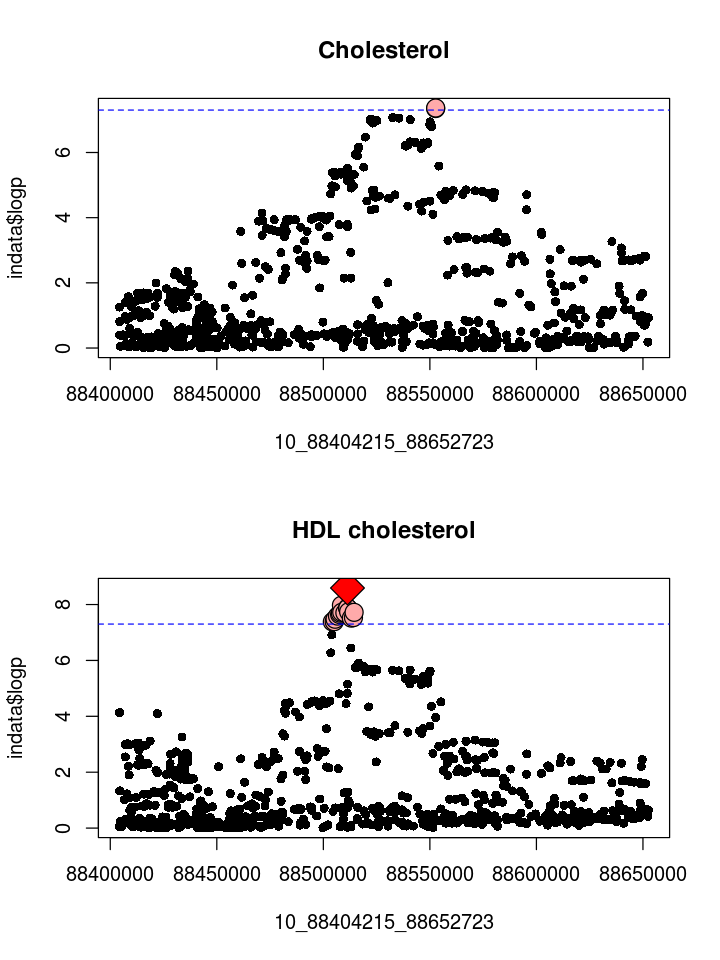

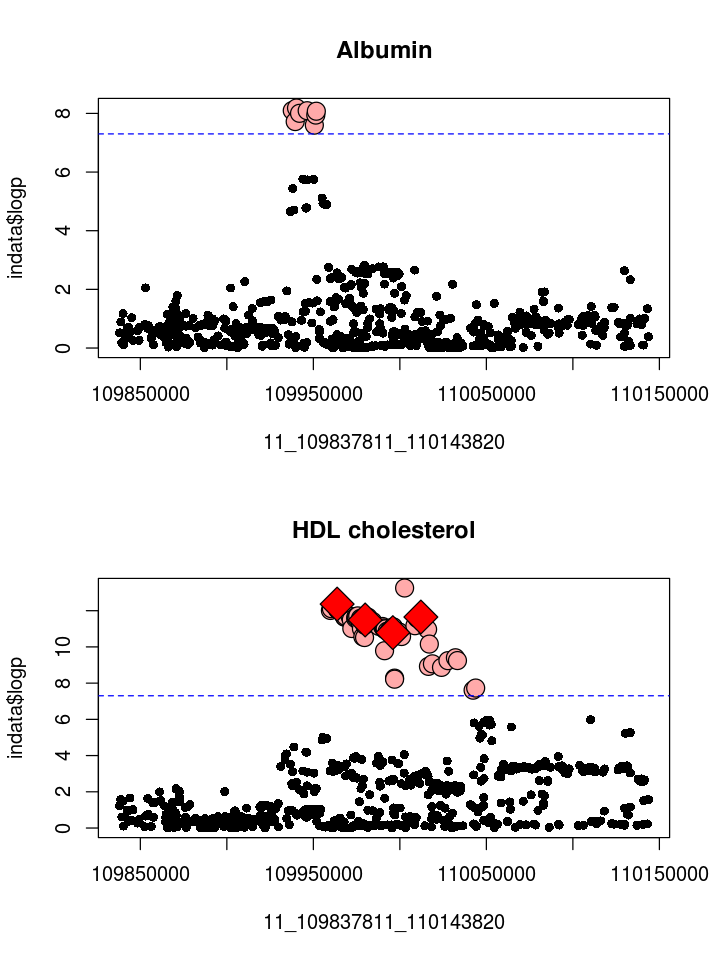

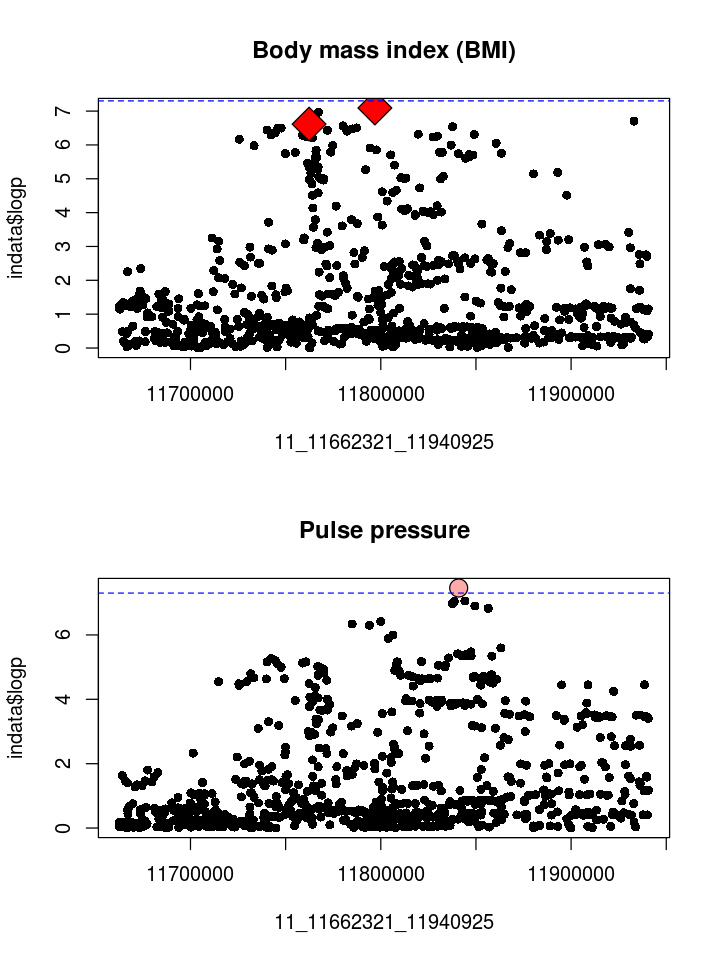

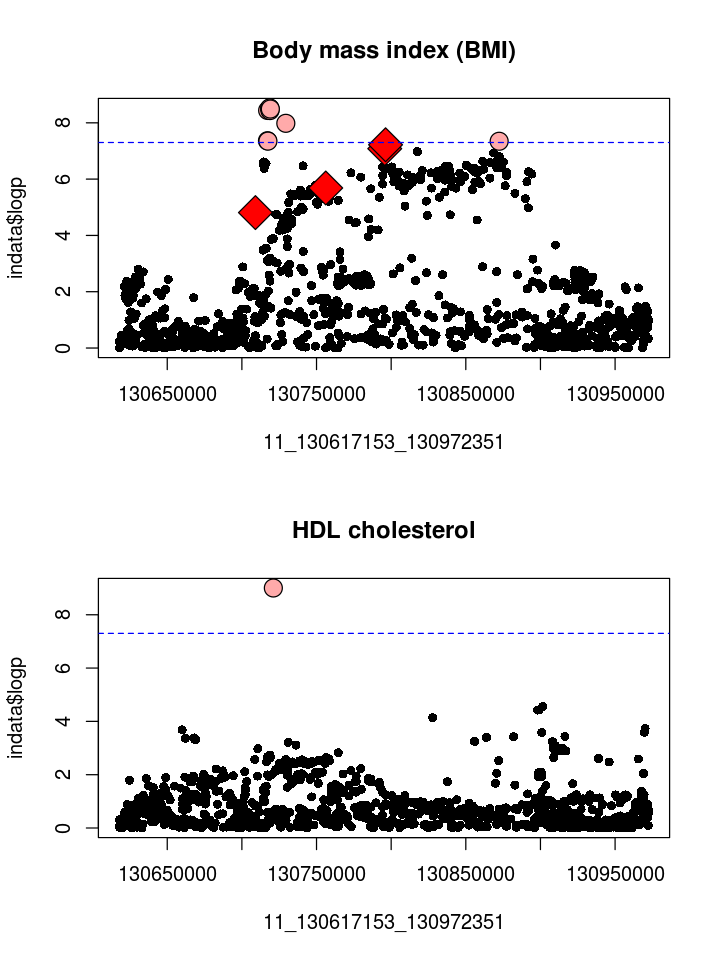

In [50]:
get_gwas_data = function(coord, gwas_file)
{
    my_head              = colnames(fread(cmd = paste("zcat", gwas_file, "|", "head -n 2"), sep = "\t", header = TRUE, data.table = FALSE))
    gwas_data            = suppressWarnings(tabix.read.table(gwas_file, coord, col.names = TRUE, stringsAsFactors = FALSE))
    colnames(gwas_data)  = my_head
    gwas_data$variant_id = paste(gwas_data$chr, gwas_data$pos, gwas_data$ref, gwas_data$alt, sep = "_")
    rownames(gwas_data)  = gwas_data$variant_id
    gwas_data$pval       = unlist(apply(gwas_data[, grepl("pval", colnames(gwas_data)) == TRUE], 1, function(x){min(x, na.rm = TRUE)}))
    gwas_data$beta       = gwas_data$beta_meta
    
    return(gwas_data[ gwas_data$pval <= 5e-8,c("pos", "ref", "alt", "variant_id", "beta", "pval")])
}

find_example = function(locus)
{
    by_trait    =        locus2match_by_trait[ locus2match_by_trait$locus ==   locus,]
    locus2match = unique(locus2match         [ locus2match         $locus ==   locus & locus2match$same ==    TRUE       ,"catalog"])
    intersected = unique(intersected         [ intersected         $locus ==   locus & intersected$trait %in% locus2match,"rsid"   ])
    coords_hg38 = unique(catalog_coord       [ catalog_coord       $rsid  %in% intersected, c("chrom", "pos", "rsid")])
    
    coords_hg38$pos2 = coords_hg38$pos + 1
    
    tmpfile_in  = tempfile(pattern = "hg38", tmpdir = getwd(), fileext = ".bed")
    tmpfile_out = tempfile(pattern = "hg19", tmpdir = getwd(), fileext = ".bed")
    
    fwrite(coords_hg38[ order(coords_hg38$chrom, coords_hg38$pos), c("chrom", "pos", "pos2", "rsid")], tmpfile_in, sep = "\t", col.names = FALSE, row.names = FALSE)
    
    liftover_chain = paste(getwd(), "input/hg38ToHg19.over.chain", sep = "/")
    command        = paste(liftover, tmpfile_in, liftover_chain, tmpfile_out, "unMapped")

    system(command)

    coords_hg19           = fread(tmpfile_out, sep = "\t", header = FALSE, data.table = FALSE)[,c(2,4)]
    colnames(coords_hg19) = c("pos", "rsid")
    
    options(repr.plot.width = 6, repr.plot.height = 4 * nrow(by_trait))
    
    layout(cbind(1:nrow(by_trait)))
    
    coord            = sub("_", "-", sub("_", ":", locus))
    gwas_list        = lapply(by_trait$id, function(trait)
    {
        indata = get_gwas_data(coord, manifest[trait, "sumstat_file"])[,c("pos", "pval_meta")]
        indata$logp = -log10(indata$pval)
        
        if(nrow(indata[indata$pval == 0, ]) > 0){indata[indata$pval == 0, "logp"] = -log10(min(indata[indata$pval > 0, "pval"]))}
        
        indata = merge(indata, coords_hg19, all.x = TRUE)
        
        indata$cex =  1
        indata$pch = 16
        indata$bg  = "#ffffff"
        
        if(nrow(indata[ indata$pval <= 5e-8,]) > 0)
        {
            indata[ indata$pval <= 5e-8, "pch"] = 21
            indata[ indata$pval <= 5e-8, "cex"] =  2
            indata[ indata$pval <= 5e-8, "bg" ] = "#ffaaaa"
        }
        
        if (by_trait[ by_trait$id == trait, "same"] == TRUE)
        {
            indata[is.na(indata$rsid) == FALSE, "cex"] =  3
            indata[is.na(indata$rsid) == FALSE, "pch"] = 23
            indata[is.na(indata$rsid) == FALSE, "bg" ] = "#ff0000"
        }
        
        indata = indata[order(indata$cex),]
        
        plot(indata$pos, indata$logp, pch = indata$pch, cex = indata$cex, bg = indata$bg, main = manifest[ trait, "name"], xlab = locus)
        
        abline(h = -log10(5e-8), lty = "dashed", col = "#0000ff")
        return(indata)
    })
    names(gwas_list) = by_trait$id
    
    return(list(by_trait, coords_hg38, coords_hg19, gwas_list))
}

locus = "1_204349952_204845842"

x = invisible(lapply(head(locus2n[ locus2n$n == 2 & locus2n$same > 0 & locus2n$different > 0, "locus"], n = 20), function(locus){find_example(locus)}))


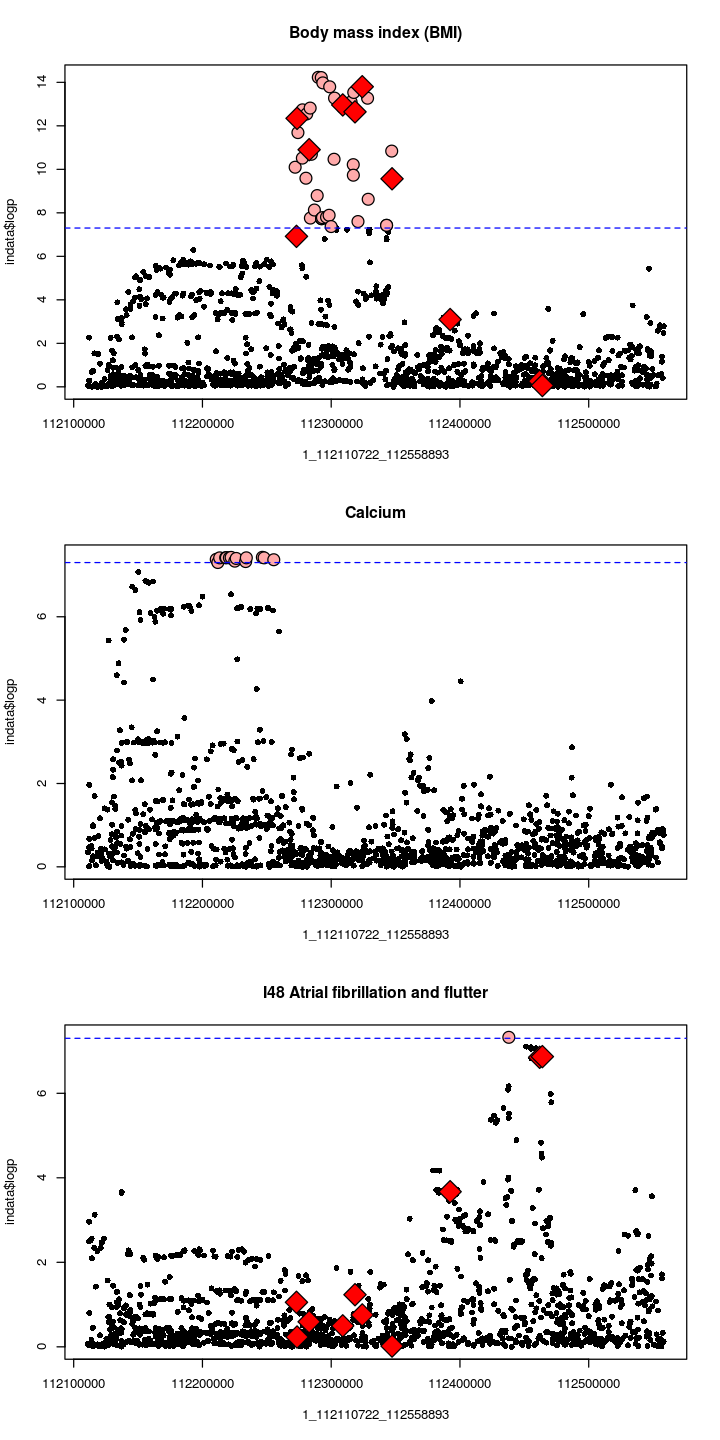

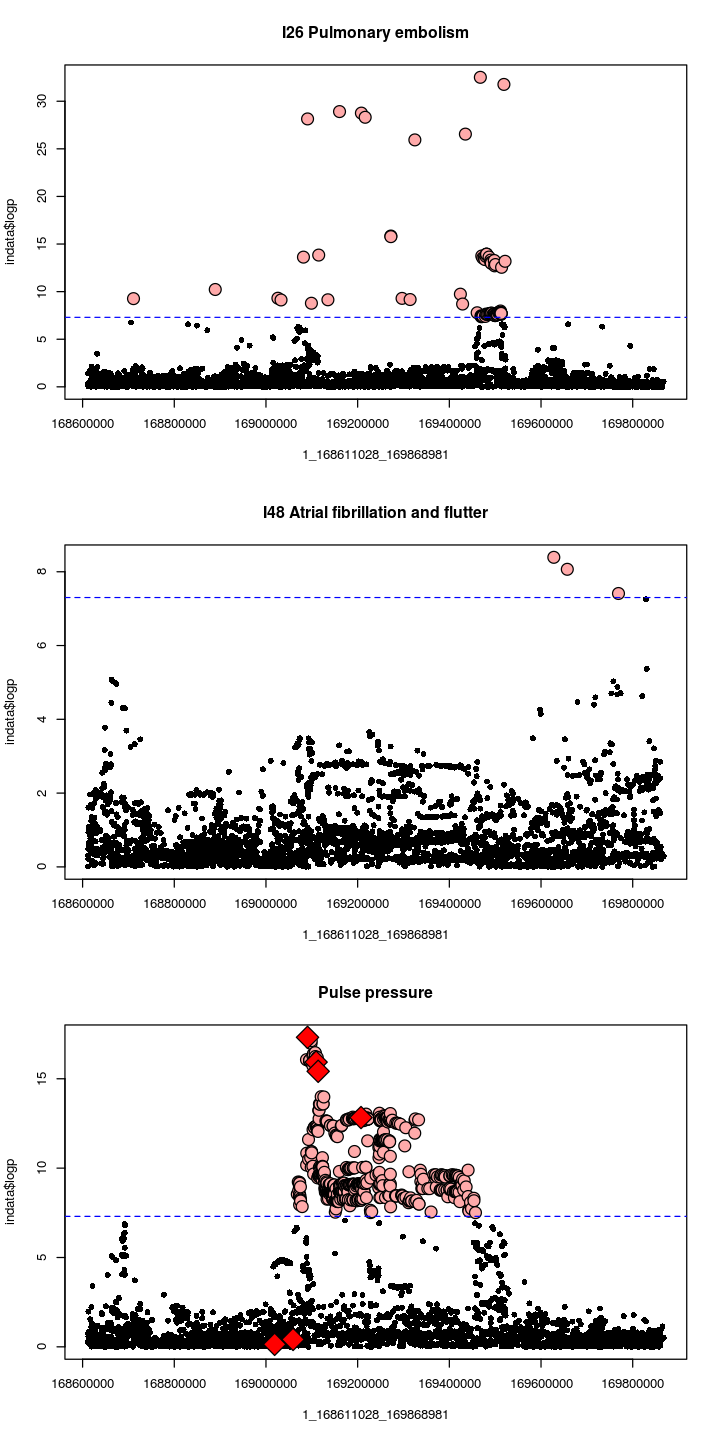

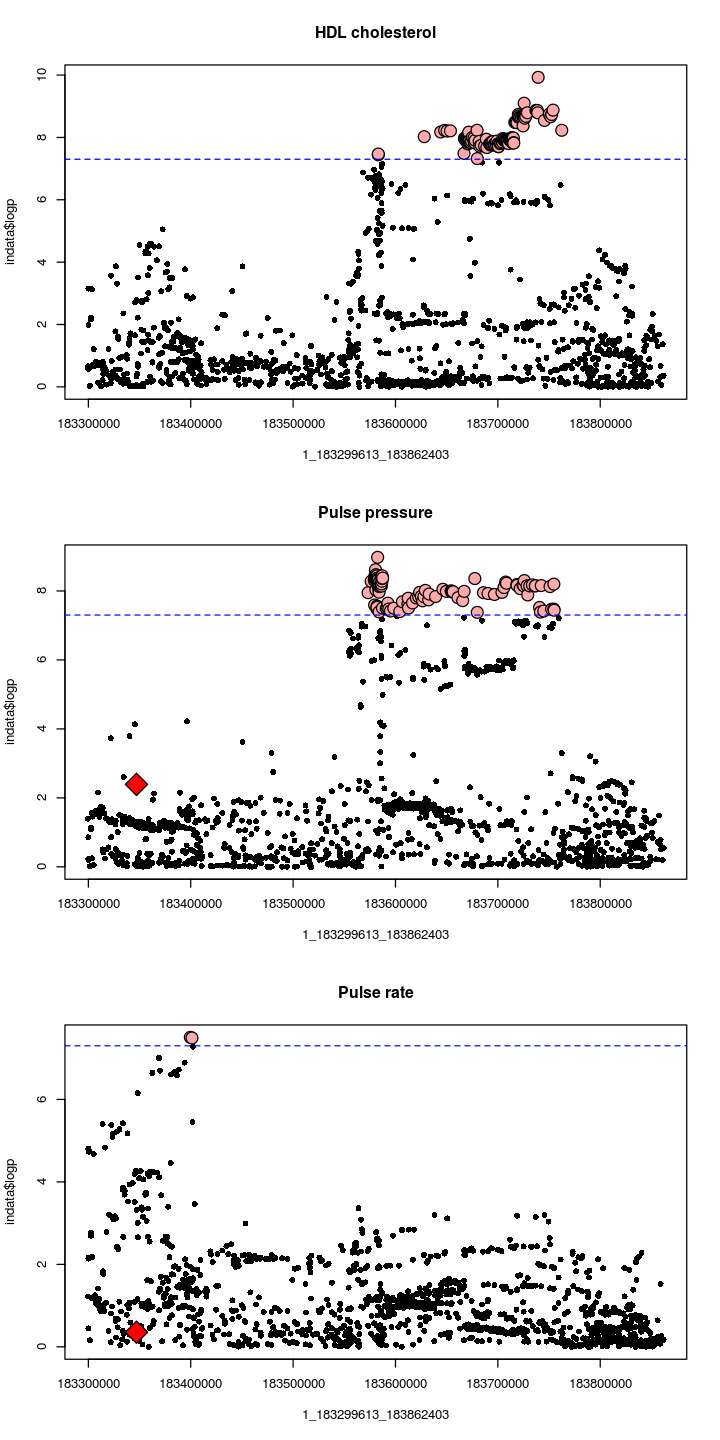

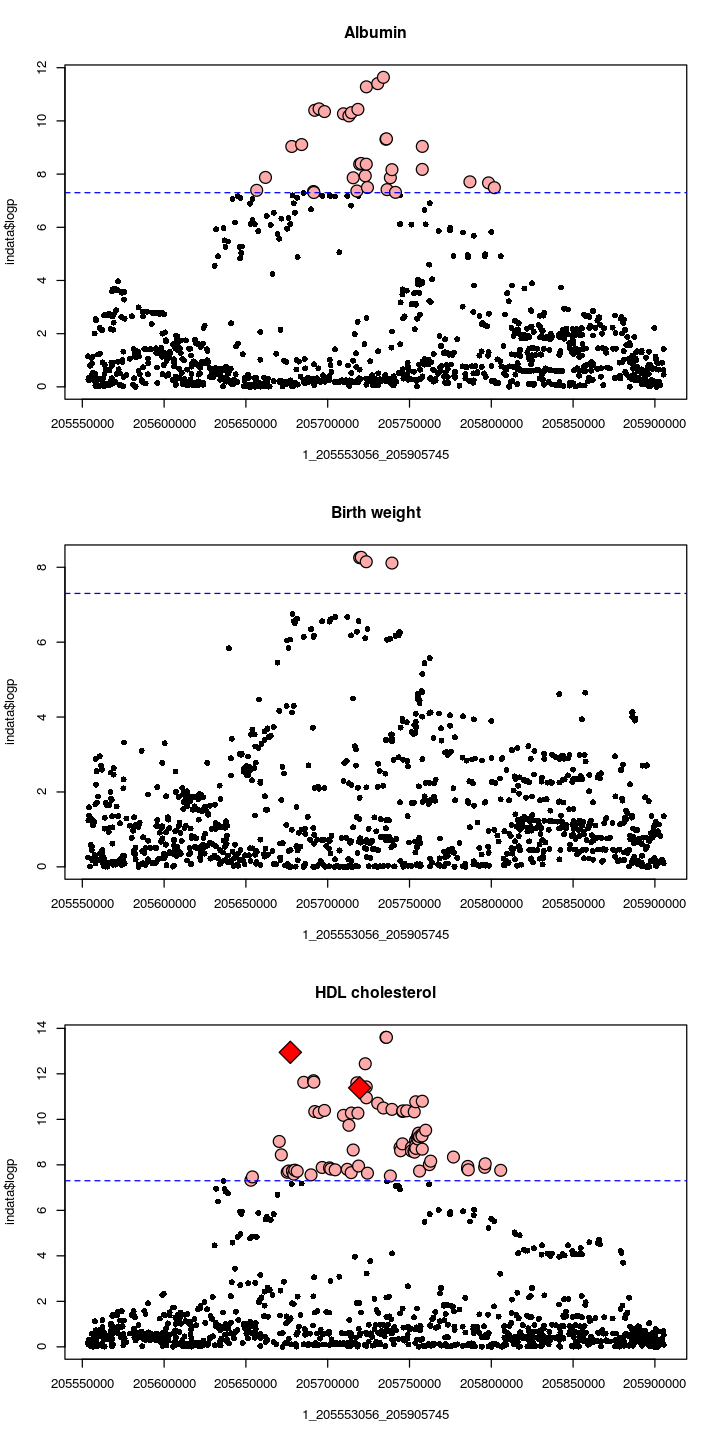

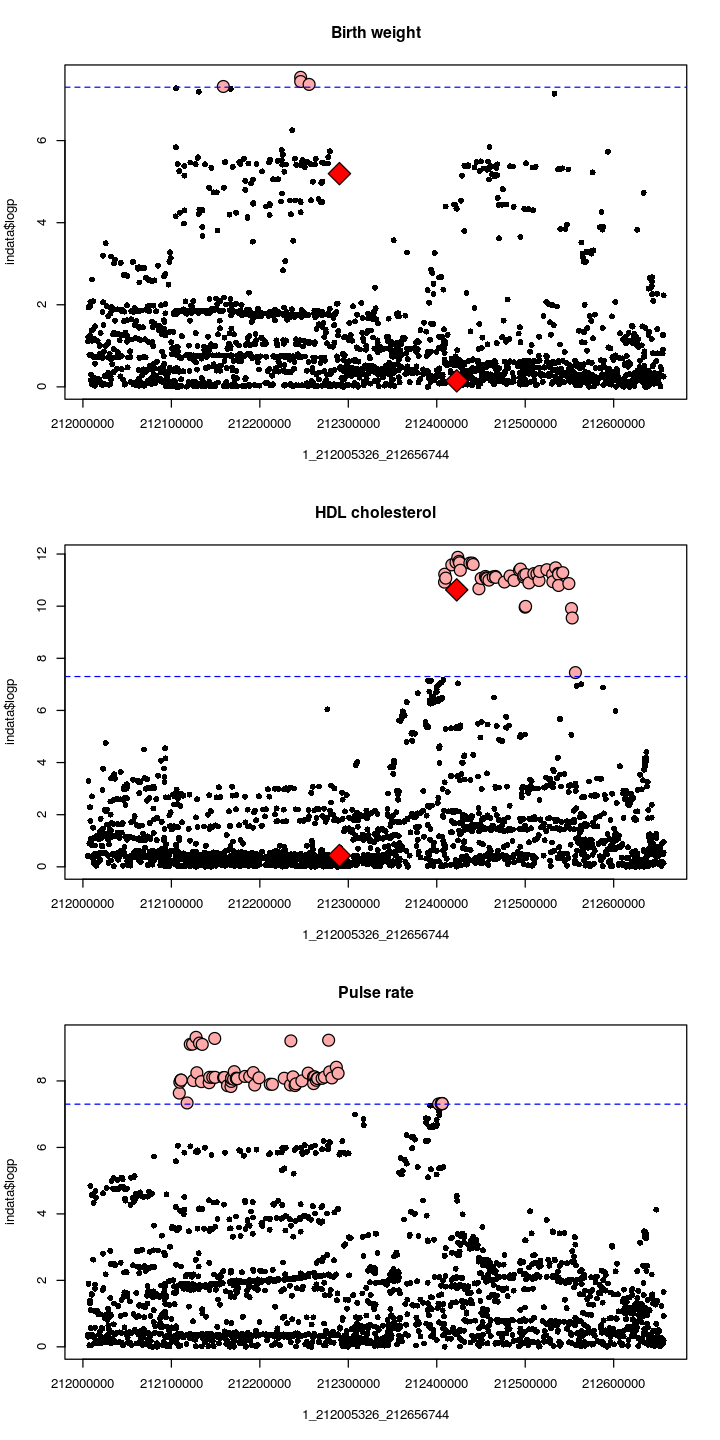

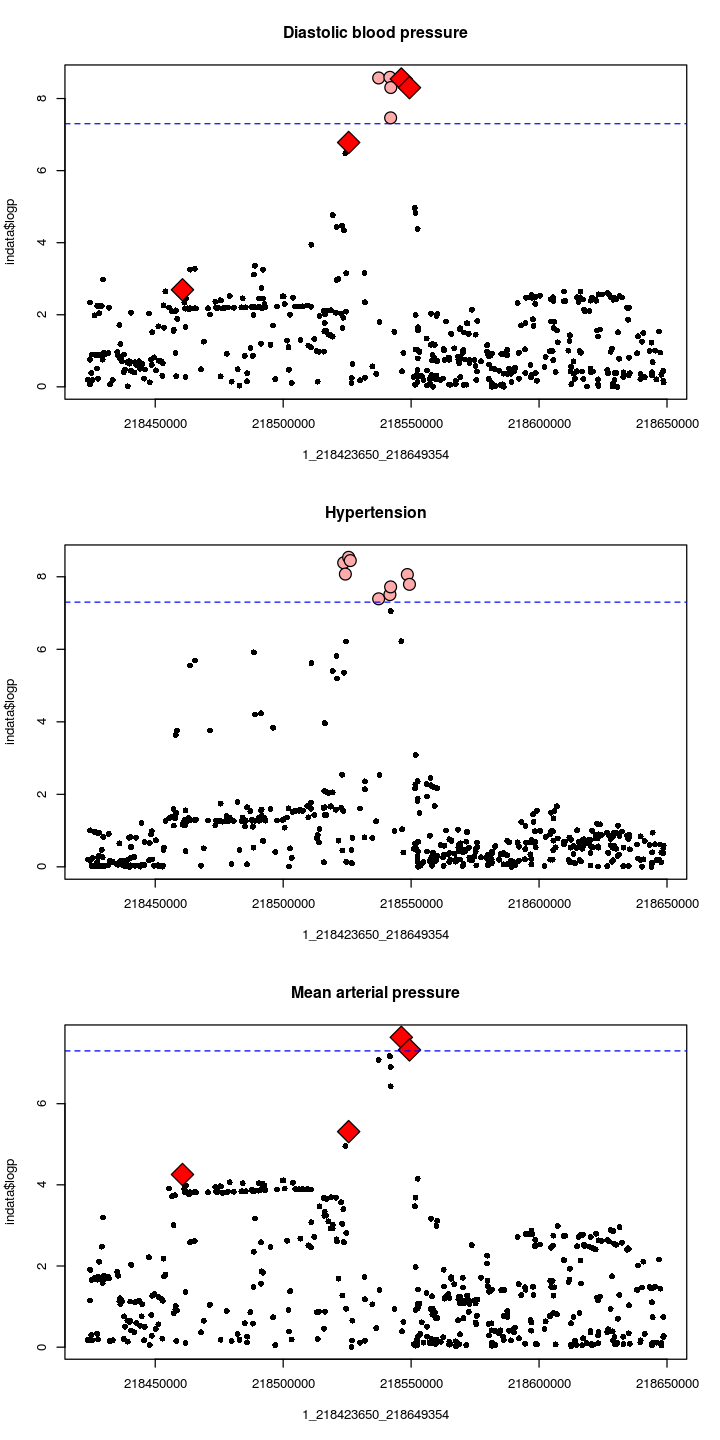

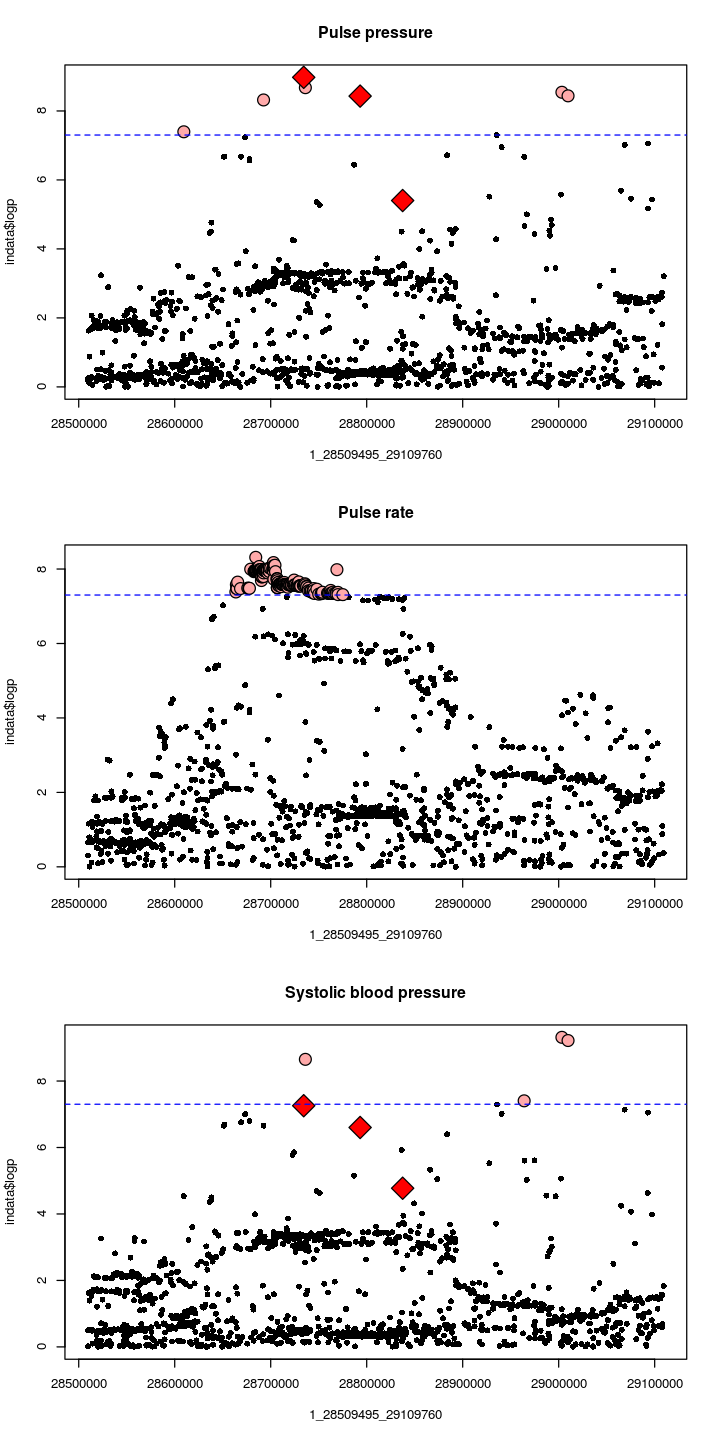

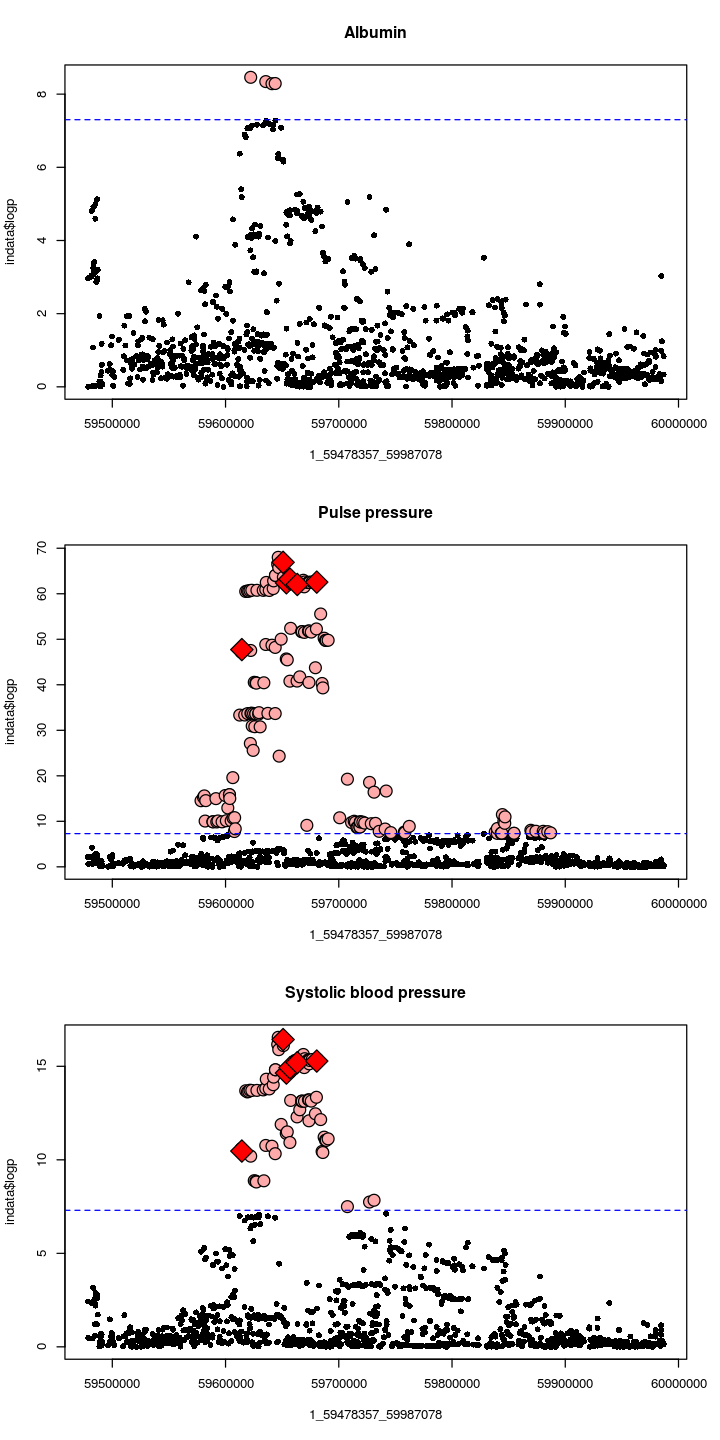

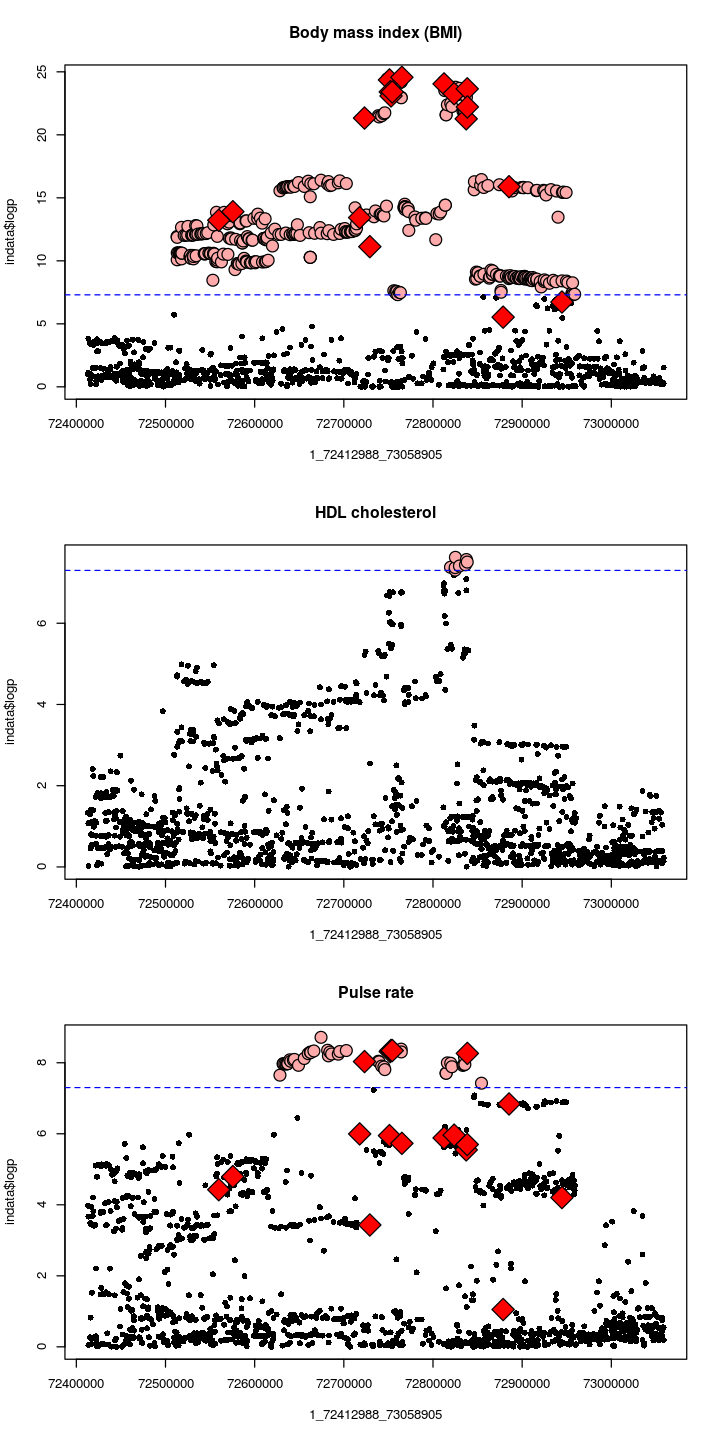

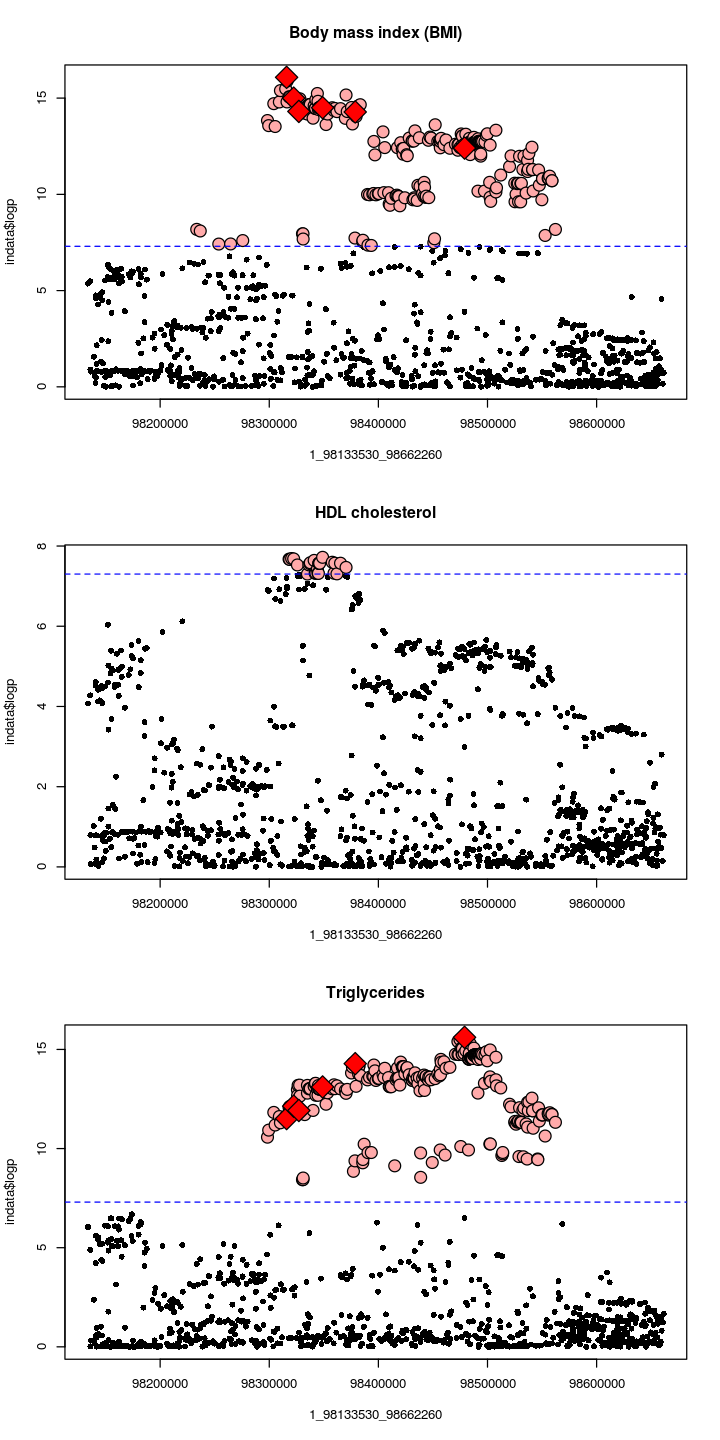

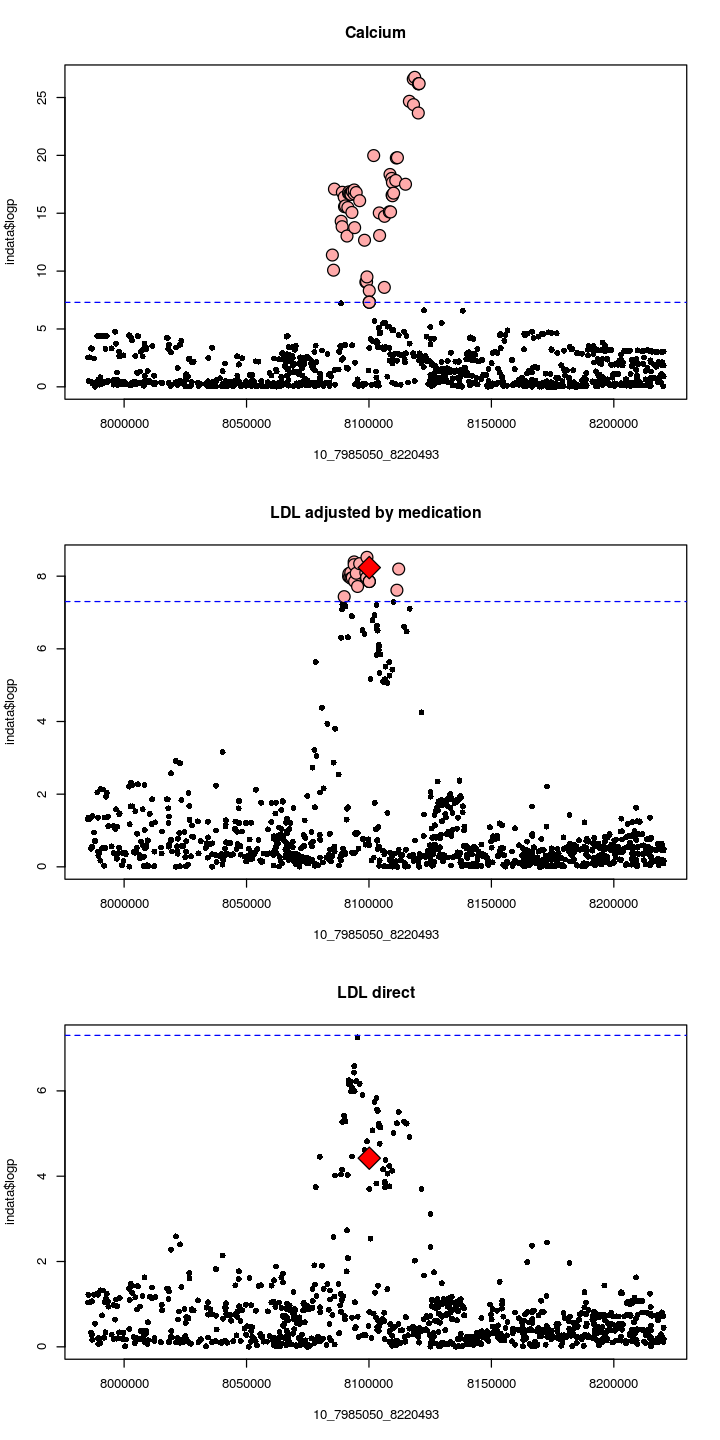

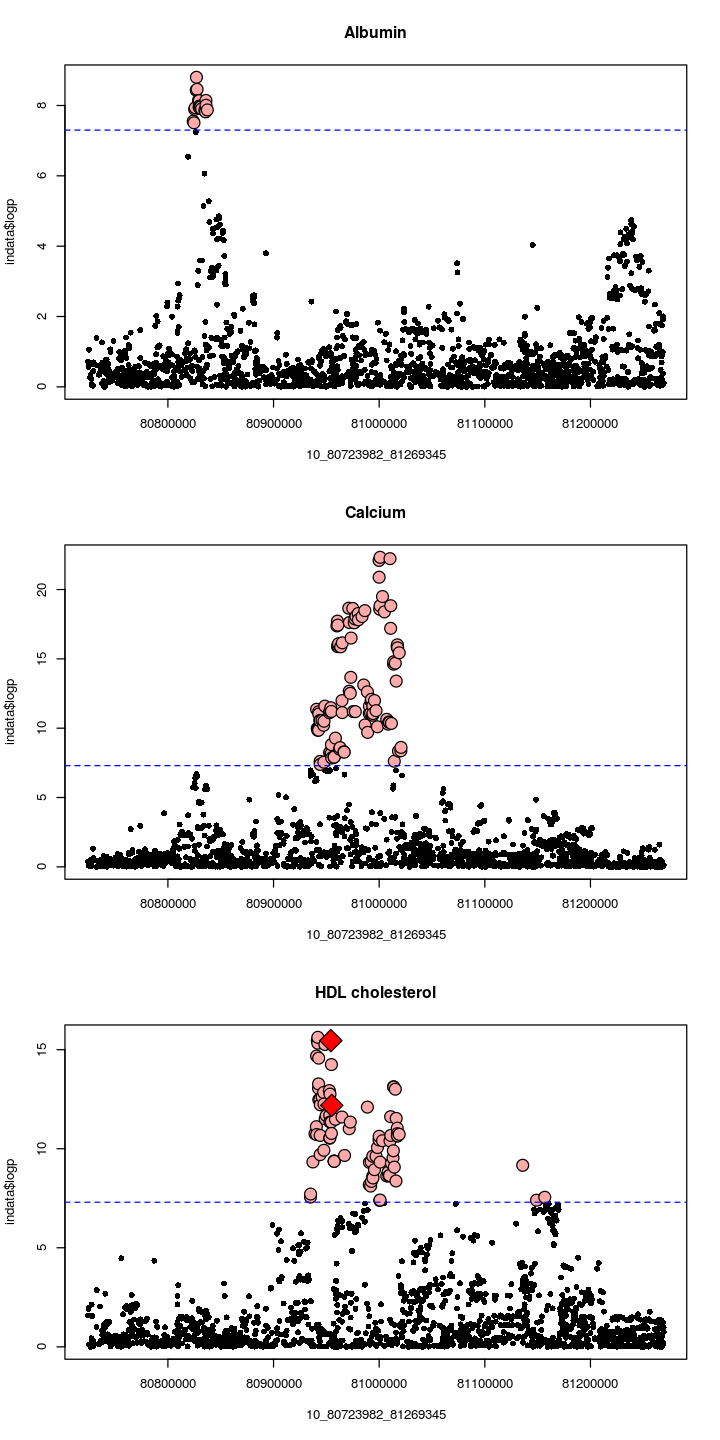

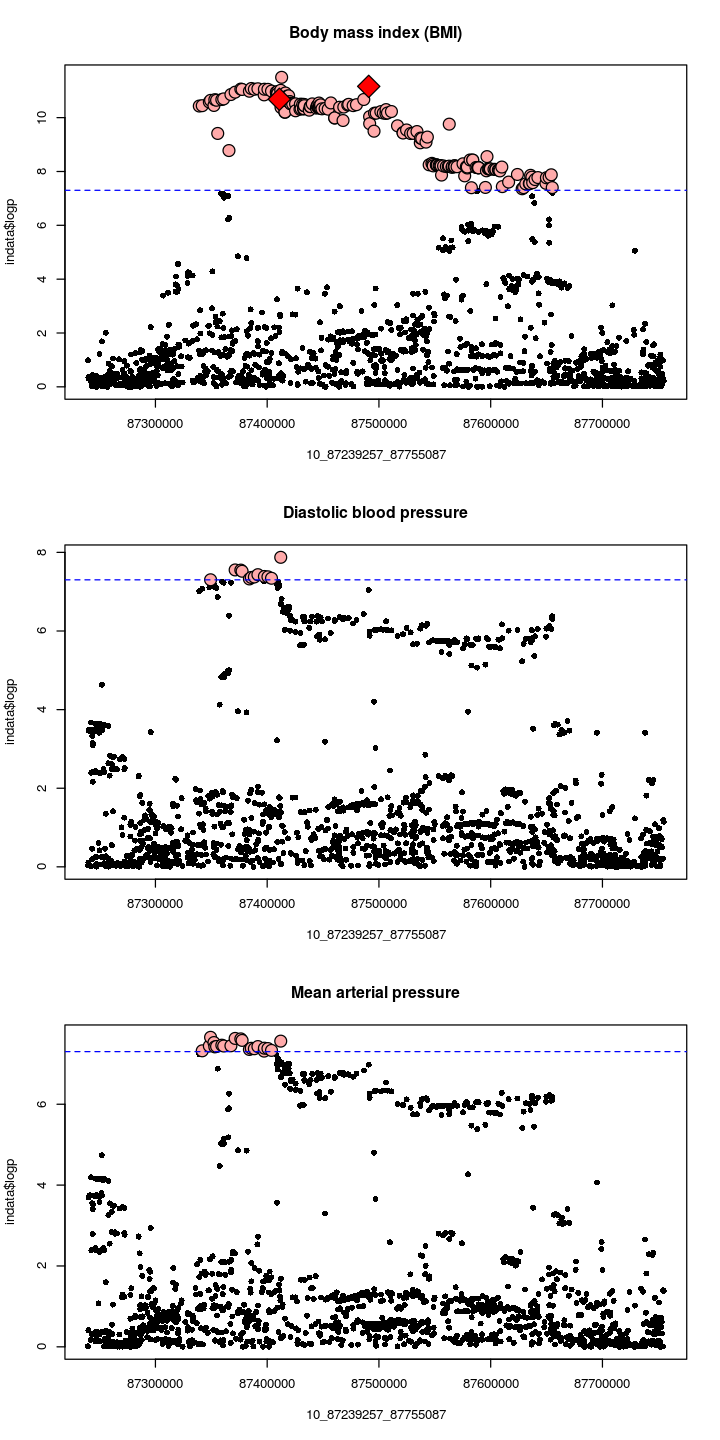

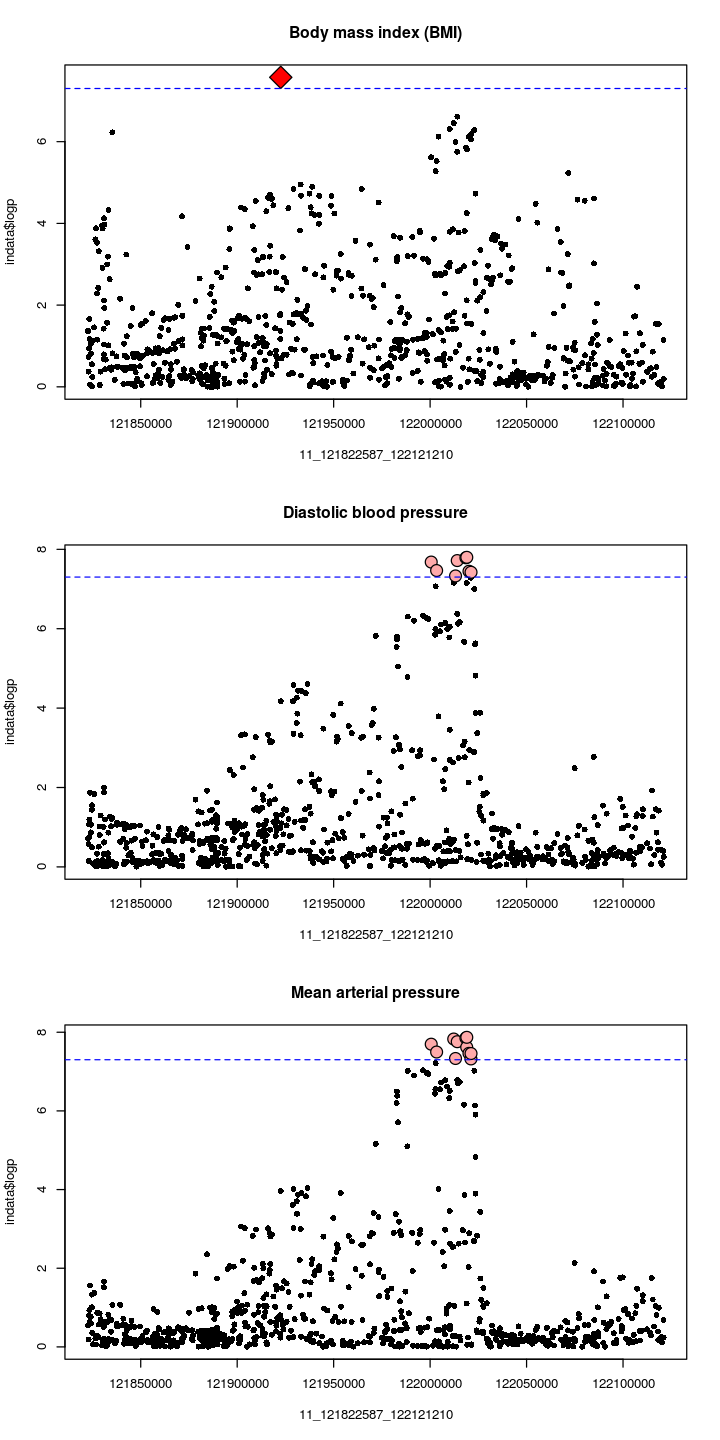

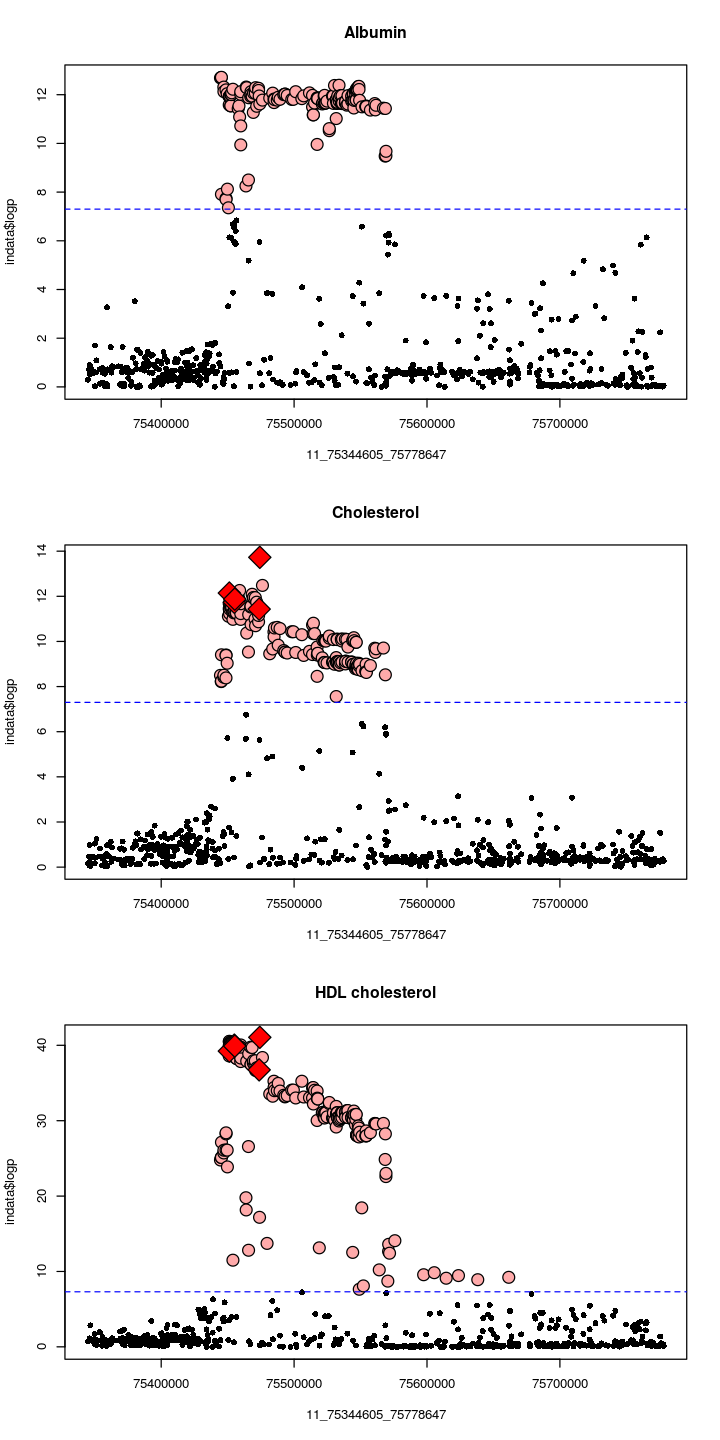

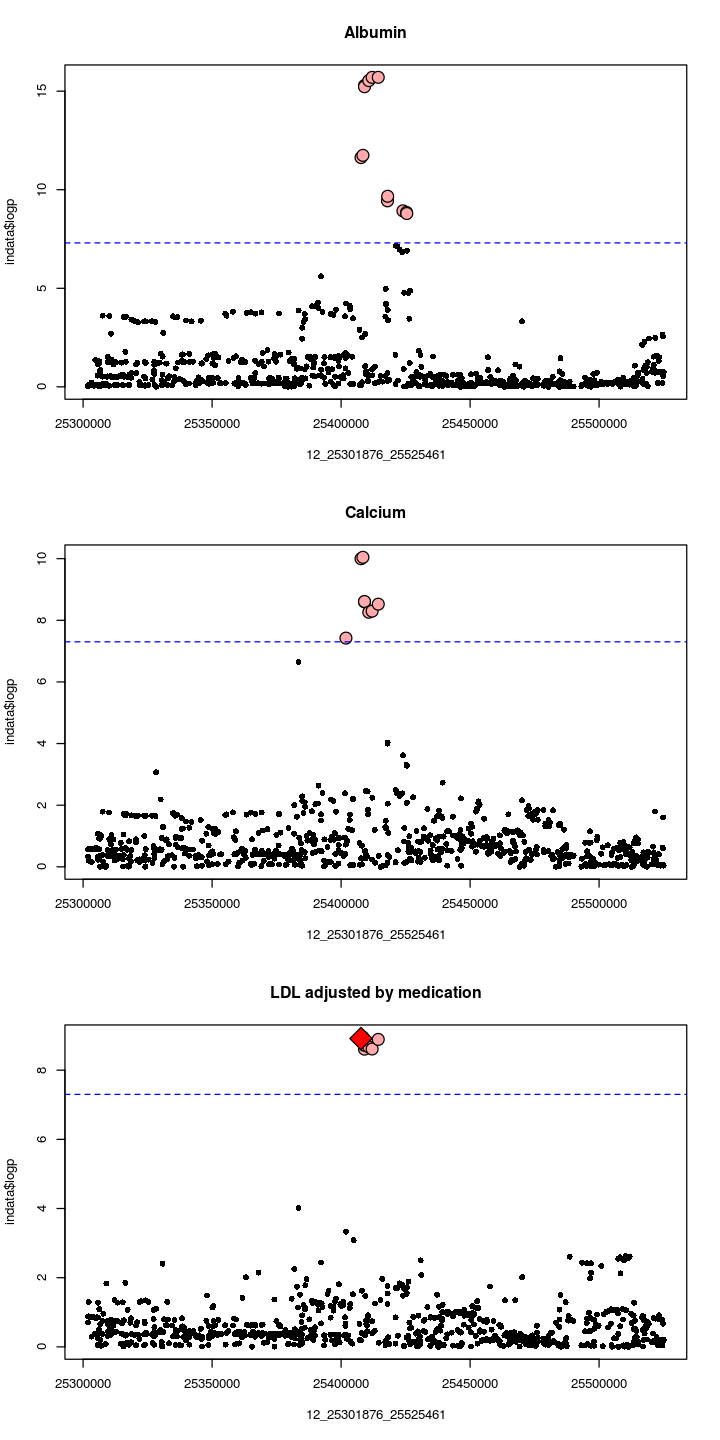

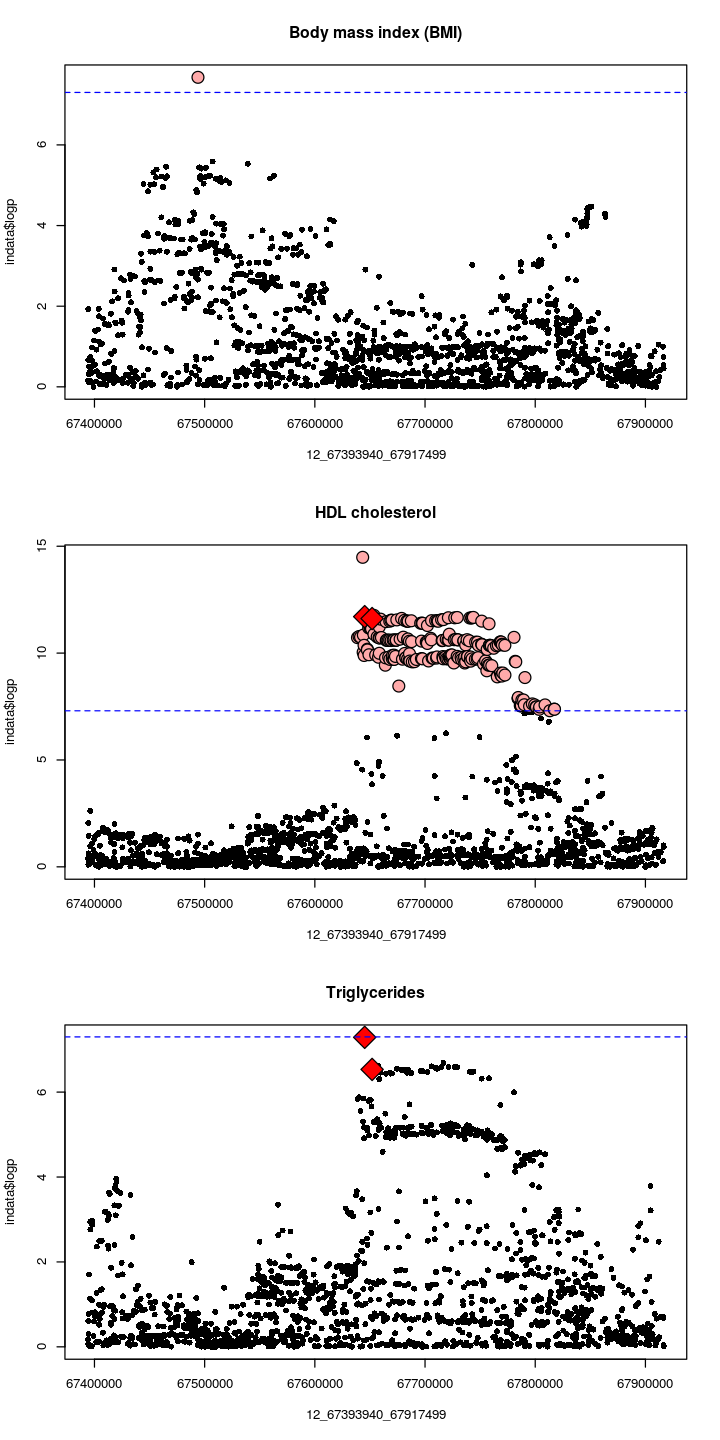

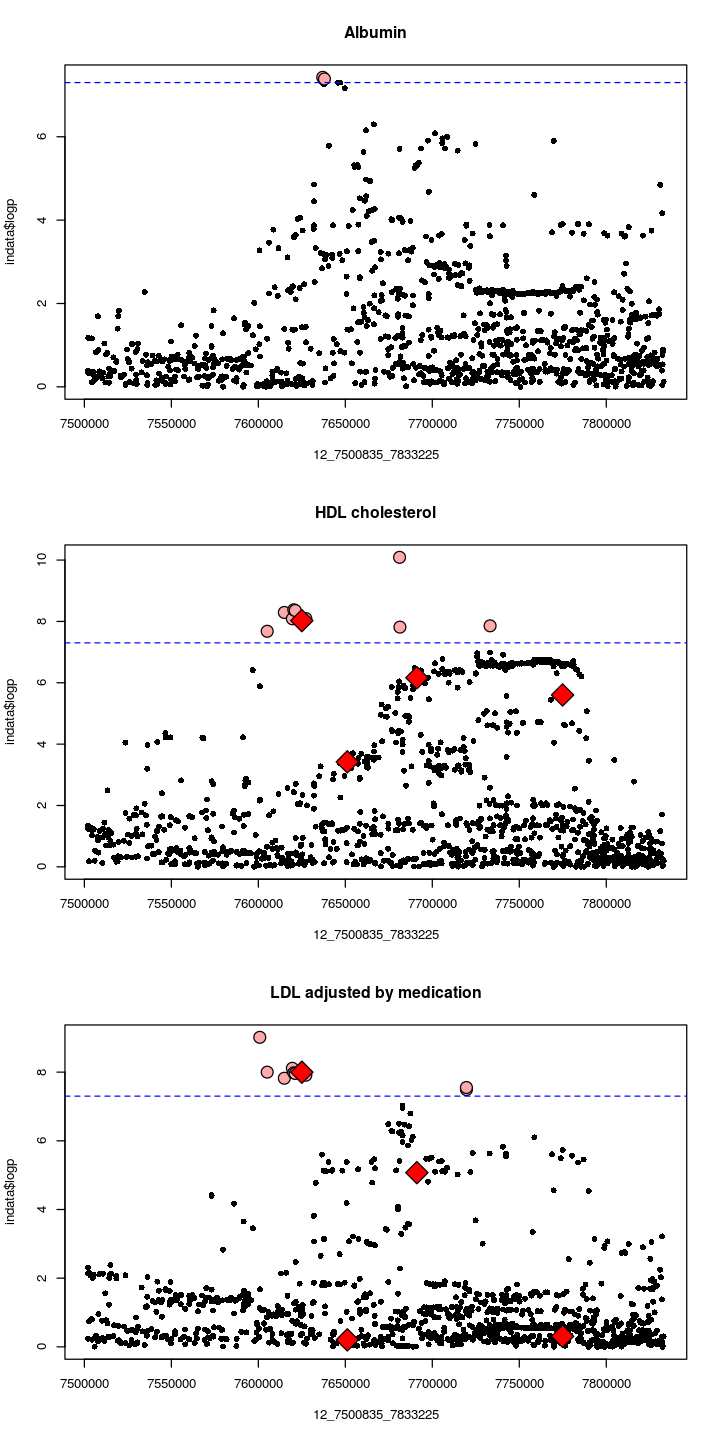

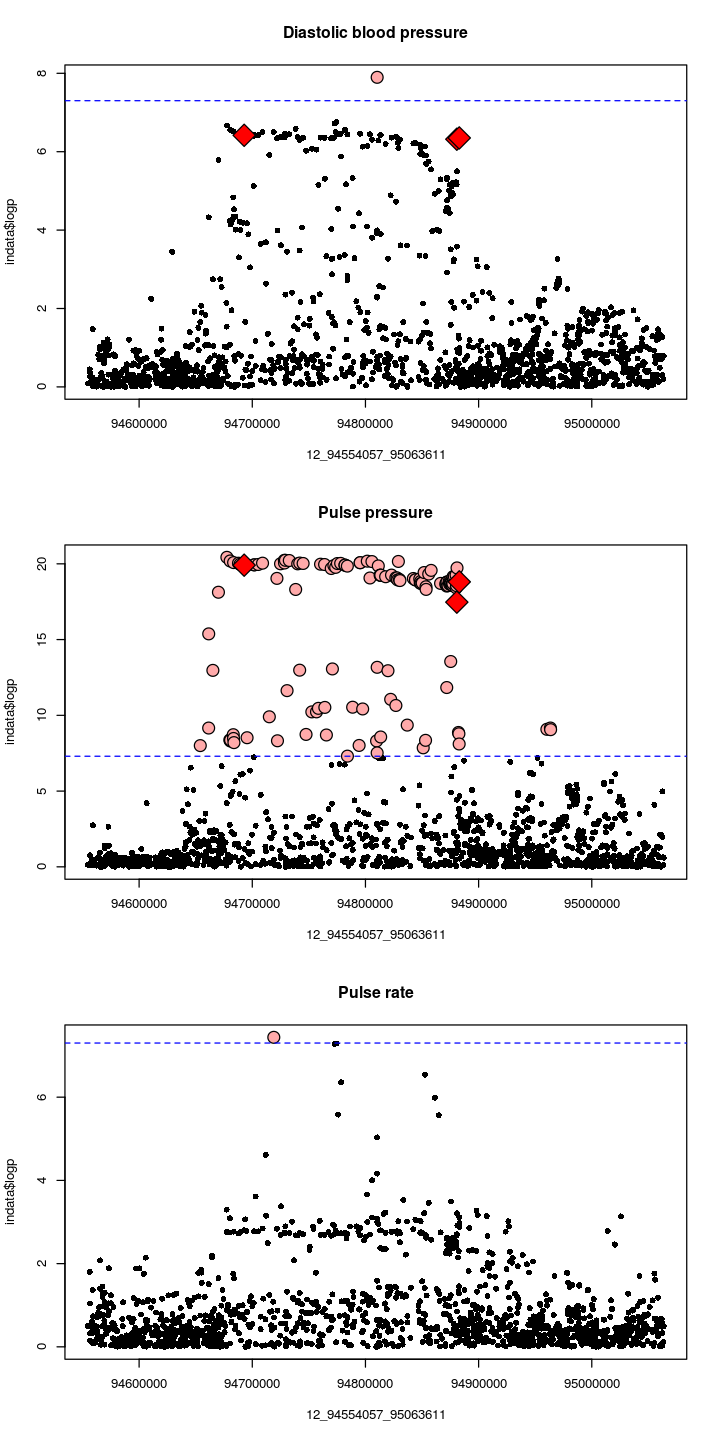

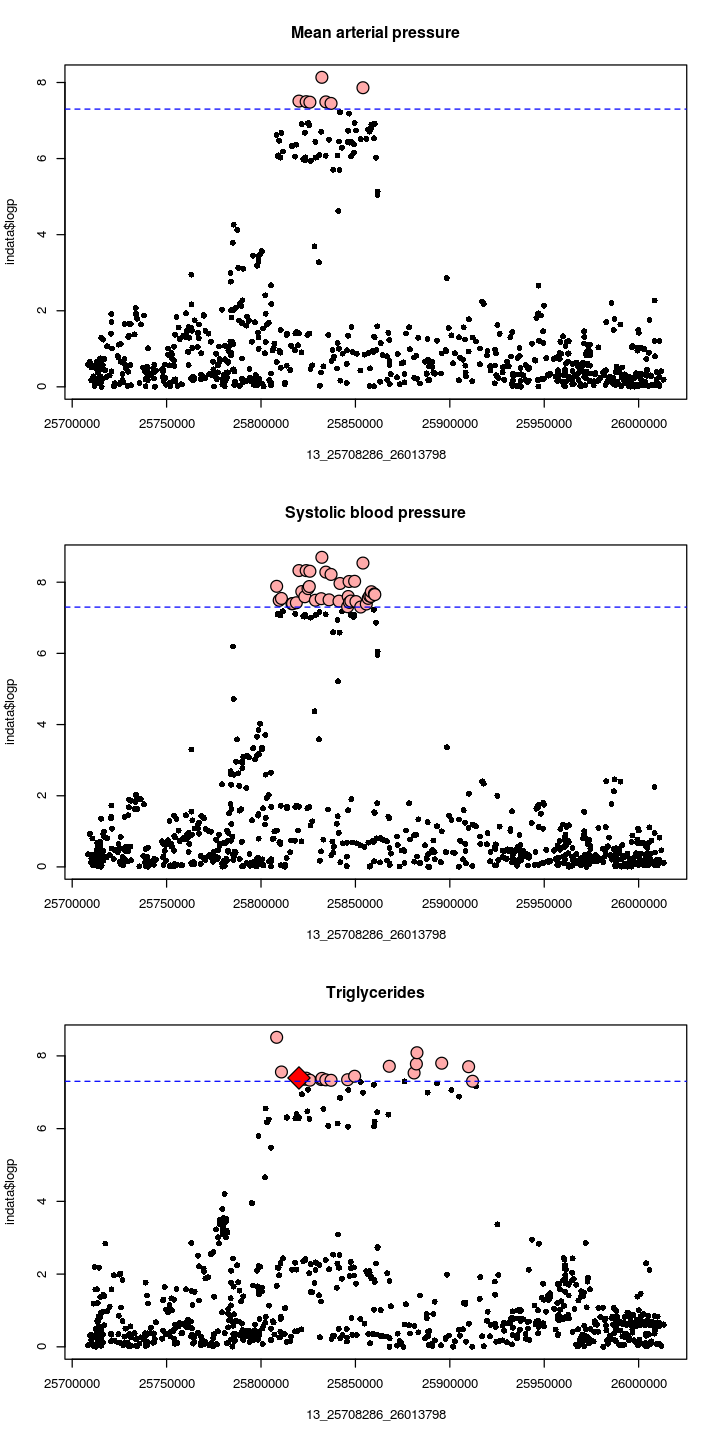

In [51]:
x = invisible(lapply(head(locus2n[ locus2n$n == 3 & locus2n$same > 0 & locus2n$different > 0, "locus"], n = 20), function(locus){find_example(locus)}))


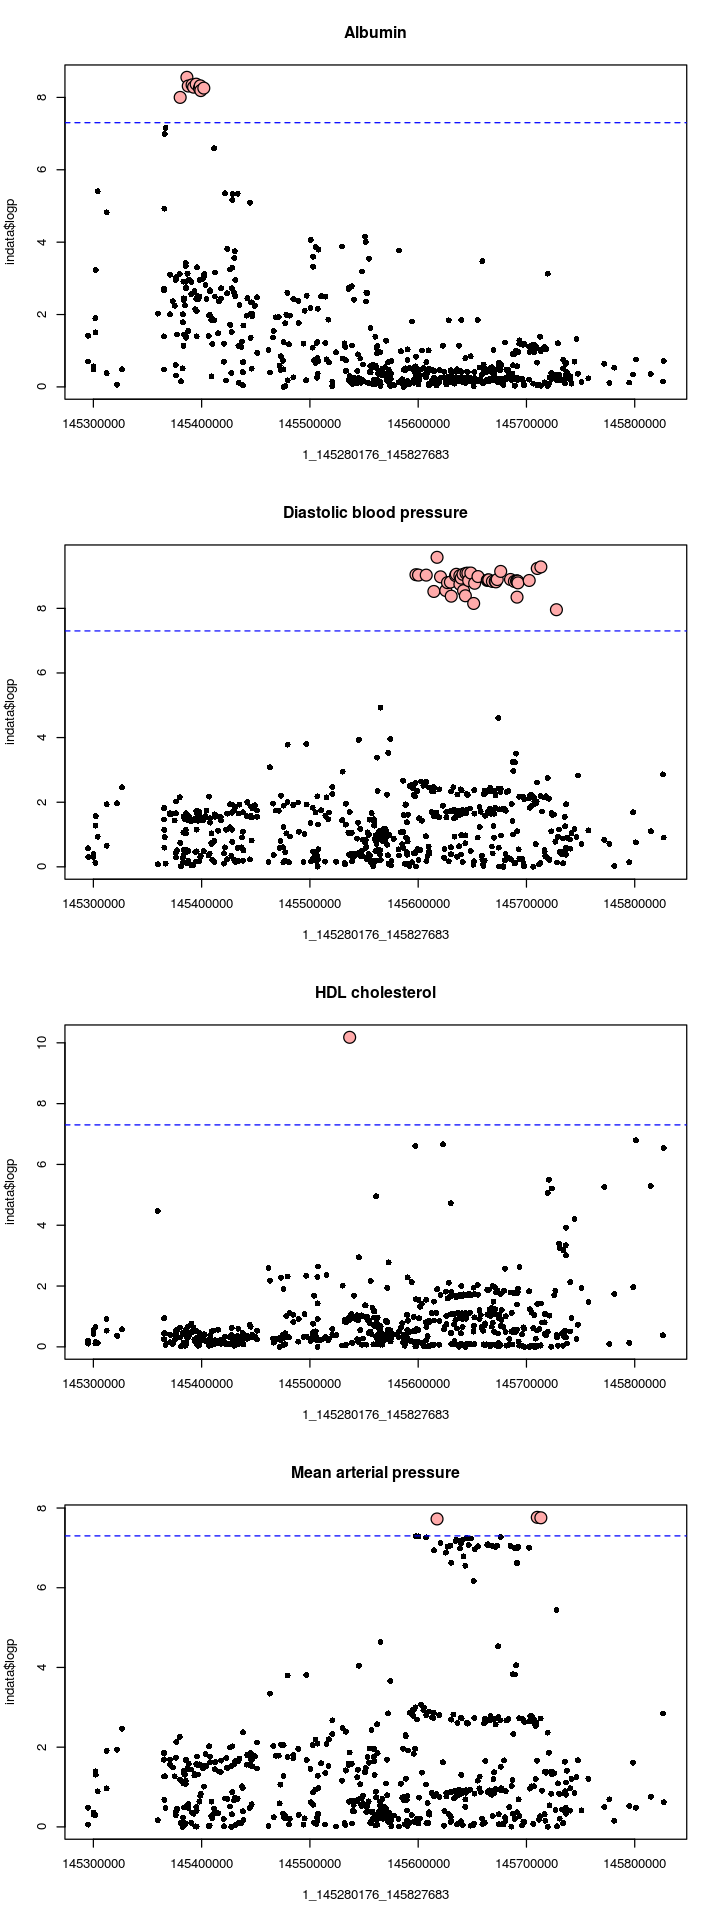

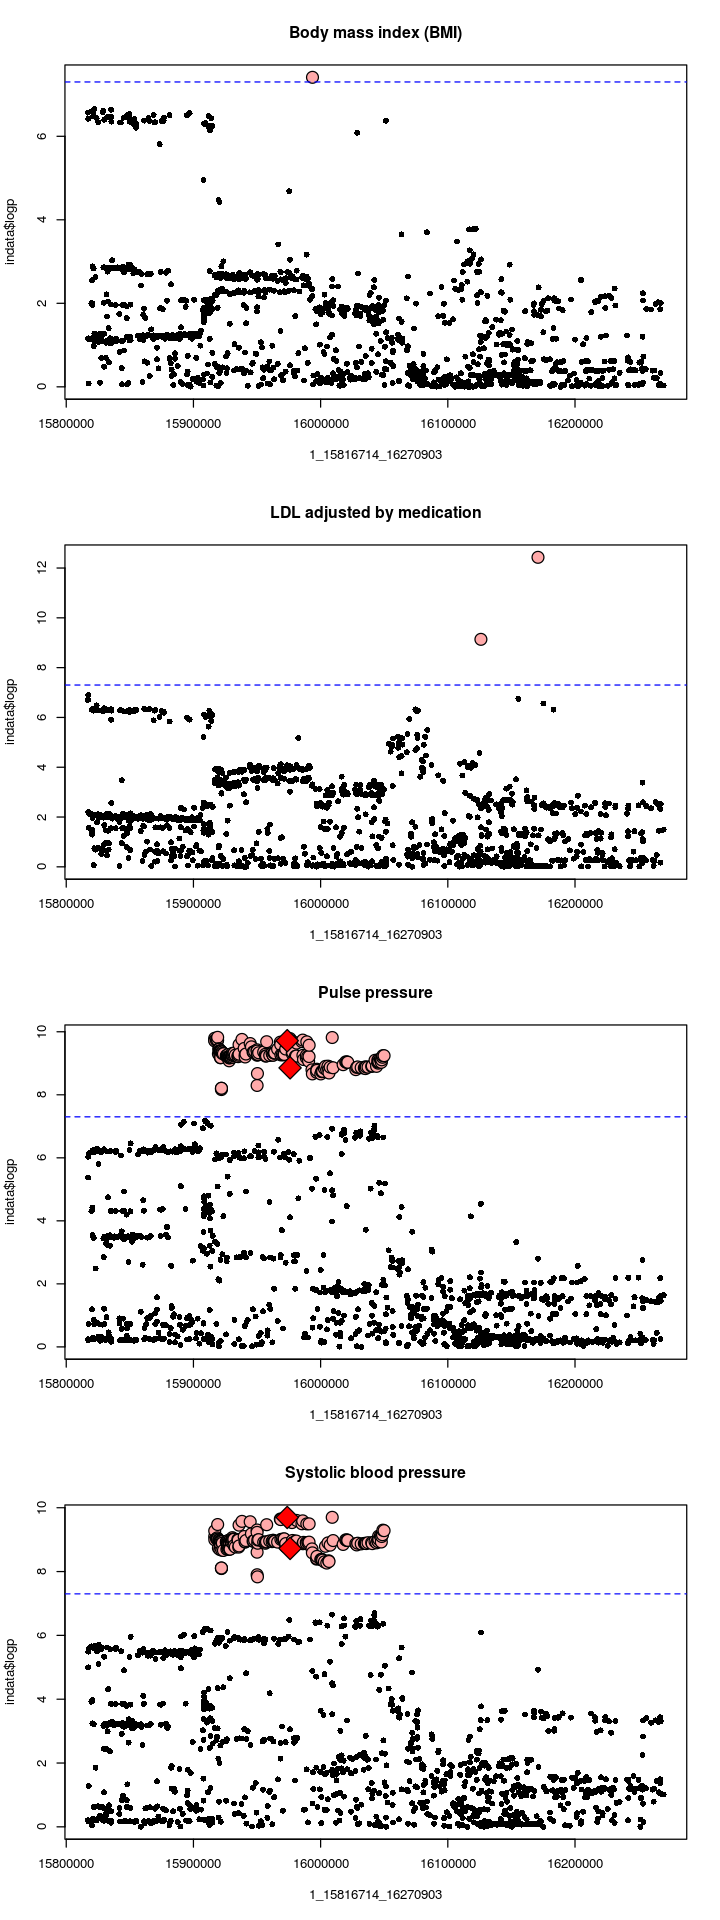

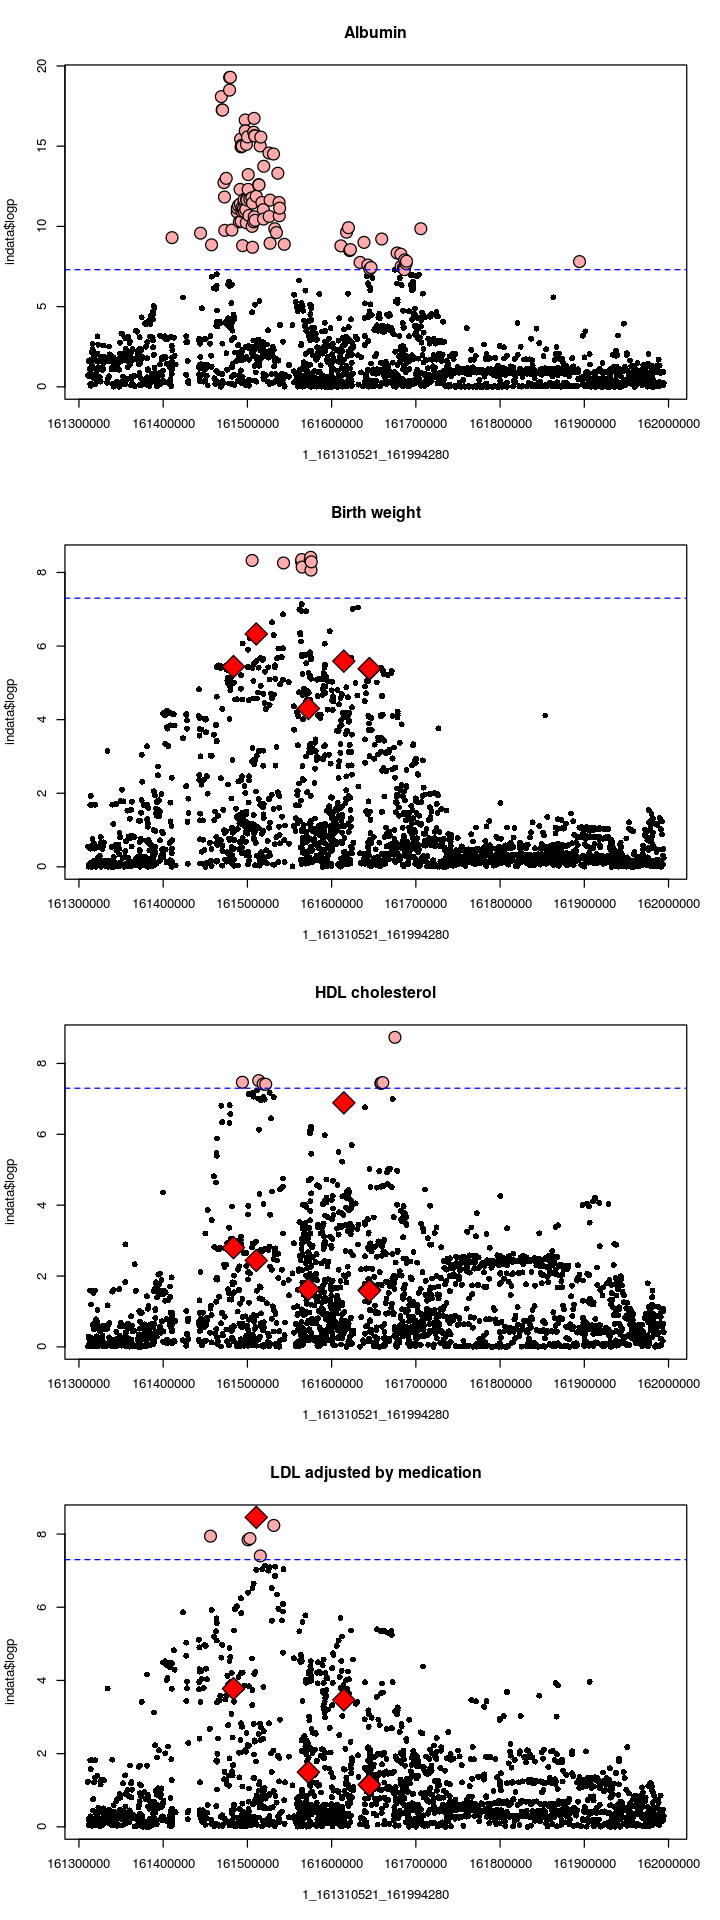

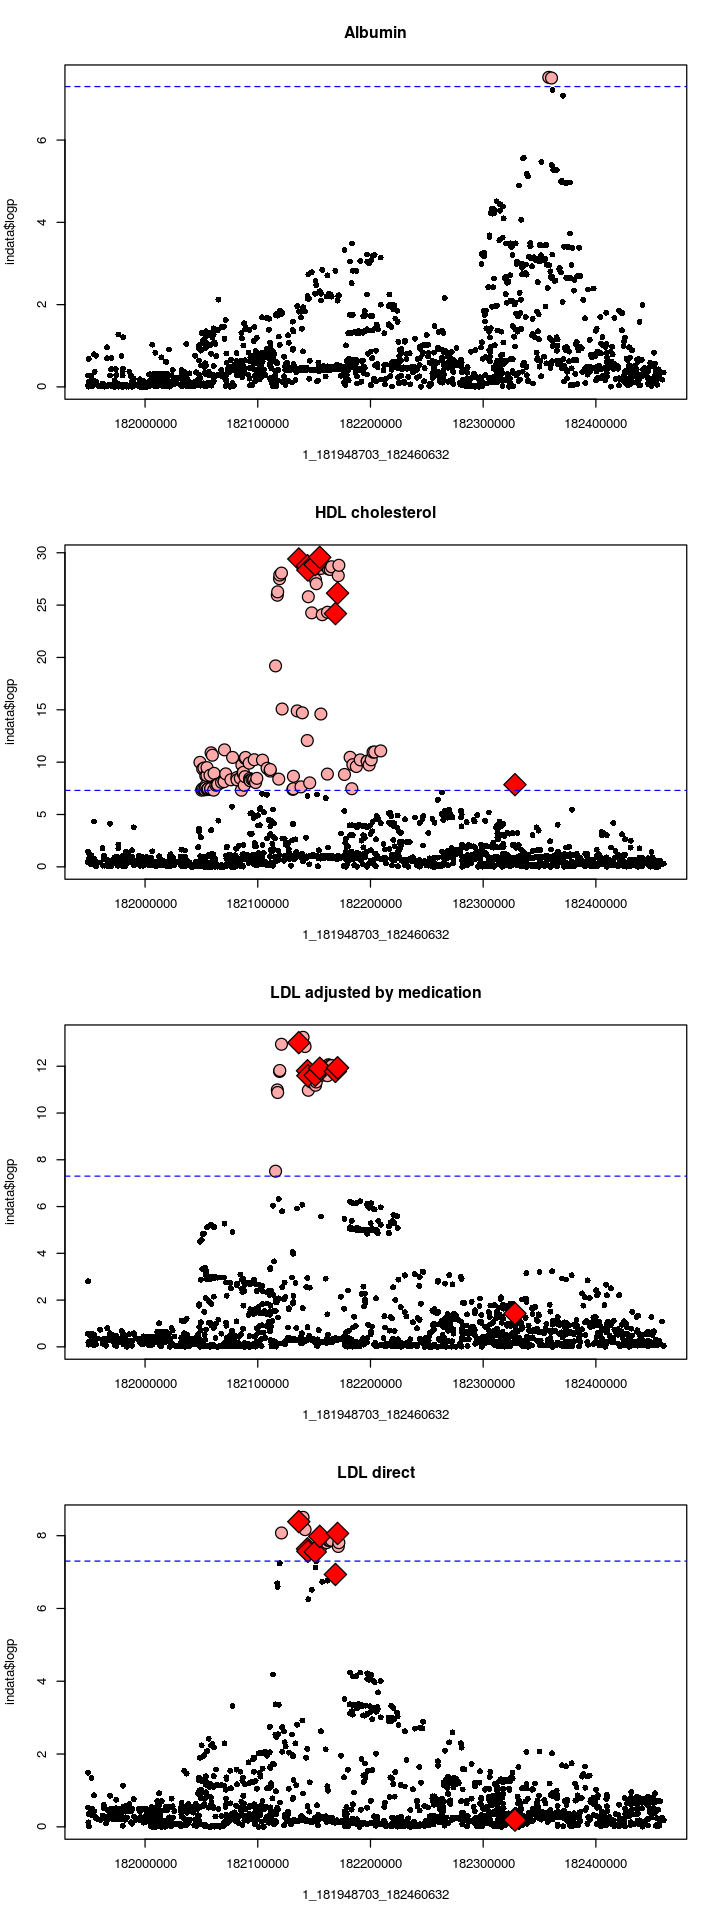

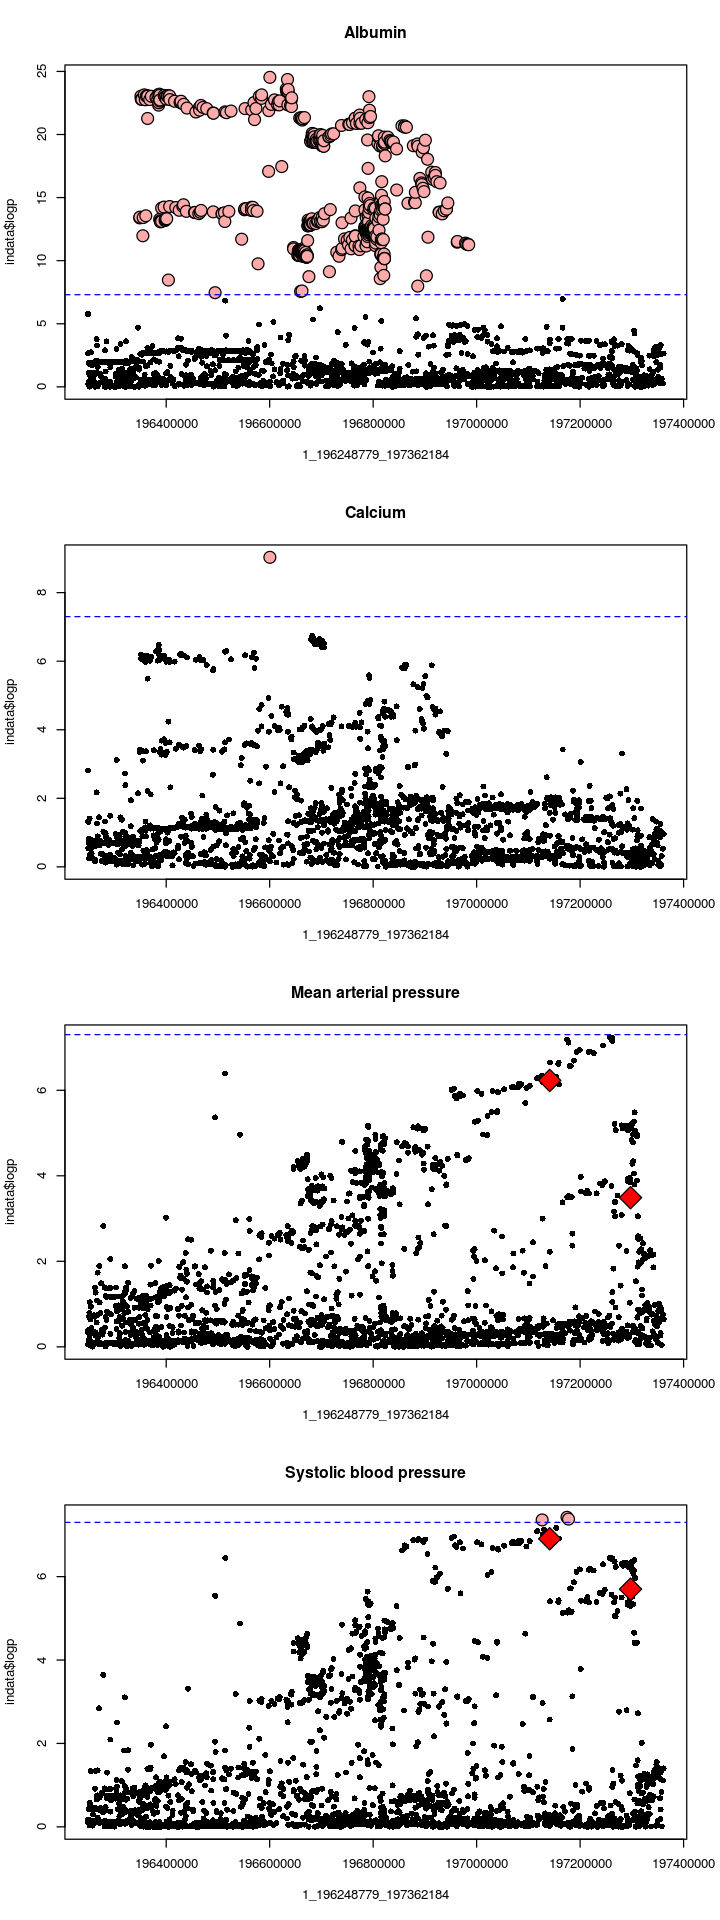

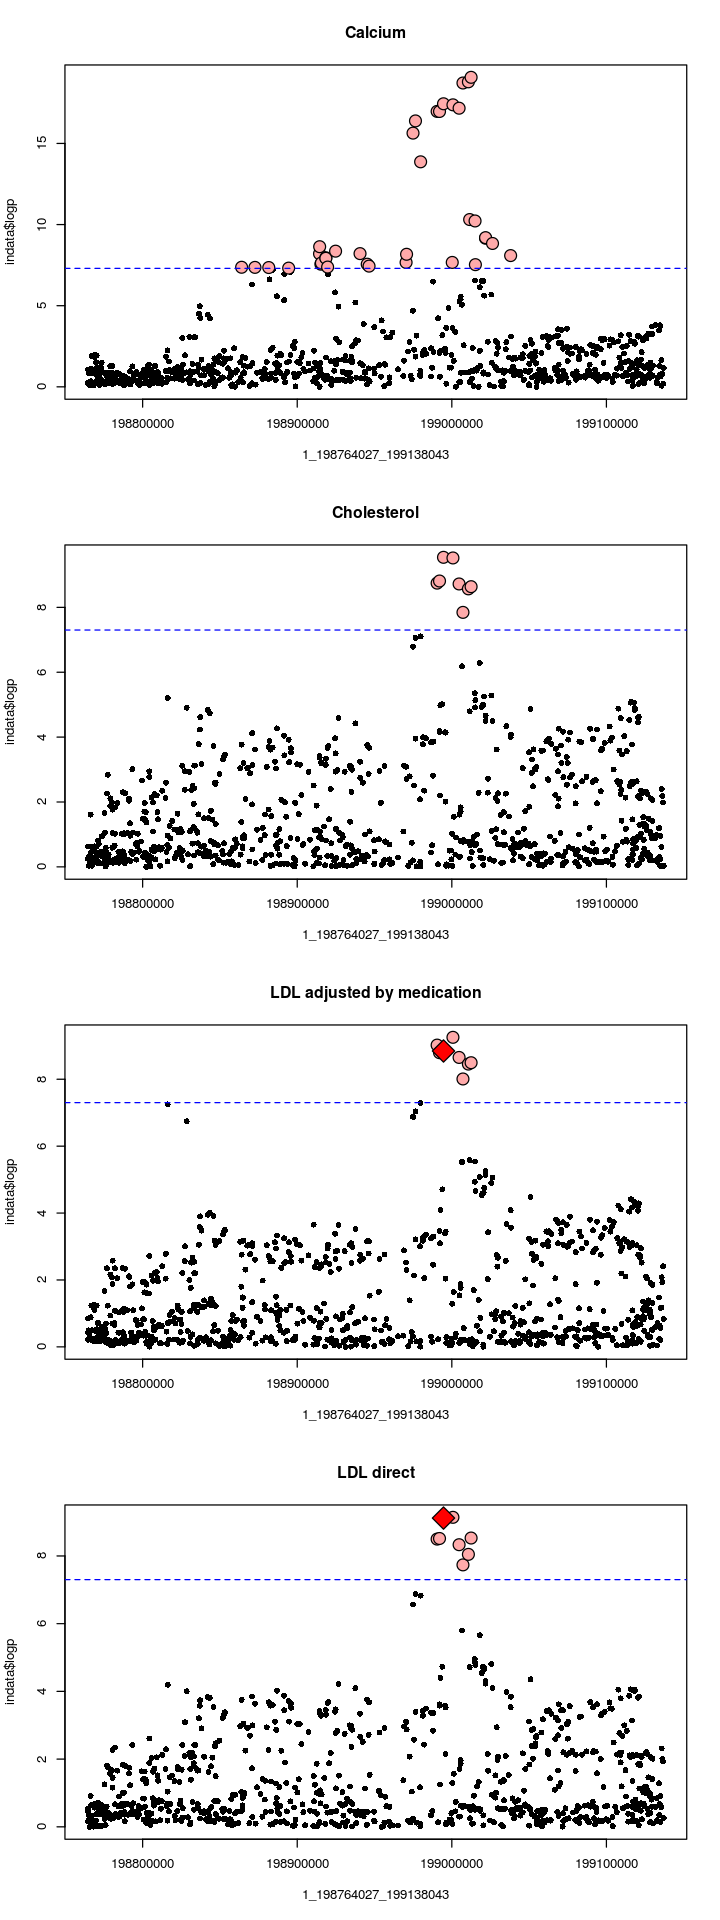

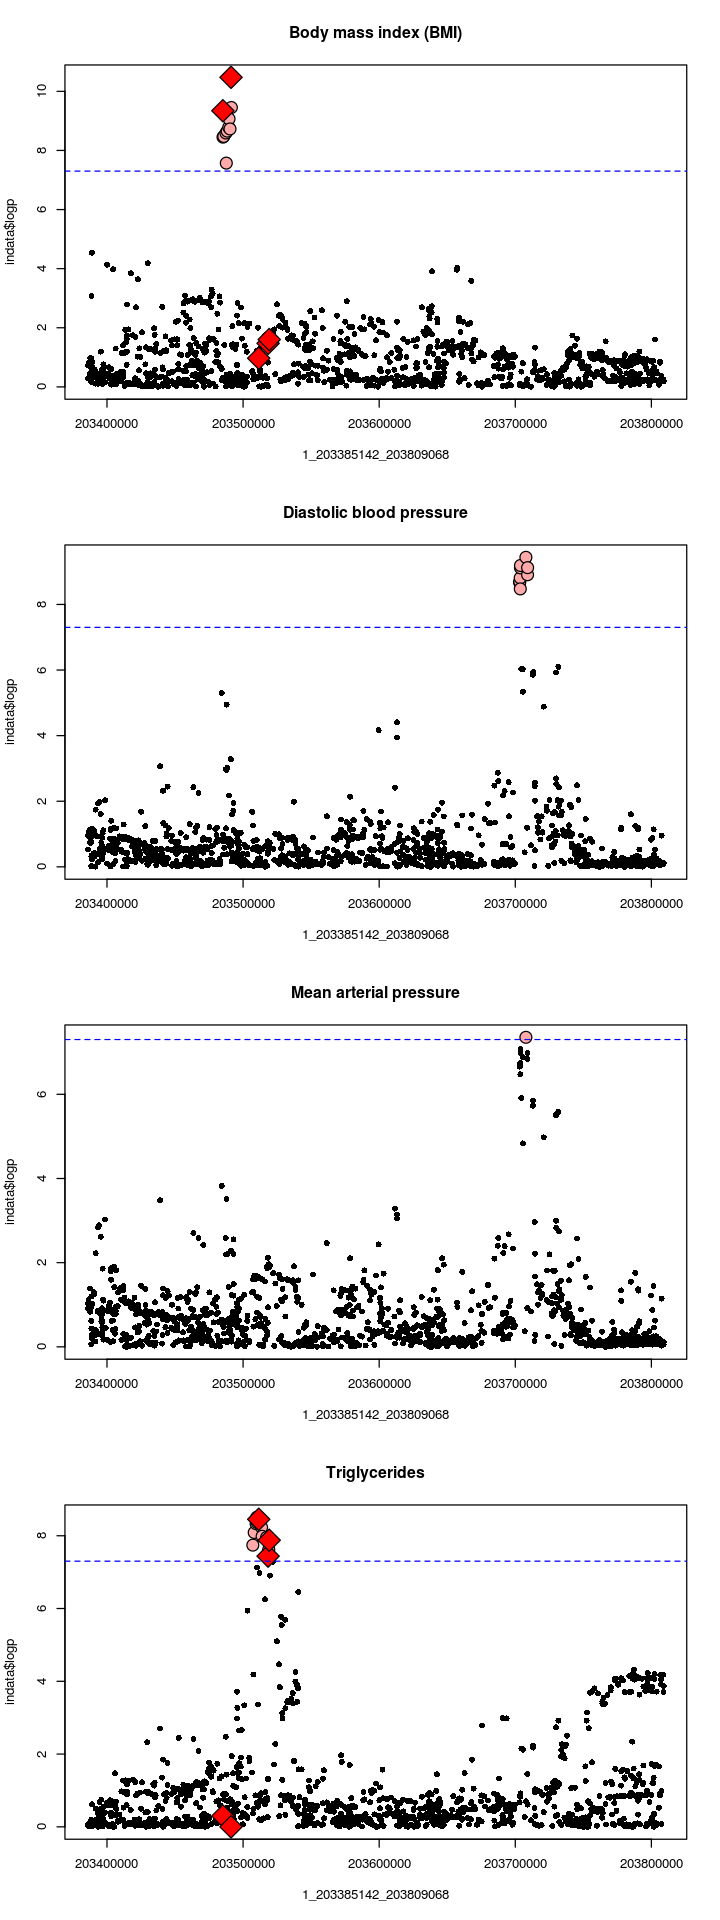

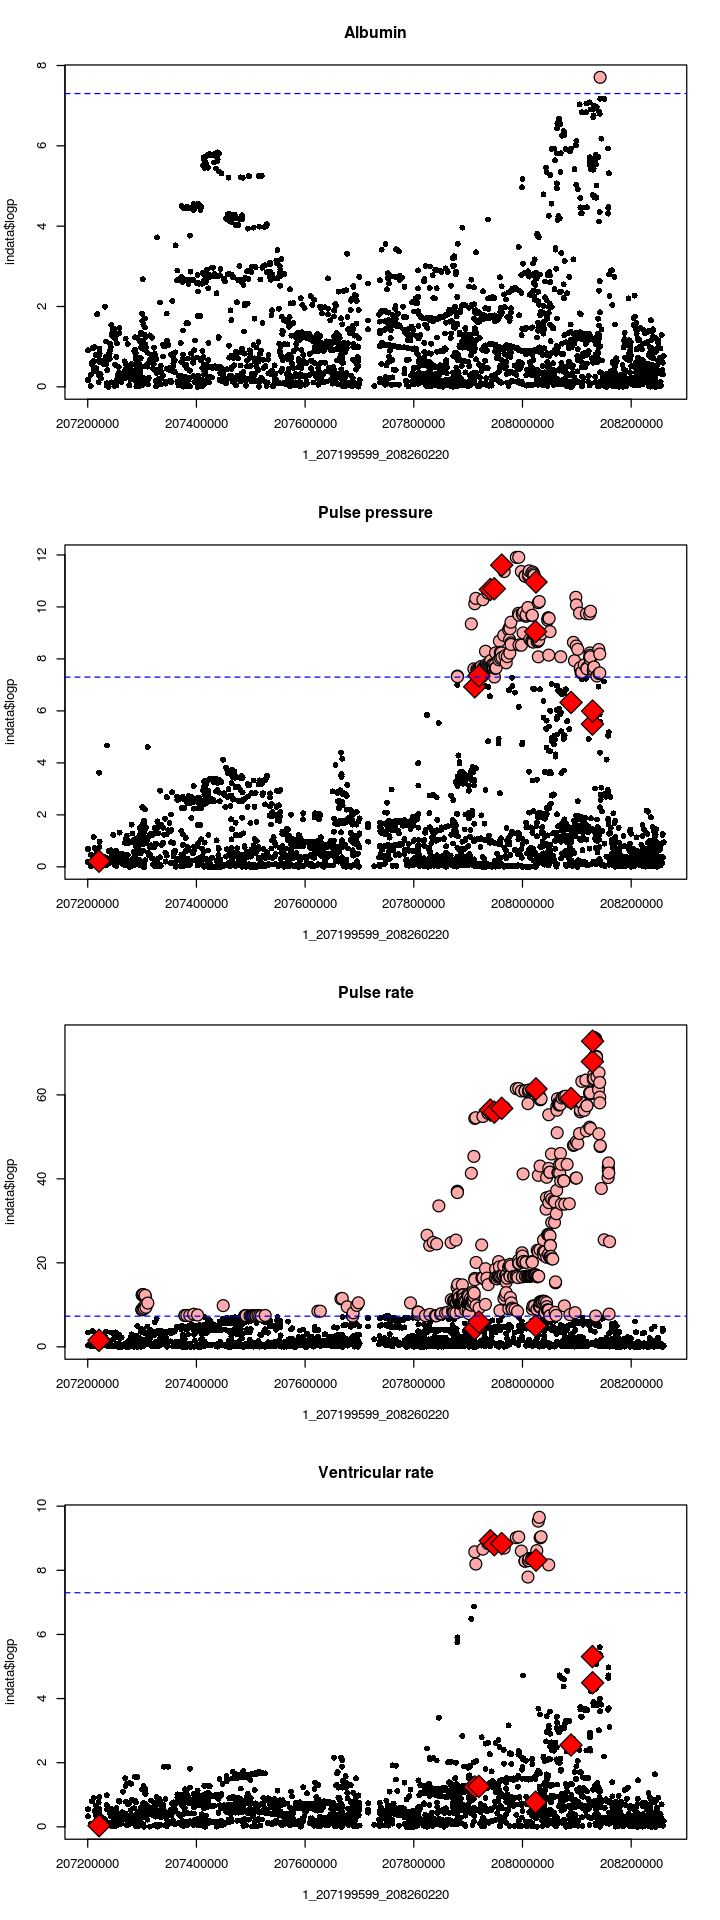

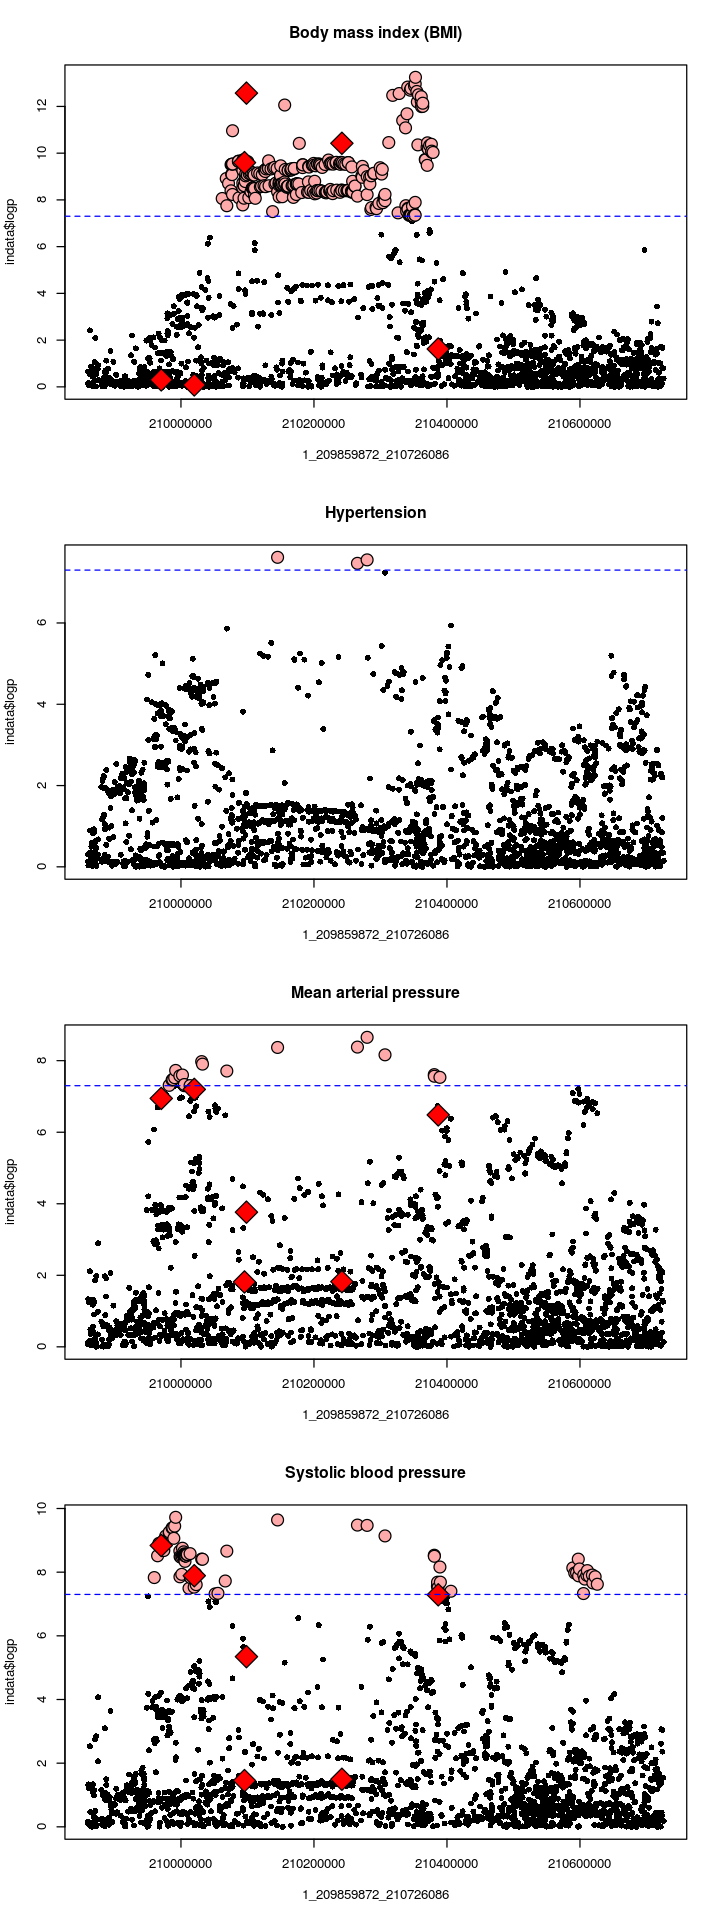

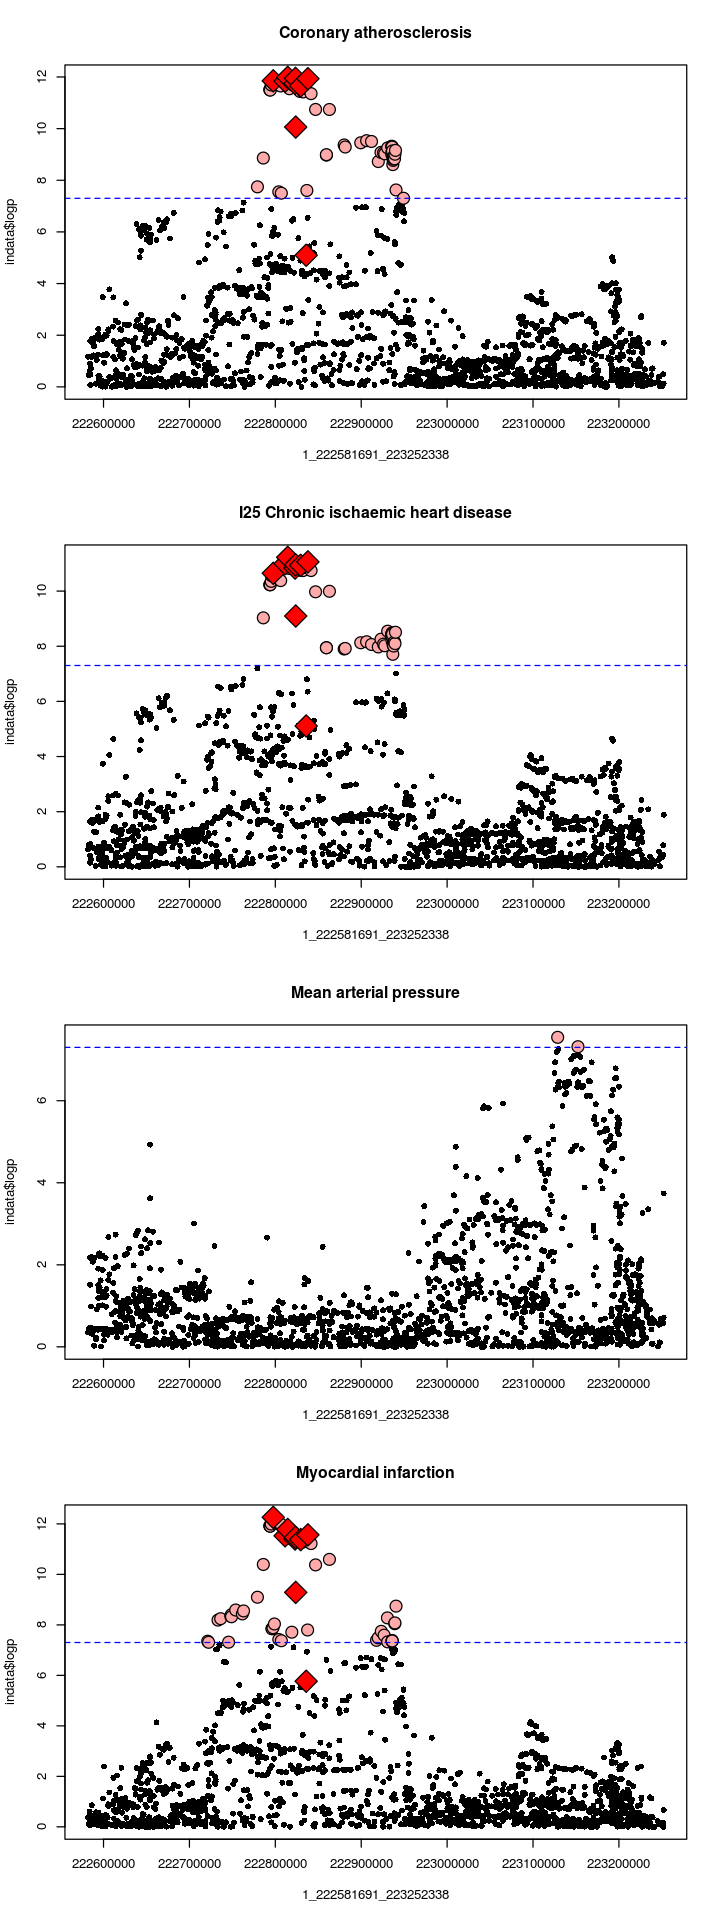

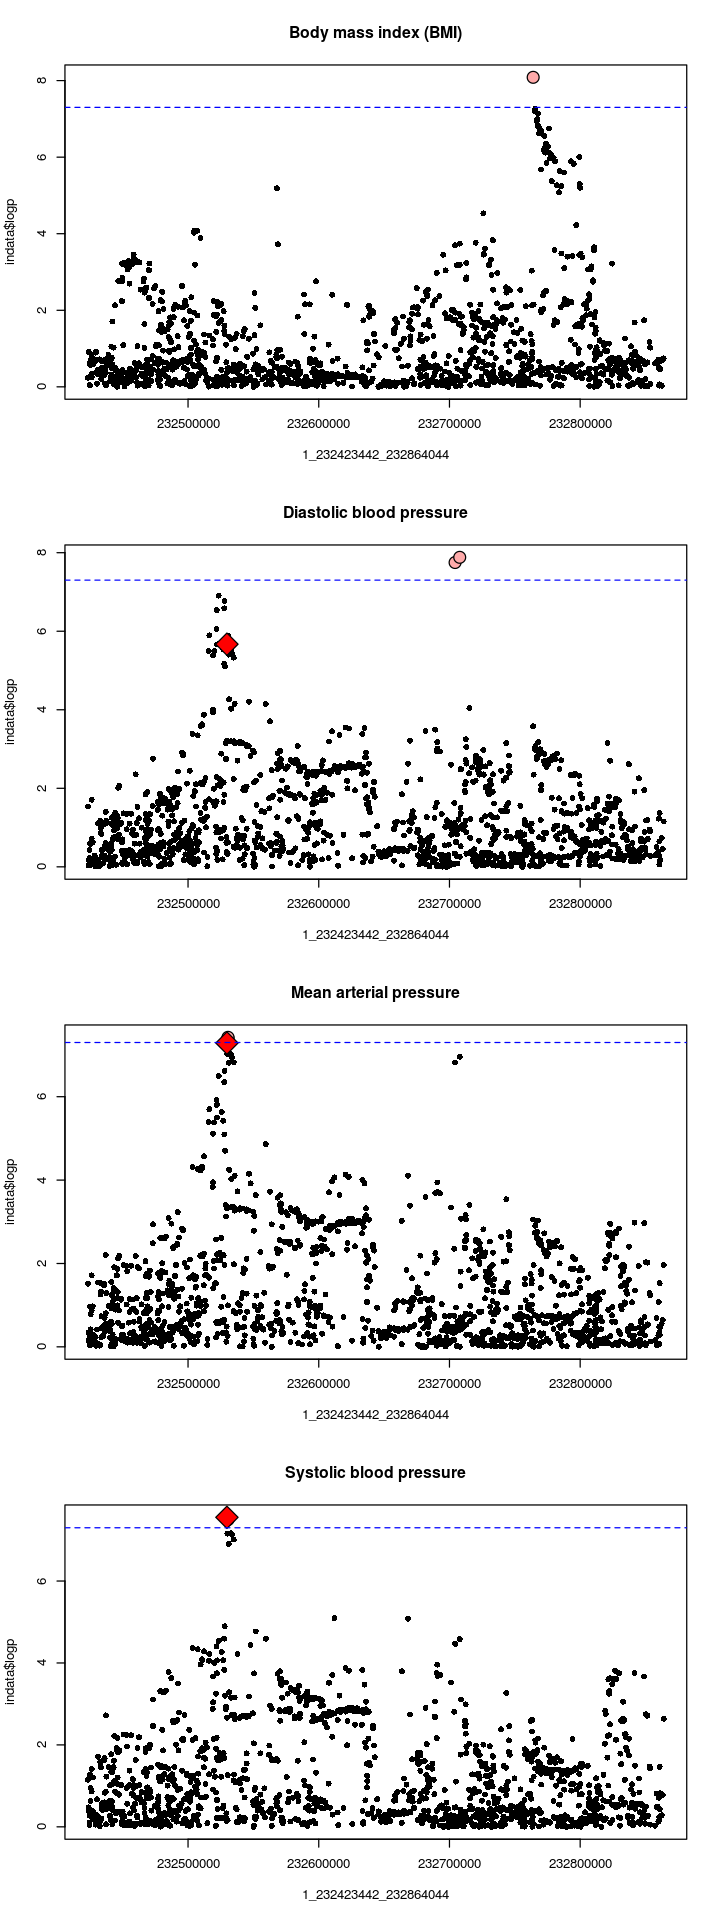

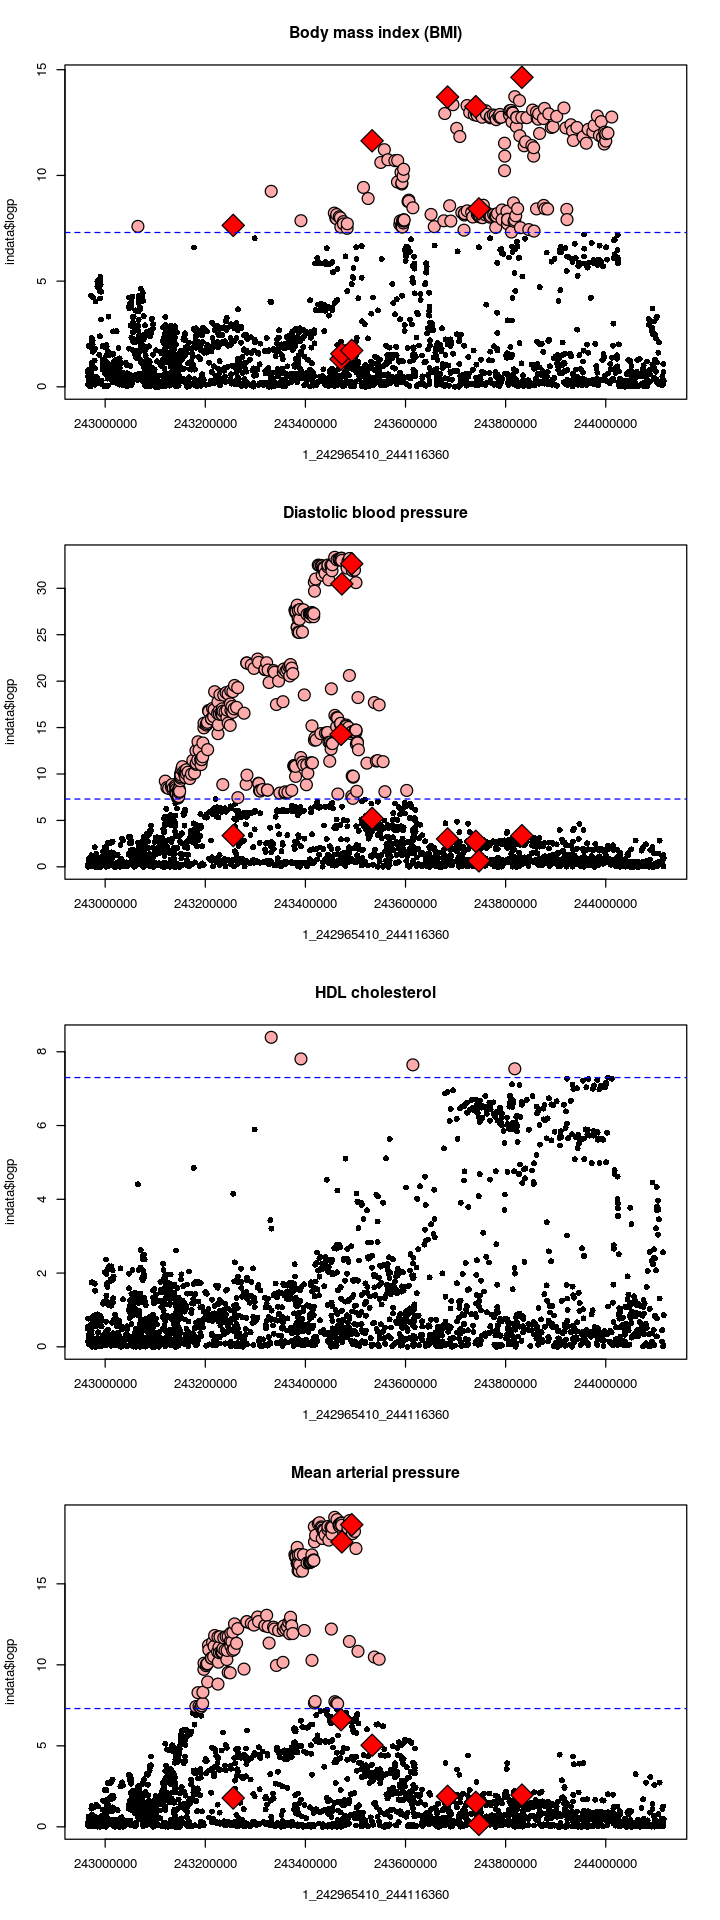

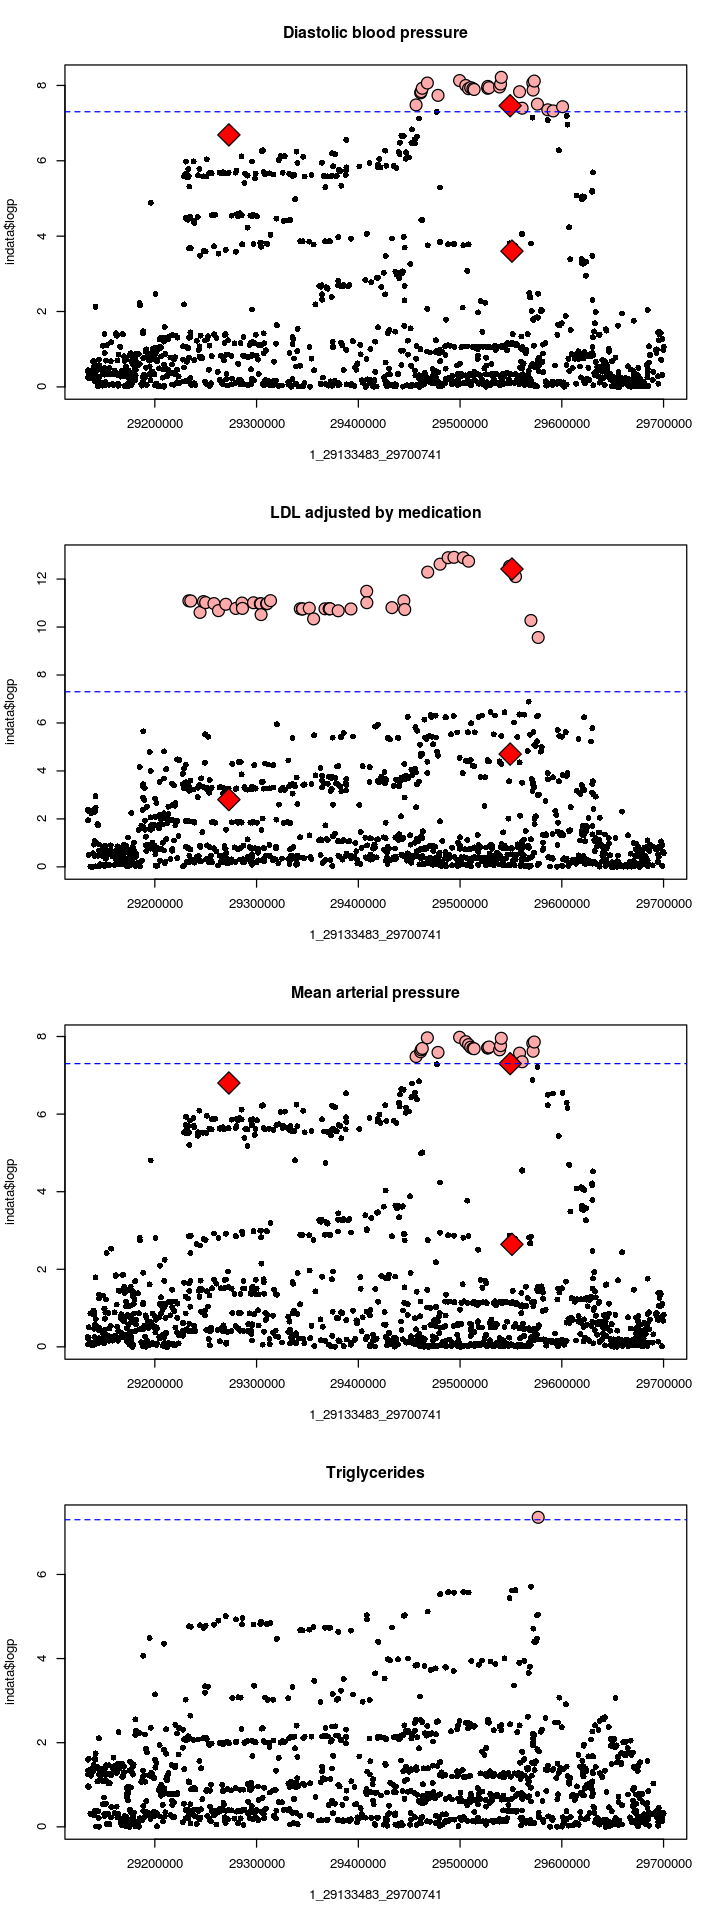

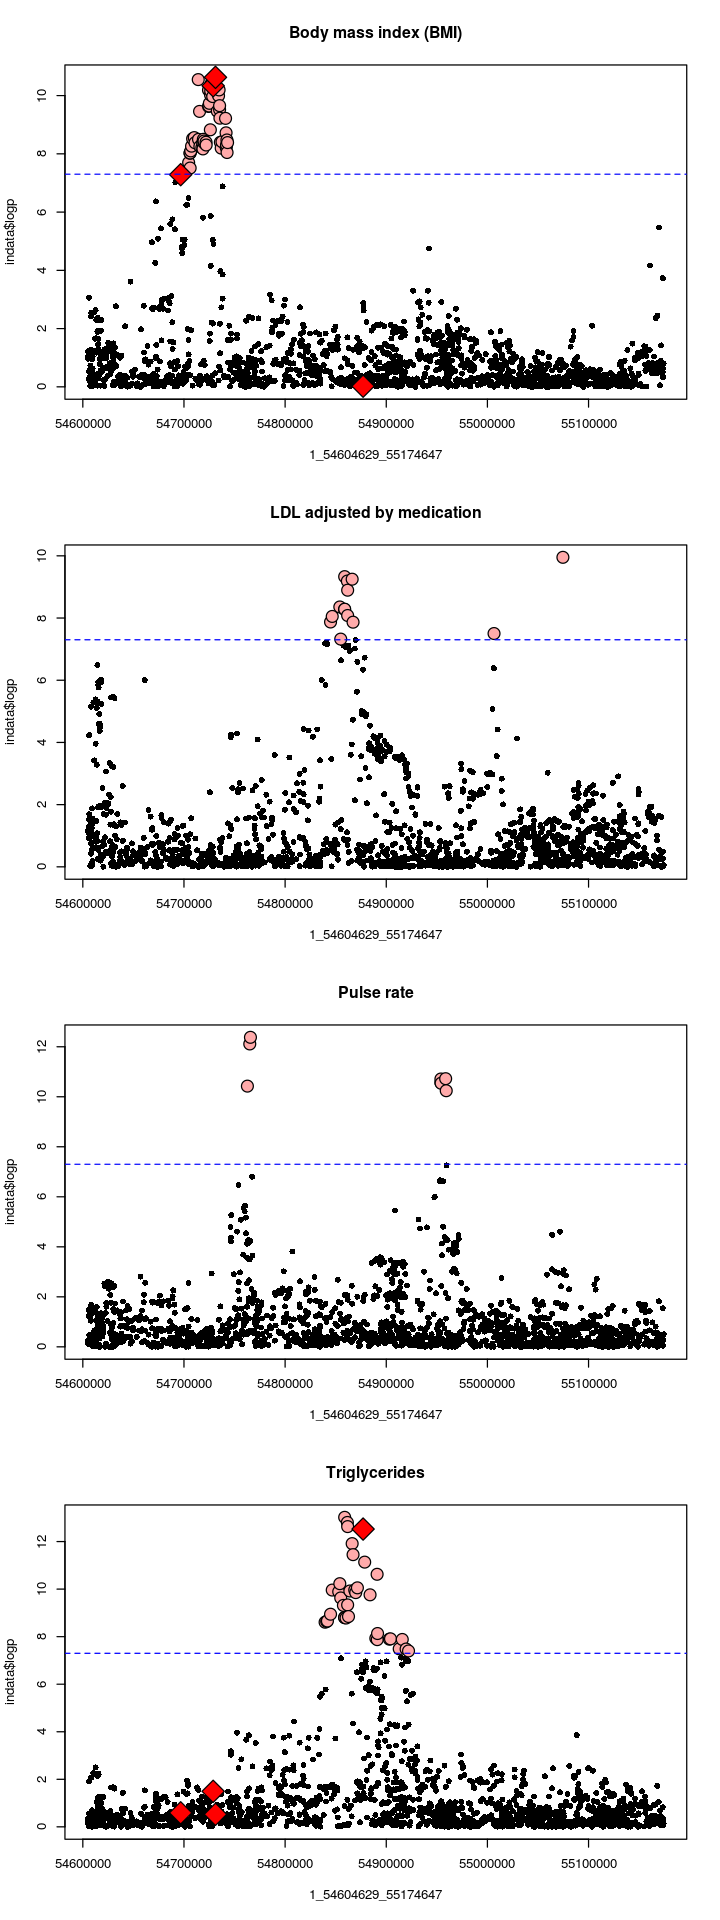

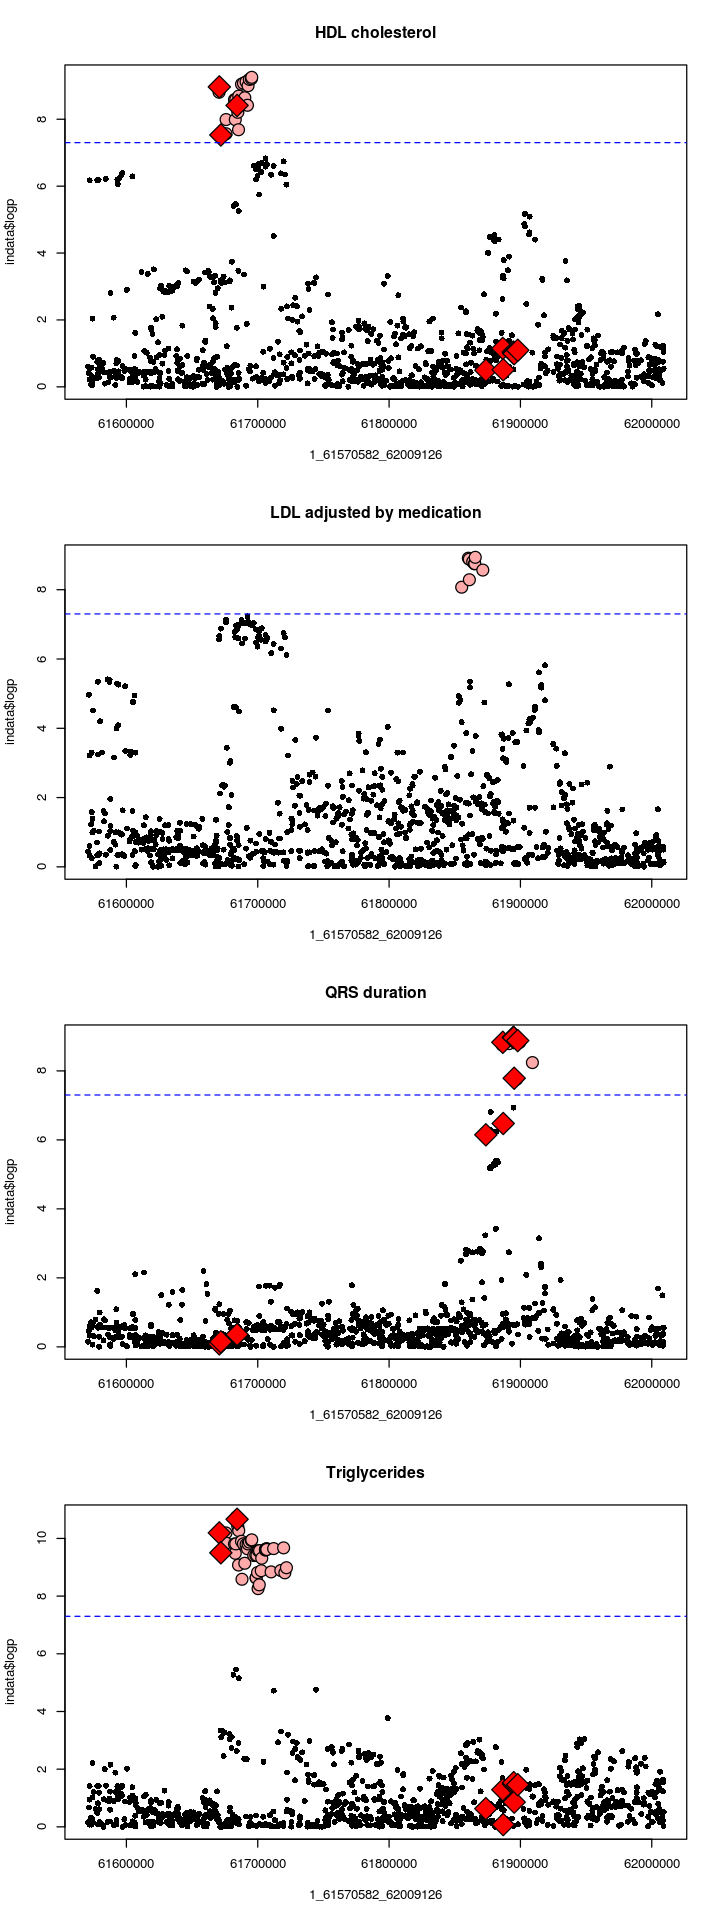

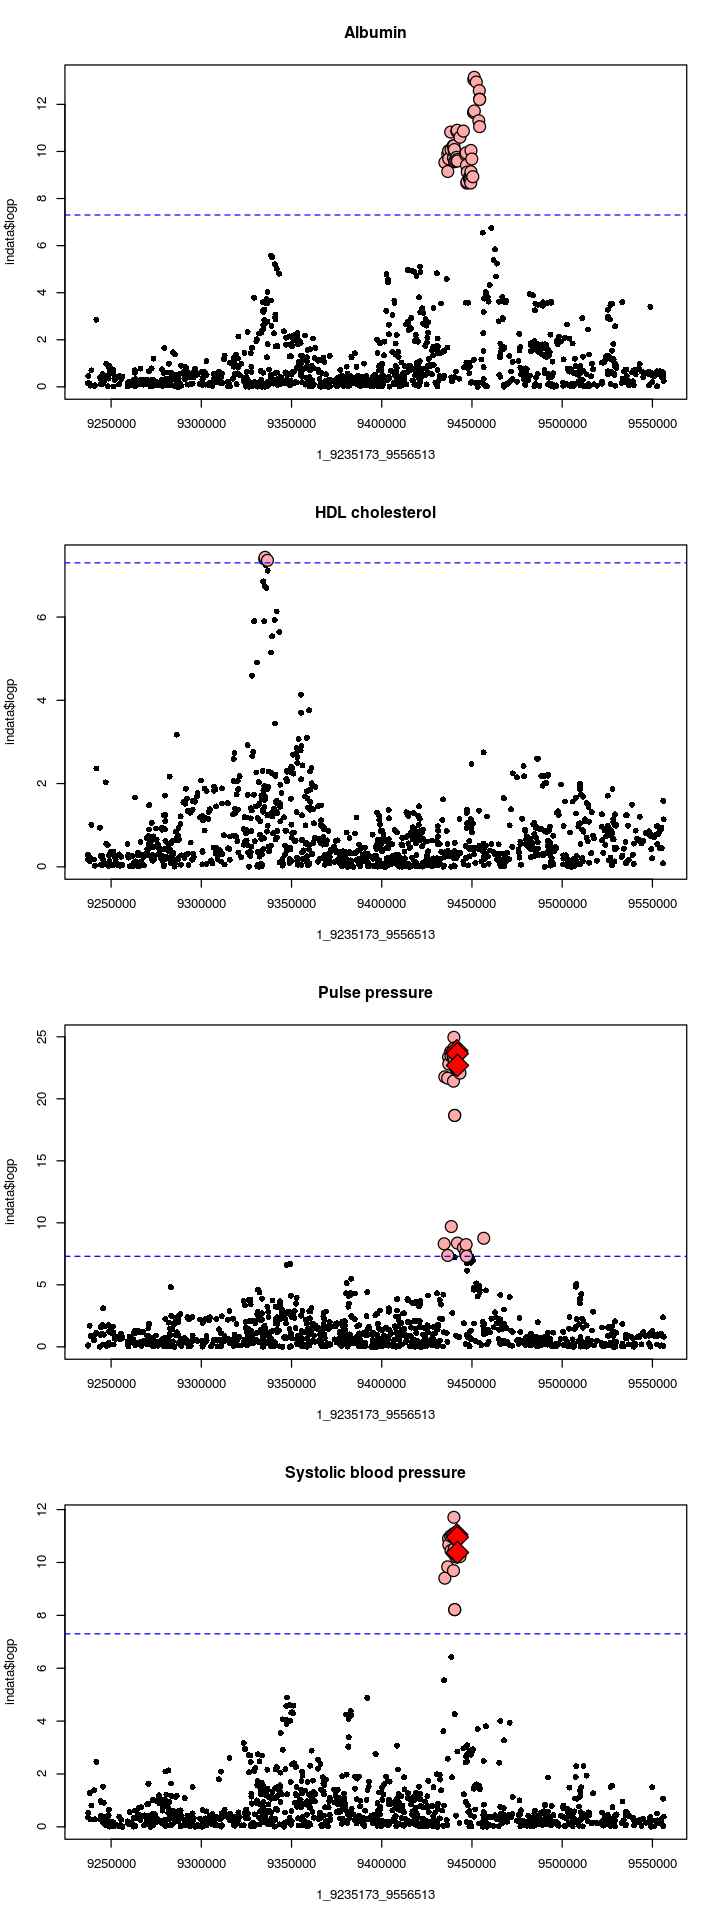

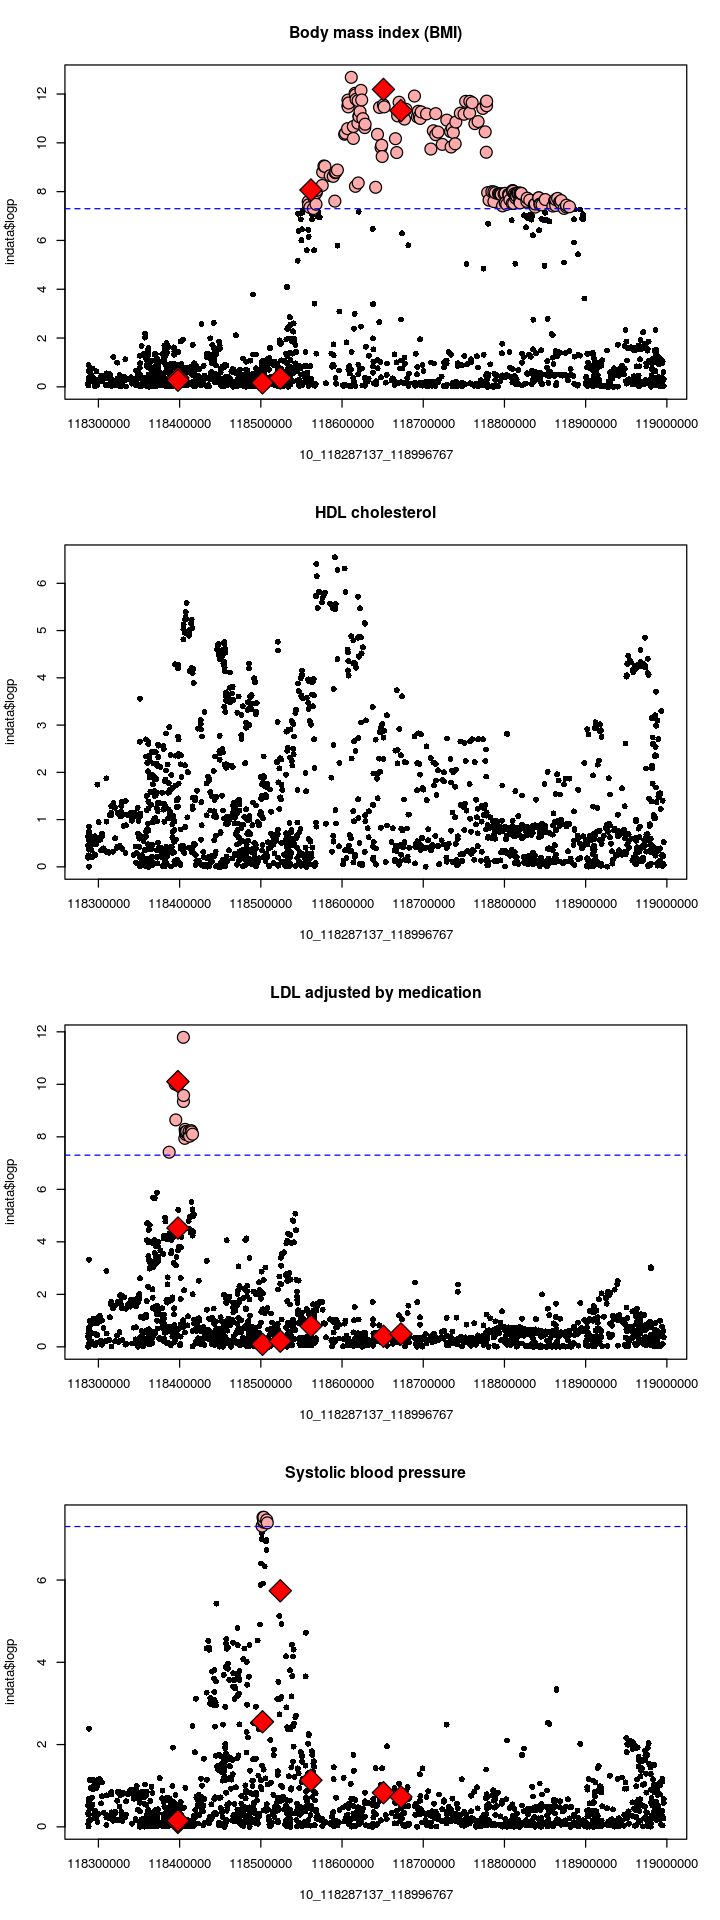

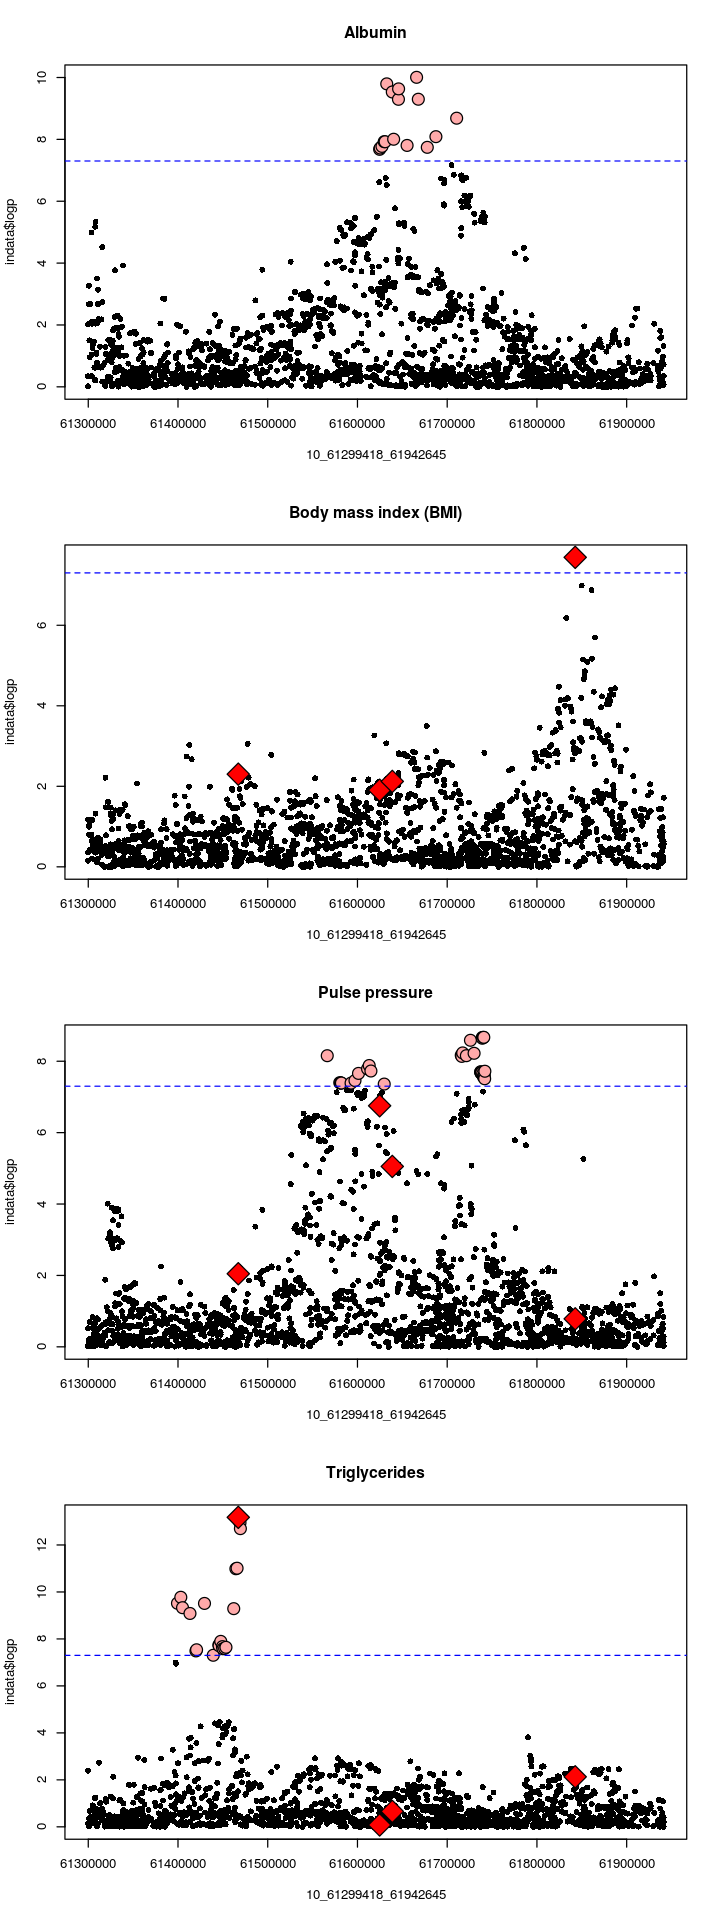

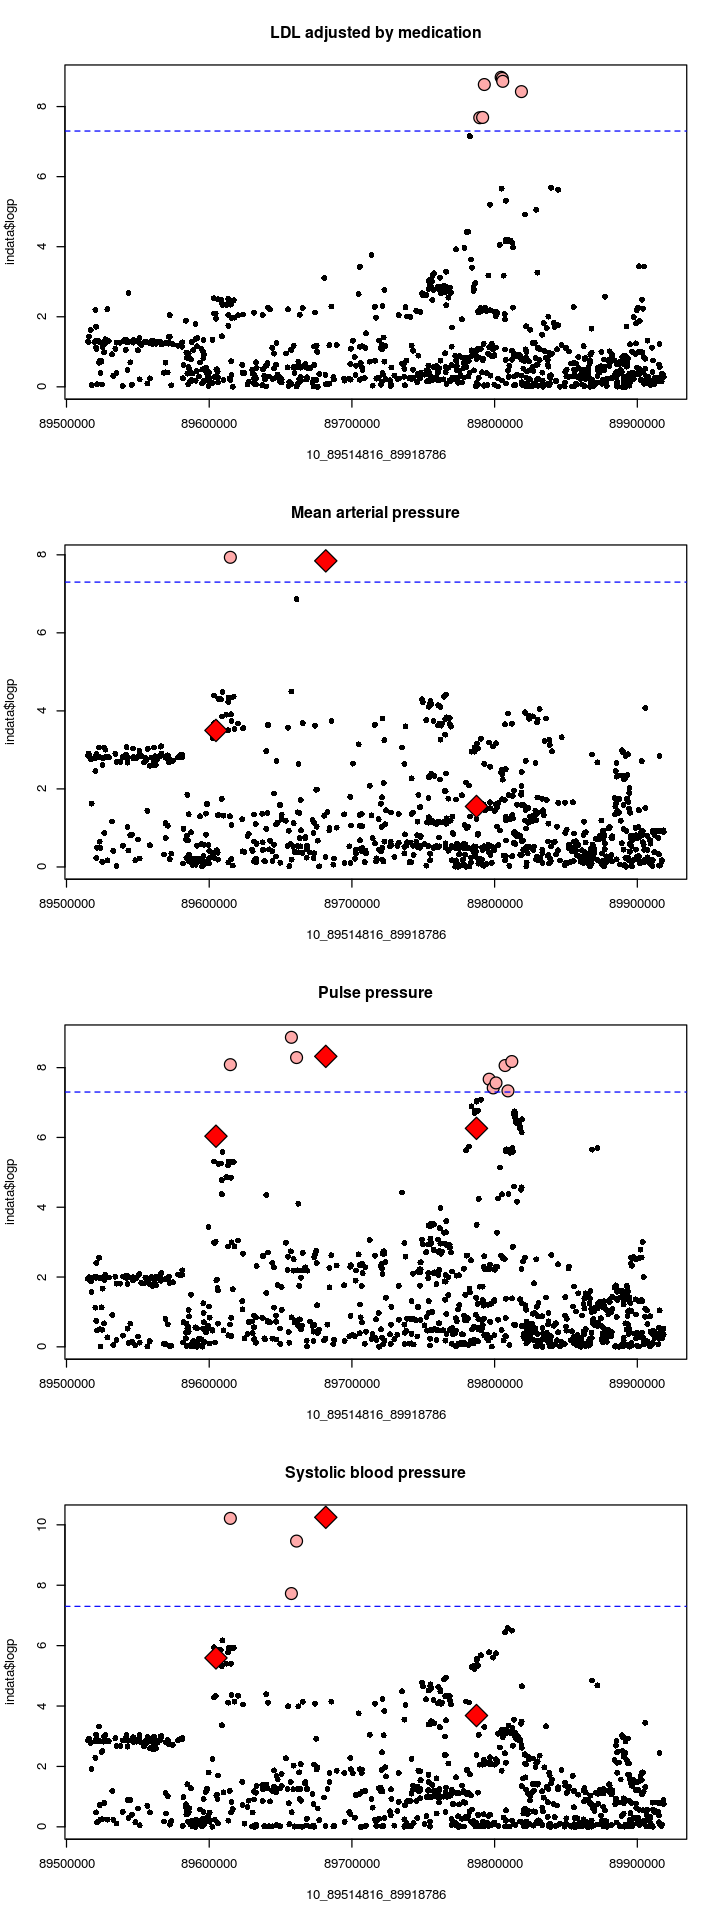

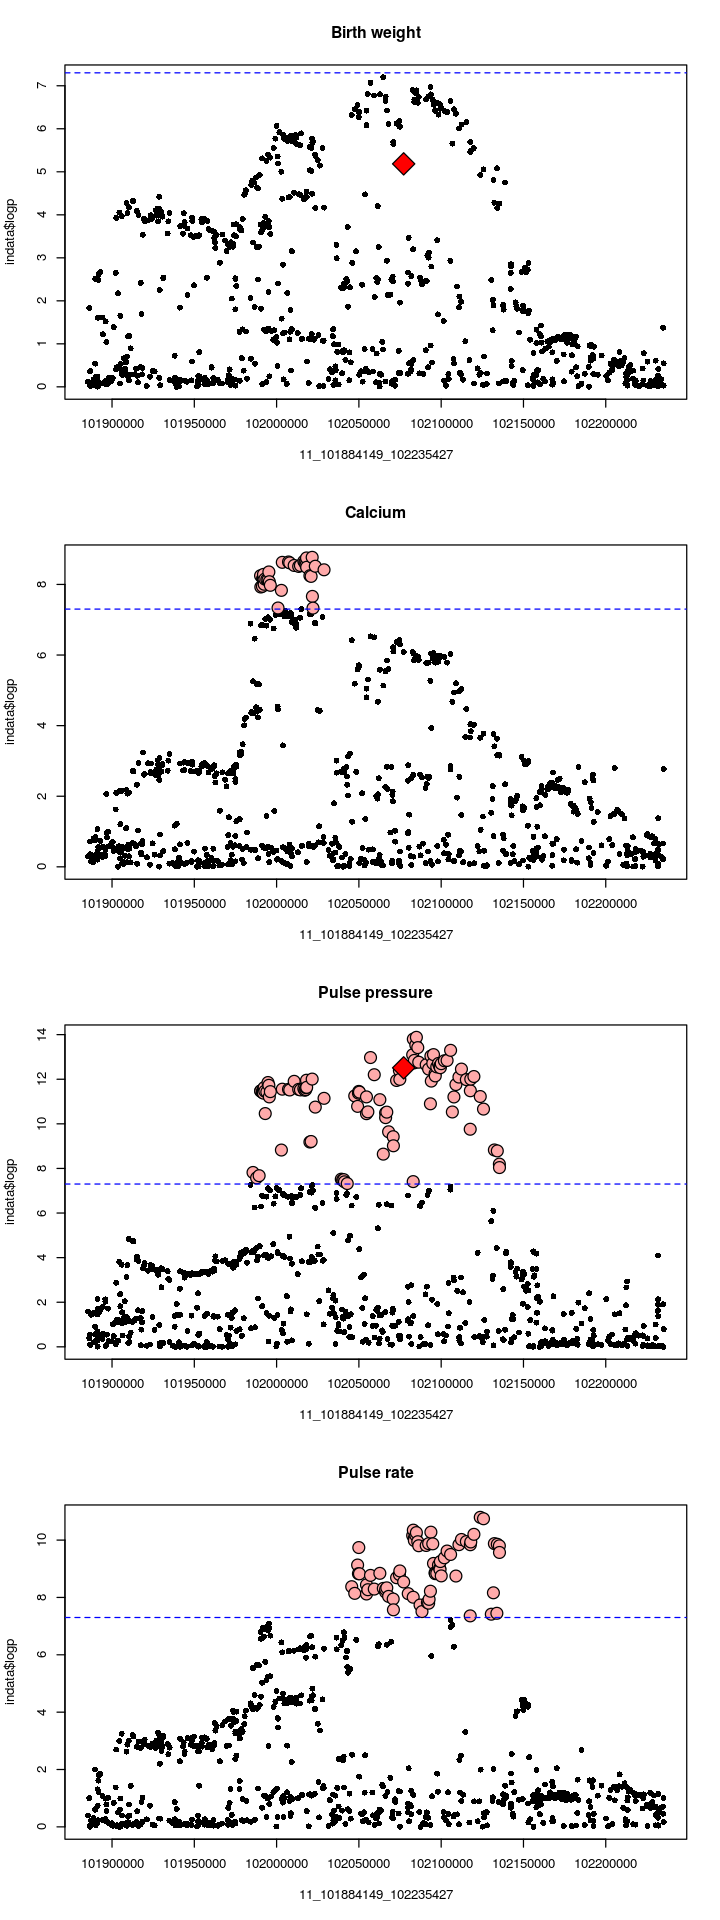

In [52]:
x = invisible(lapply(head(locus2n[ locus2n$n == 4 & locus2n$same > 0 & locus2n$different > 0, "locus"], n = 20), function(locus){find_example(locus)}))


# Good examples
- 1_10970919_11460957
- 1_204923764_205361963
- 1_205553056_205905745
- 1_59478357_59987078
- 10_80723982_81269345
- 1_98133530_98662260
- 1_198764027_199138043
- 1_207199599_208260220
- 11_101884149_102235427

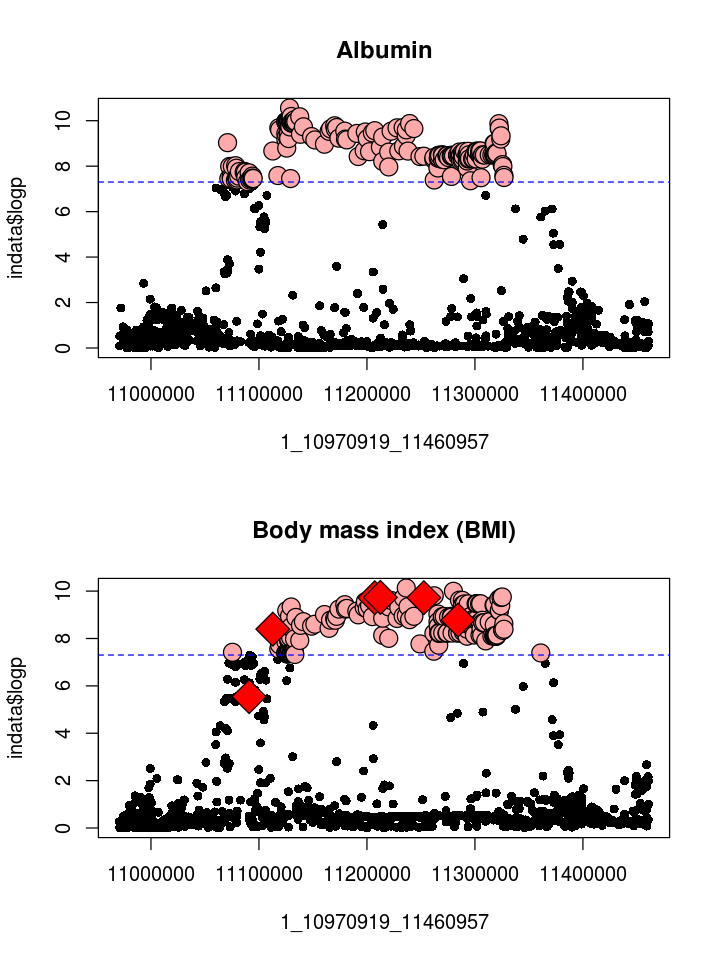

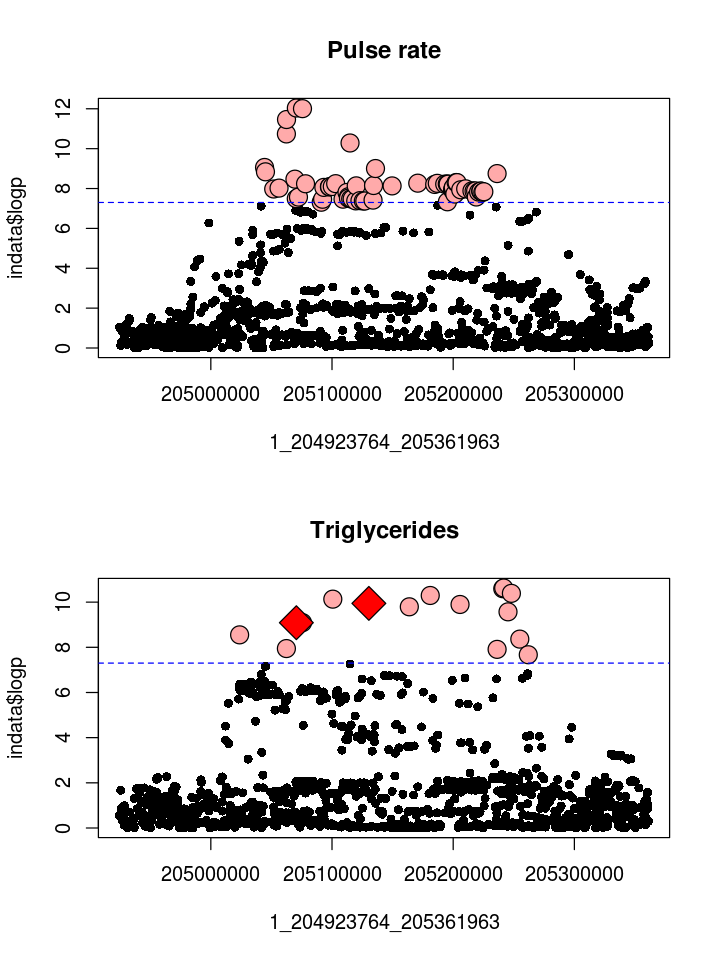

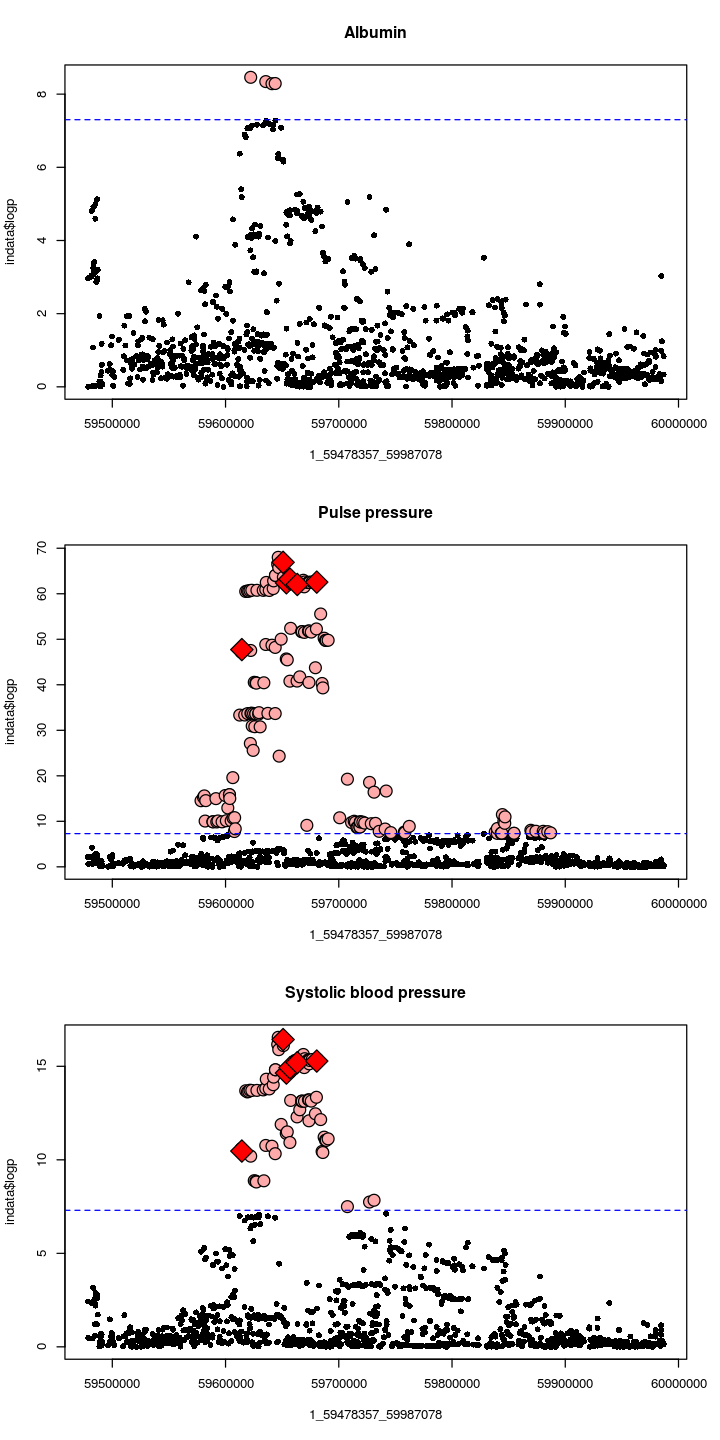

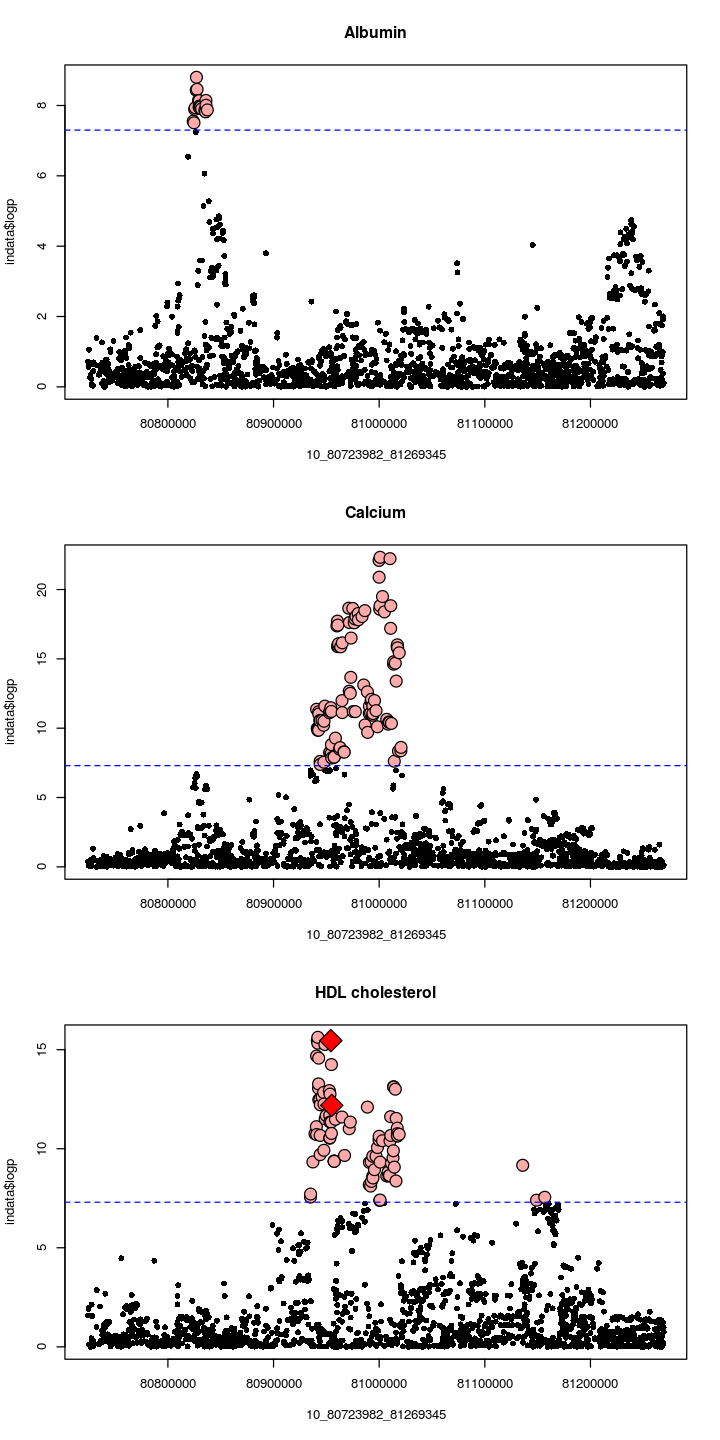

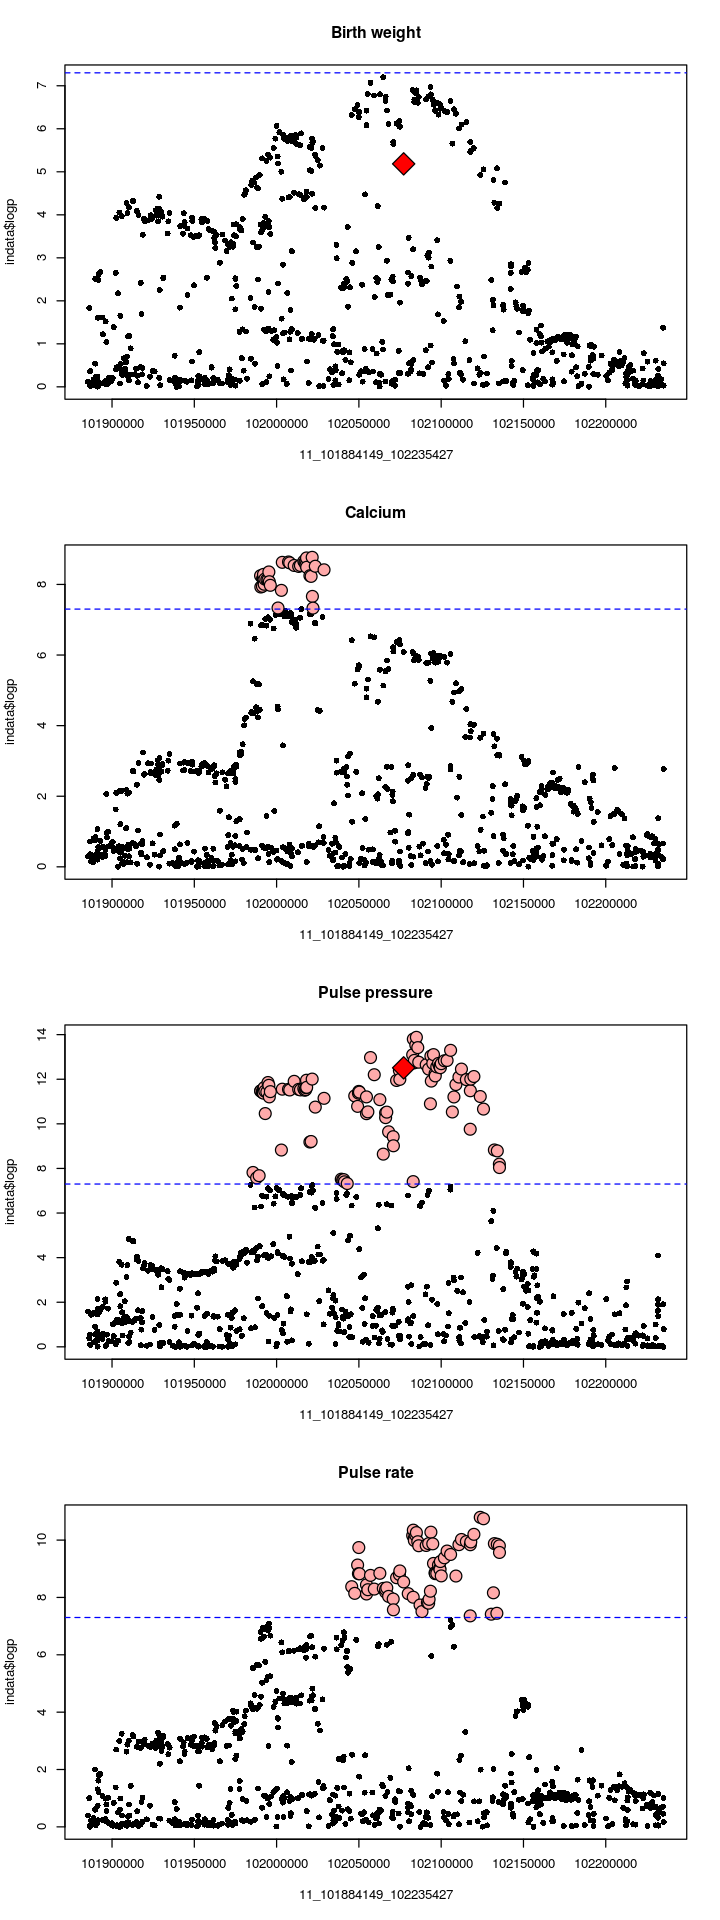

In [53]:
x = find_example("1_10970919_11460957")
x = find_example("1_204923764_205361963")
x = find_example("1_59478357_59987078")
x = find_example("10_80723982_81269345")
x = find_example("11_101884149_102235427")




In [54]:
head(locus2n[ locus2n$n == 2 & locus2n$same > 0 & locus2n$different > 0, "locus"], n = 20)
head(locus2n[ locus2n$n == 3 & locus2n$same > 0 & locus2n$different > 0, "locus"], n = 20)
head(locus2n[ locus2n$n == 4 & locus2n$same > 0 & locus2n$different > 0, "locus"], n = 20)


[1] "1_10970919_11460957"    "1_118039053_118280599"  "1_17201672_17495281"   
 [4] "1_19669930_20073920"    "1_202921665_203155101"  "1_204349952_204845842" 
 [7] "1_204923764_205361963"  "1_227117905_227676220"  "1_47377558_47807027"   
[10] "1_74877277_75126709"    "1_77474751_78961050"    "1_82256110_82678225"   
[13] "1_85600596_85987775"    "10_5080187_5458542"     "10_70215277_70504159"  
[16] "10_77111912_77523623"   "10_88404215_88652723"   "11_109837811_110143820"
[19] "11_11662321_11940925"   "11_130617153_130972351"

[1] "1_112110722_112558893"  "1_168611028_169868981"  "1_183299613_183862403" 
 [4] "1_205553056_205905745"  "1_212005326_212656744"  "1_218423650_218649354" 
 [7] "1_28509495_29109760"    "1_59478357_59987078"    "1_72412988_73058905"   
[10] "1_98133530_98662260"    "10_7985050_8220493"     "10_80723982_81269345"  
[13] "10_87239257_87755087"   "11_121822587_122121210" "11_75344605_75778647"  
[16] "12_25301876_25525461"   "12_67393940_67917499"   "12_7500835_7833225"    
[19] "12_94554057_95063611"   "13_25708286_26013798"

[1] "1_145280176_145827683"  "1_15816714_16270903"    "1_161310521_161994280" 
 [4] "1_181948703_182460632"  "1_196248779_197362184"  "1_198764027_199138043" 
 [7] "1_203385142_203809068"  "1_207199599_208260220"  "1_209859872_210726086" 
[10] "1_222581691_223252338"  "1_232423442_232864044"  "1_242965410_244116360" 
[13] "1_29133483_29700741"    "1_54604629_55174647"    "1_61570582_62009126"   
[16] "1_9235173_9556513"      "10_118287137_118996767" "10_61299418_61942645"  
[19] "10_89514816_89918786"   "11_101884149_102235427"

# Plot examples

7 225 301



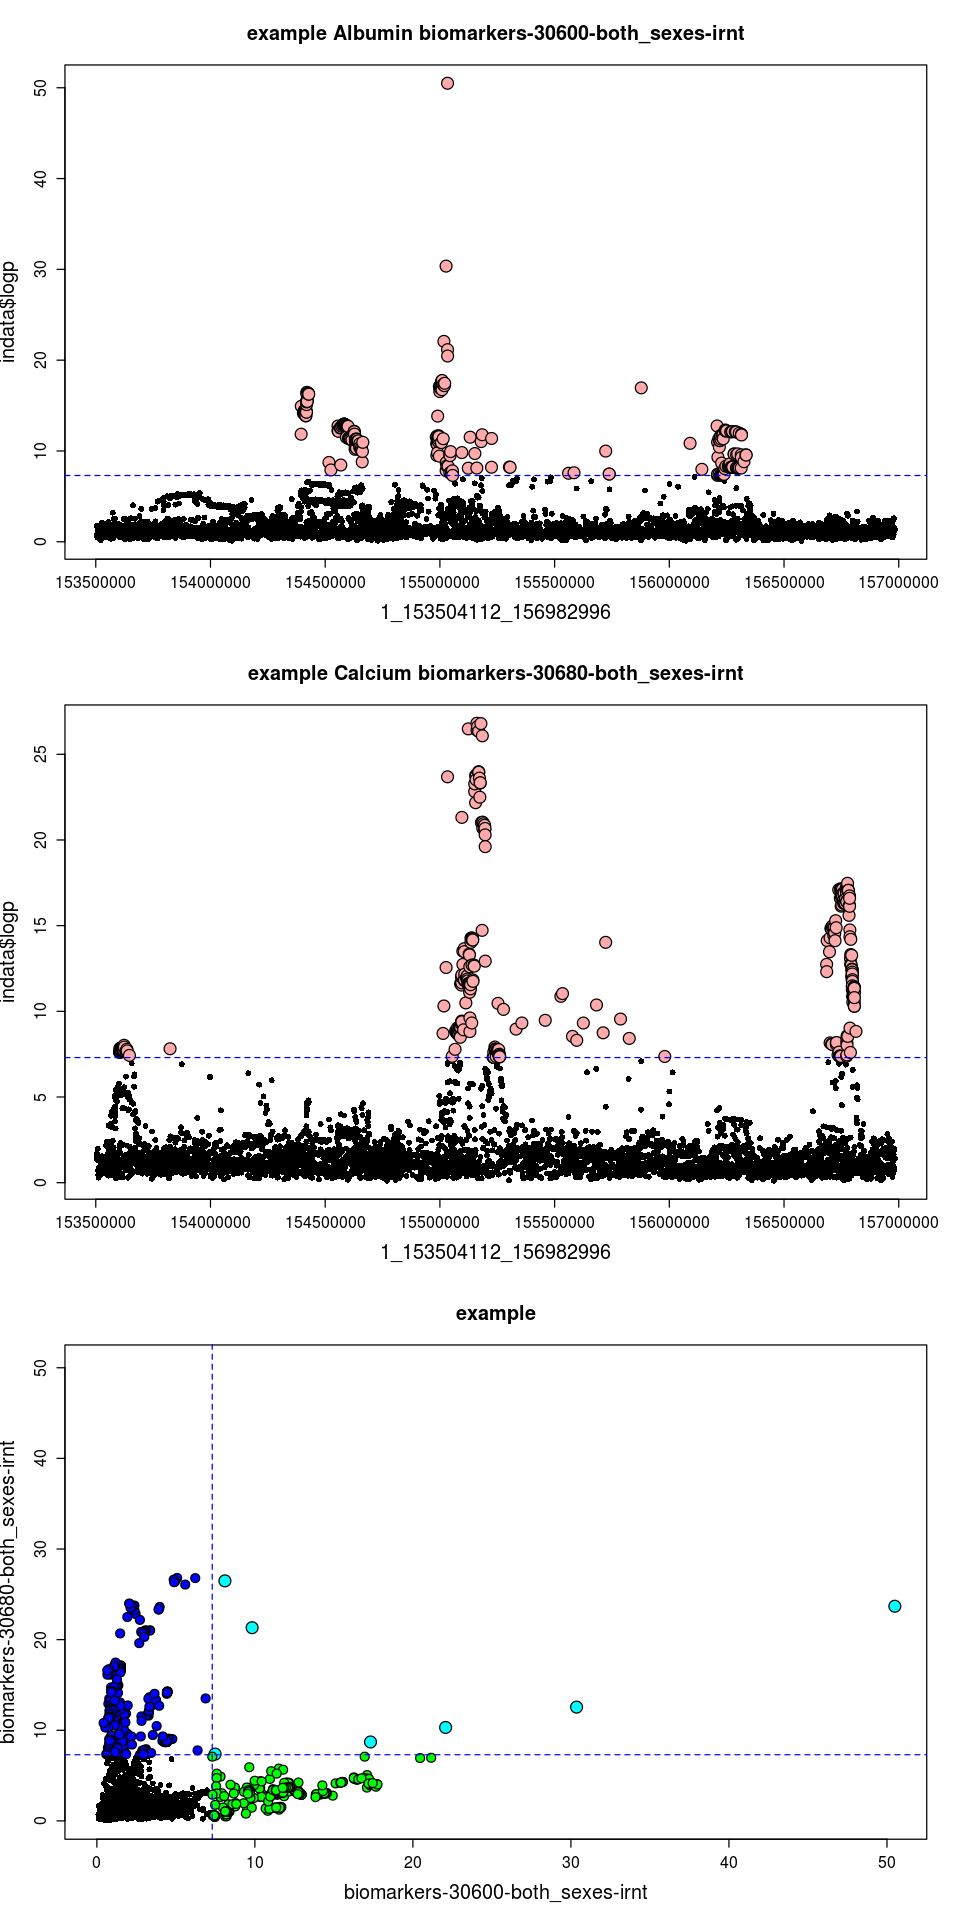

In [122]:
get_gwas_data = function(coord, gwas_file)
{
    my_head              = colnames(fread(cmd = paste("zcat", gwas_file, "|", "head -n 2"), sep = "\t", header = TRUE, data.table = FALSE))
    gwas_data            = suppressWarnings(tabix.read.table(gwas_file, coord, col.names = TRUE, stringsAsFactors = FALSE))
    colnames(gwas_data)  = my_head
    gwas_data$pval       = unlist(apply(gwas_data[, grepl("pval", colnames(gwas_data)) == TRUE & !colnames(gwas_data) %in% c("pval_heterogeneity")], 1, function(x){min(x, na.rm = TRUE)}))
    
    #return(gwas_data[ gwas_data$pval <= 5e-8, grepl("pval", colnames(gwas_data)) == TRUE | colnames(gwas_data) %in% c("pos")])
    return(gwas_data[,c("pos", "pval")])
}

plot_example = function(locus, my_title, traits)
{
    by_trait  = locus2match_by_trait[ locus2match_by_trait$locus ==   locus & locus2match_by_trait$id %in% traits,]
    coord     = sub("_", "-", sub("_", ":", locus))
    gwas_list = lapply(by_trait$id, function(trait)
    {
        indata      = get_gwas_data(coord, manifest[trait, "sumstat_file"])
        indata      = get_gwas_data(coord, manifest[trait, "sumstat_file"])[,c("pos", "pval")]
        #indata      = indata[is.na(indata$pval_meta) == FALSE, ]
        indata$logp = -log10(indata$pval)
        
        if(nrow(indata[indata$pval == 0, ]) > 0){indata[indata$pval == 0, "logp"] = -log10(min(indata[indata$pval > 0, "pval"]))}
        
        indata$cex =  1
        indata$pch = 16
        indata$bg  = "#ffffff"
        
        if(nrow(indata[ indata$pval <= 5e-8,]) > 0)
        {
            indata[ indata$pval <= 5e-8, "pch"] = 21
            indata[ indata$pval <= 5e-8, "cex"] =  2
            indata[ indata$pval <= 5e-8, "bg" ] = "#ffaaaa"
        }
        
        indata = indata[order(indata$cex),]
        
        plot(indata$pos, indata$logp, pch = indata$pch, cex = indata$cex, bg = indata$bg, main = paste(my_title, manifest[ trait, "name"], trait), xlab = locus, cex.main = 1.5, cex.axis = 1.2, cex.lab = 1.5)
        
        abline(h = -log10(5e-8), lty = "dashed", col = "#0000ff")
        return(indata)
    })
    names(gwas_list) = by_trait$id
    
    toplot = merge(gwas_list[[1]], gwas_list[[2]], by = "pos", suffixes = 1:2)
    
    mylims = max(c(toplot$logp1, toplot$logp2))
    
    plot(1,1, type = "n", xlim = c(0, mylims), ylim = c(0, mylims), xlab = by_trait$id[[1]], ylab = by_trait$id[[2]], main = my_title, cex.main = 1.5, cex.axis = 1.2, cex.lab = 1.5)
    
    toplot$bg  = "#ffffff"
    toplot$pch = 16
    
    toplot[ toplot$pval1 <= 5e-8 | toplot$pval2 <= 5e-8, "pch"] = 21
    toplot[ toplot$pval1 <= 5e-8 & toplot$pval2 <= 5e-8, "bg" ] = "#00ffff"
    toplot[ toplot$pval1 <= 5e-8 & toplot$pval2 >  5e-8, "bg" ] = "#00ff00"
    toplot[ toplot$pval1 >  5e-8 & toplot$pval2 <= 5e-8, "bg" ] = "#0000ff"
    
    toplot$cex = rowMeans(toplot[,c("cex1", "cex2")])
    
    points(toplot$logp1, toplot$logp2, pch = toplot$pch, cex = toplot$cex, bg = toplot$bg)
    abline(h = -log10(5e-8), lty = "dashed", col = "#0000ff")
    abline(v = -log10(5e-8), lty = "dashed", col = "#0000ff")
    
    message(paste(nrow(toplot[ toplot$pval1 <= 5e-8 & toplot$pval2 <= 5e-8, ]),
                  nrow(toplot[ toplot$pval1 <= 5e-8 & toplot$pval2 >  5e-8, ]),
                  nrow(toplot[ toplot$pval1 >  5e-8 & toplot$pval2 <= 5e-8, ])))
    
    return(list(gwas_list, toplot[ toplot$pval1 <= 5e-8 | toplot$pval2 <= 5e-8,]))
}

options(repr.plot.width = 8, repr.plot.height = 16)
layout(cbind(1:3))

#plot_example("1_108920060_110727340", "Same"        , c("biomarkers-30600-both_sexes-irnt", "biomarkers-30680-both_sexes-irnt"))
#plot_example("1_108920060_110727340", "Only score"  , c("biomarkers-30600-both_sexes-irnt", "continuous-LDLC-both_sexes-medadj_irnt"))
#plot_example("1_108920060_110727340", "Only Jaccard", c("biomarkers-30600-both_sexes-irnt", "phecode-411.2-both_sexes"))
x = plot_example("1_153504112_156982996", "example", c("biomarkers-30600-both_sexes-irnt", "biomarkers-30680-both_sexes-irnt"))



In [111]:
locus2match_by_trait[ locus2match_by_trait$locus == "22_49958346_50448970", ]

locus id name same

In [115]:
locus2match_by_trait[ grepl("^22_", locus2match_by_trait$locus) == TRUE,]

locus                id                                            
198  22_18023678_18591589 biomarkers-30600-both_sexes-irnt              
199  22_21810280_22434962 biomarkers-30600-both_sexes-irnt              
200  22_29783892_31052941 biomarkers-30600-both_sexes-irnt              
201  22_37877713_39857656 biomarkers-30600-both_sexes-irnt              
202  22_40369249_42896091 biomarkers-30600-both_sexes-irnt              
484  22_28329977_29613326 continuous-20022-both_sexes-irnt              
485  22_40369249_42896091 continuous-20022-both_sexes-irnt              
486  22_46338611_46909802 continuous-20022-both_sexes-irnt              
1028 22_18023678_18591589 continuous-21001-both_sexes-irnt              
1029 22_19848337_20288590 continuous-21001-both_sexes-irnt              
1030 22_21810280_22434962 continuous-21001-both_sexes-irnt              
1031 22_27518267_27718267 continuous-21001-both_sexes-irnt              
1032 22_34162955_34362955 continuous-21001-both_sexes-irnt              
1033 22_35824713_36142986 continuous-21001-both_sexes-irnt              
1034 22_37877713_39857656 continuous-21001-both_sexes-irnt              
1035 22_40369249_42896091 continuous-21001-both_sexes-irnt              
1036 22_48286670_48486670 continuous-21001-both_sexes-irnt              
1037 22_48770888_48974310 continuous-21001-both_sexes-irnt              
1038 22_49321591_49572463 continuous-21001-both_sexes-irnt              
1039 22_50599404_51015285 continuous-21001-both_sexes-irnt              
1556 22_21810280_22434962 biomarkers-30680-both_sexes-irnt              
1557 22_23305957_23512058 biomarkers-30680-both_sexes-irnt              
1558 22_24888920_25113346 biomarkers-30680-both_sexes-irnt              
1559 22_29783892_31052941 biomarkers-30680-both_sexes-irnt              
1560 22_37877713_39857656 biomarkers-30680-both_sexes-irnt              
1561 22_40369249_42896091 biomarkers-30680-both_sexes-irnt              
1562 22_43000944_43219434 biomarkers-30680-both_sexes-irnt              
1786 22_21810280_22434962 biomarkers-30690-both_sexes-irnt              
1787 22_29783892_31052941 biomarkers-30690-both_sexes-irnt              
1788 22_40369249_42896091 biomarkers-30690-both_sexes-irnt              
⋮    ⋮                    ⋮                                             
4169 22_33170222_33441848 continuous-MAP-both_sexes-combined_medadj_irnt
4170 22_37877713_39857656 continuous-MAP-both_sexes-combined_medadj_irnt
4171 22_40369249_42896091 continuous-MAP-both_sexes-combined_medadj_irnt
4172 22_45238865_45438865 continuous-MAP-both_sexes-combined_medadj_irnt
4745 22_19848337_20288590 continuous-PP-both_sexes-combined_medadj_irnt 
4746 22_21810280_22434962 continuous-PP-both_sexes-combined_medadj_irnt 
4747 22_28329977_29613326 continuous-PP-both_sexes-combined_medadj_irnt 
4748 22_29783892_31052941 continuous-PP-both_sexes-combined_medadj_irnt 
4749 22_32163595_32422536 continuous-PP-both_sexes-combined_medadj_irnt 
4750 22_37877713_39857656 continuous-PP-both_sexes-combined_medadj_irnt 
4751 22_40369249_42896091 continuous-PP-both_sexes-combined_medadj_irnt 
4752 22_45596695_45926033 continuous-PP-both_sexes-combined_medadj_irnt 
5173 22_27930915_28313866 continuous-102-both_sexes-irnt                
5174 22_37877713_39857656 continuous-102-both_sexes-irnt                
5761 22_19848337_20288590 continuous-SBP-both_sexes-combined_medadj_irnt
5762 22_26536076_26736076 continuous-SBP-both_sexes-combined_medadj_irnt
5763 22_28329977_29613326 continuous-SBP-both_sexes-combined_medadj_irnt
5764 22_29783892_31052941 continuous-SBP-both_sexes-combined_medadj_irnt
5765 22_31843845_32054891 continuous-SBP-both_sexes-combined_medadj_irnt
5766 22_33170222_33441848 continuous-SBP-both_sexes-combined_medadj_irnt
5767 22_37877713_39857656 continuous-SBP-both_sexes-combined_medadj_irnt
5768 22_40369249_42896091 continuous-SBP-both_sexes-combined_medadj_irnt
5769 22_45238865_45438865 continuous-SBP-both_sexes-combined_me

In [113]:
locus2match_by_trait

locus                 id                               name            
1    1_108920060_110727340 biomarkers-30600-both_sexes-irnt Albumin         
2    1_10970919_11460957   biomarkers-30600-both_sexes-irnt Albumin         
3    1_145280176_145827683 biomarkers-30600-both_sexes-irnt Albumin         
4    1_149638019_151602427 biomarkers-30600-both_sexes-irnt Albumin         
5    1_151689611_151908864 biomarkers-30600-both_sexes-irnt Albumin         
6    1_153504112_156982996 biomarkers-30600-both_sexes-irnt Albumin         
7    1_161310521_161994280 biomarkers-30600-both_sexes-irnt Albumin         
8    1_16287629_16972520   biomarkers-30600-both_sexes-irnt Albumin         
9    1_17201672_17495281   biomarkers-30600-both_sexes-irnt Albumin         
10   1_177653473_179010830 biomarkers-30600-both_sexes-irnt Albumin         
11   1_181948703_182460632 biomarkers-30600-both_sexes-irnt Albumin         
12   1_196248779_197362184 biomarkers-30600-both_sexes-irnt Albumin         
13   1_200089305_200564803 biomarkers-30600-both_sexes-irnt Albumin         
14   1_201540821_202678608 biomarkers-30600-both_sexes-irnt Albumin         
15   1_205553056_205905745 biomarkers-30600-both_sexes-irnt Albumin         
16   1_207199599_208260220 biomarkers-30600-both_sexes-irnt Albumin         
17   1_213973019_214340931 biomarkers-30600-both_sexes-irnt Albumin         
18   1_219157488_219898632 biomarkers-30600-both_sexes-irnt Albumin         
19   1_220671657_221470368 biomarkers-30600-both_sexes-irnt Albumin         
20   1_23193972_24066837   biomarkers-30600-both_sexes-irnt Albumin         
21   1_247501595_247706276 biomarkers-30600-both_sexes-irnt Albumin         
22   1_24782805_26125810   biomarkers-30600-both_sexes-irnt Albumin         
23   1_33341358_33541358   biomarkers-30600-both_sexes-irnt Albumin         
24   1_39210639_40541727   biomarkers-30600-both_sexes-irnt Albumin         
25   1_59478357_59987078   biomarkers-30600-both_sexes-irnt Albumin         
26   1_65110790_65506256   biomarkers-30600-both_sexes-irnt Albumin         
27   1_65792314_66684457   biomarkers-30600-both_sexes-irnt Albumin         
28   1_9235173_9556513     biomarkers-30600-both_sexes-irnt Albumin         
29   1_92561882_94264499   biomarkers-30600-both_sexes-irnt Albumin         
30   1_965800_2544414      biomarkers-30600-both_sexes-irnt Albumin         
⋮    ⋮                     ⋮                                ⋮               
6385 8_72252858_72631550   biomarkers-30870-both_sexes-irnt Triglycerides   
6386 8_7988230_11998965    biomarkers-30870-both_sexes-irnt Triglycerides   
6387 8_82425006_82958780   biomarkers-30870-both_sexes-irnt Triglycerides   
6388 9_102004426_102365422 biomarkers-30870-both_sexes-irnt Triglycerides   
6389 9_106637655_108045263 biomarkers-30870-both_sexes-irnt Triglycerides   
6390 9_111832342_112868198 biomarkers-30870-both_sexes-irnt Triglycerides   
6391 9_115876861_116823970 biomarkers-30870-both_sexes-irnt Triglycerides   
6392 9_123249511_124070916 biomarkers-30870-both_sexes-irnt Triglycerides   
6393 9_13434460_14051619   biomarkers-30870-both_sexes-irnt Triglycerides   
6394 9_134691675_135047122 biomarkers-30870-both_sexes-irnt Triglycerides   
6395 9_135901033_136635677 biomarkers-30870-both_sexes-irnt Triglycerides   
6396 9_14192104_14931324   biomarkers-30870-both_sexes-irnt Triglycerides   
6397 9_15034080_16153793   biomarkers-30870-both_sexes-irnt Triglycerides   
6398 9_1533915_1743007     biomarkers-30870-both_sexes-irnt Triglycerides   
6399 9_16332118_17016693   biomarkers-30870-both_sexes-irnt Triglycerides   
6400 9_36865652_37651525   biomarkers-30870-both_sexes-irnt Triglycerides   
6401 9_800140_1156728      biomarkers-30870-both_sexes-irnt Triglycerides   
6402 9_86236239_86794759   biomarkers-30870-both_sexes-irnt Triglycerides   
6403 9_95183887_95676781   biomarkers-30870-both_sexes-irnt Triglycerides   
6404 1_207199599_208260220 continuous-12336-both_sexes-irnt Ventricular rate
6